In [88]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec
import keras

In [64]:
# dataset_path = "data/training/"

In [65]:
# header = 'filename'
# for i in range(1, 41):
#   header += f' mfcc{i}'
# header += ' label'
# header = header.split()

In [66]:
# file = open('data_1.csv', 'w', newline='')
# with file:
#   writer = csv.writer(file)
#   writer.writerow(header)

# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#           semantic_label = dirpath.split("/")[-1]
#           print("\nProcessing: {}".format(semantic_label))
#           for f in filenames:
#               file_path = os.path.join(dirpath, f)
#               to_append = f'{file_path}'
#               # print(file_path)
#               y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#               mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#               for e in mfcc:
#                   to_append += f' {np.mean(e.T, axis=0)}'
#               to_append += f' {semantic_label}'
#               file = open('data_1.csv', 'a', newline='')
#               with file:
#                   writer = csv.writer(file)
#                   writer.writerow(to_append.split())

In [67]:
# data = pd.read_csv('../data_mfccRMScqt.csv')
data = pd.read_csv('../Preprocessing/db5/data_mfccDWTcqtdb5L1.csv')
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT/MR/New_MR_013.wav,-495.158142,-17.699718,1.995417,-6.560966,-0.151382,4.404518,-3.197990,1.378374,-0.059363,...,0.000343,0.000522,0.000572,0.000530,0.000578,0.000603,0.000621,0.000530,0.000486,MR
1,../data/DWT/MR/New_MR_174.wav,-548.711731,-35.574787,12.506323,-3.259351,1.374236,1.946338,-2.657305,1.942204,-0.956127,...,0.000278,0.000360,0.000325,0.000276,0.000352,0.000282,0.000268,0.000338,0.000349,MR
2,../data/DWT/MR/New_MR_182.wav,-551.774353,-34.949604,14.678288,-2.625841,-3.152858,-3.667840,1.138761,1.216005,-2.939780,...,0.000313,0.000400,0.000332,0.000252,0.000278,0.000266,0.000260,0.000282,0.000211,MR
3,../data/DWT/MR/New_MR_005.wav,-484.838928,-17.331890,0.794573,-6.355471,0.096363,5.741897,1.160718,2.086056,0.705592,...,0.000467,0.000522,0.000531,0.000648,0.000765,0.000556,0.000651,0.000867,0.000646,MR
4,../data/DWT/MR/New_MR_067.wav,-543.766052,-36.516781,12.567668,-2.045451,2.803391,3.578267,-2.691306,2.837240,1.323356,...,0.000254,0.000236,0.000313,0.000332,0.000355,0.000361,0.000309,0.000317,0.000343,MR


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 103 entries, filename to label
dtypes: float64(101), object(2)
memory usage: 804.8+ KB


In [69]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [70]:
X.shape

(1000, 101)

In [71]:
y.head()

0    MR
1    MR
2    MR
3    MR
4    MR
Name: label, dtype: object

In [72]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-495.158142,-17.699718,1.995417,-6.560966,-0.151382,4.404518,-3.197990,1.378374,-0.059363,-1.130225,...,0.000473,0.000343,0.000522,0.000572,0.000530,0.000578,0.000603,0.000621,0.000530,0.000486
1,-548.711731,-35.574787,12.506323,-3.259351,1.374236,1.946338,-2.657305,1.942204,-0.956127,-2.049379,...,0.000290,0.000278,0.000360,0.000325,0.000276,0.000352,0.000282,0.000268,0.000338,0.000349
2,-551.774353,-34.949604,14.678288,-2.625841,-3.152858,-3.667840,1.138761,1.216005,-2.939780,0.393365,...,0.000180,0.000313,0.000400,0.000332,0.000252,0.000278,0.000266,0.000260,0.000282,0.000211
3,-484.838928,-17.331890,0.794573,-6.355471,0.096363,5.741897,1.160718,2.086056,0.705592,-0.802245,...,0.000580,0.000467,0.000522,0.000531,0.000648,0.000765,0.000556,0.000651,0.000867,0.000646
4,-543.766052,-36.516781,12.567668,-2.045451,2.803391,3.578267,-2.691306,2.837240,1.323356,1.769056,...,0.000237,0.000254,0.000236,0.000313,0.000332,0.000355,0.000361,0.000309,0.000317,0.000343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-405.726990,-77.300079,13.942502,4.767124,-1.656976,-2.802324,0.184631,2.351334,-2.018372,4.045334,...,0.000747,0.000729,0.000598,0.000523,0.000645,0.000703,0.000661,0.000784,0.000714,0.000734
996,-388.875153,-78.687134,14.147832,3.051652,-1.846769,-0.447980,2.758378,-0.398919,-3.622700,1.690781,...,0.000820,0.000976,0.001012,0.001132,0.001267,0.001487,0.001432,0.001562,0.001584,0.001305
997,-535.572510,-37.654732,11.200865,-0.888963,-0.640530,2.987886,0.732820,2.676649,-2.635229,-1.924914,...,0.000215,0.000201,0.000223,0.000249,0.000249,0.000231,0.000196,0.000271,0.000256,0.000222
998,-507.304382,-28.481316,10.688545,0.405298,-1.481764,5.094982,0.307274,0.223016,-0.549139,-2.330604,...,0.000251,0.000317,0.000314,0.000221,0.000288,0.000378,0.000398,0.000361,0.000272,0.000316


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
y_test.shape

(200,)

In [75]:
X_train.shape

(800, 101)

In [76]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
29,-571.000305,-44.529331,8.557463,-5.354973,-0.444946,0.775353,-3.911644,-0.161377,-0.040204,-0.763672,...,0.000156,0.000183,0.000165,0.000170,0.000233,0.000188,0.000118,0.000173,0.000226,0.000225
535,-546.471436,-21.875593,7.981214,-1.554237,-2.442505,-0.280991,3.010110,-1.707507,-0.782117,-4.404325,...,0.000182,0.000162,0.000160,0.000179,0.000178,0.000173,0.000203,0.000208,0.000116,0.000134
695,-483.048645,-35.087589,3.334061,0.057829,-2.300550,-0.083517,-2.038794,2.419527,-1.354680,-1.581535,...,0.000549,0.000583,0.000651,0.000712,0.000808,0.000555,0.000406,0.000411,0.000455,0.000639
557,-612.470886,-26.888533,13.136589,-3.096690,-0.632893,-0.204262,1.073217,0.608695,2.258817,0.773053,...,0.000137,0.000124,0.000122,0.000114,0.000074,0.000058,0.000074,0.000087,0.000041,0.000102
836,-488.692200,-40.434914,18.709089,-5.685947,-0.671774,-0.475641,-1.842119,1.419811,-0.200171,-0.360520,...,0.000283,0.000252,0.000250,0.000239,0.000267,0.000296,0.000285,0.000274,0.000279,0.000314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-555.877991,-42.176857,14.207497,-4.525305,0.835319,0.281500,-3.061442,-0.741886,-1.151715,-0.392564,...,0.000222,0.000188,0.000213,0.000206,0.000192,0.000231,0.000227,0.000215,0.000203,0.000256
270,-609.207642,-11.152511,1.870600,-3.416370,1.308998,3.316016,-1.200858,1.639898,-0.514021,-0.540516,...,0.000178,0.000236,0.000217,0.000155,0.000210,0.000136,0.000154,0.000218,0.000222,0.000213
860,-606.614502,-17.670940,8.634387,-5.587108,-0.084813,1.902464,1.920007,5.127586,-2.719897,0.581622,...,0.000146,0.000114,0.000184,0.000157,0.000191,0.000217,0.000161,0.000141,0.000162,0.000155
435,-533.061646,-29.820217,4.227546,1.623833,-1.713859,-4.619459,3.864091,-0.920375,1.959889,-1.475473,...,0.000248,0.000259,0.000216,0.000263,0.000339,0.000338,0.000261,0.000196,0.000220,0.000175


In [97]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(200, 5)


ValueError: y should be a 1d array, got an array of shape (200, 5) instead.

In [78]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [79]:
X_train.shape[1], X_train.shape[2]

(101, 1)

In [90]:
def build_model(dropout_rate=0):
    model = models.Sequential(
        [
           layers.SimpleRNN(64,activation='tanh',input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
           layers.Dense(32, activation="relu", activity_regularizer=tf.keras.regularizers.l2(1e-4)),

           layers.Flatten(),
           layers.Dense(64, activation="relu", activity_regularizer=tf.keras.regularizers.l2(1e-4)),
           layers.Dense(32, activation="relu", activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            # tf.keras.layers.BatchNormalization(),

            layers.Dense(5, activation='softmax')
        ]
    )
    # optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [81]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 101, 64)           4224      
                                                                 
 dense_12 (Dense)            (None, 101, 32)           2080      
                                                                 
 flatten_3 (Flatten)         (None, 3232)              0         
                                                                 
 dense_13 (Dense)            (None, 64)                206912    
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 5)                 165       
                                                                 
Total params: 215461 (841.64 KB)
Trainable params: 215

In [96]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

modeltuning=KerasClassifier(model=build_model,optimizer="adam",
                                      loss=keras.losses.categorical_crossentropy,
                                      batch_size=8,
                                      epochs=100,
                                      verbose=1,
                                      metrics=['accuracy'],
                                      validation_split=0.1)

params={
        'batch_size': [16, 32, 64],
        'epochs':[10, 20, 30, 40, 50, 60, 70],
        }
gs=GridSearchCV(estimator=modeltuning, param_grid=params, cv=10, verbose=1, scoring='balanced_accuracy')
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X, y, validation_data=(X_test, y_test))

Fitting 10 folds for each of 21 candidates, totalling 210 fits
Epoch 1/10


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 20ms/step - loss: 1.5429 - accuracy: 0.3144 - val_loss: 1.3337 - val_accuracy: 0.4700
Epoch 2/10
57/57 [==============================] - 1s 16ms/step - loss: 1.2219 - accuracy: 0.5422 - val_loss: 1.1042 - val_accuracy: 0.6200
Epoch 3/10
57/57 [==============================] - 1s 14ms/step - loss: 1.0532 - accuracy: 0.5867 - val_loss: 0.8863 - val_accuracy: 0.7000
Epoch 4/10
57/57 [==============================] - 1s 13ms/step - loss: 0.8887 - accuracy: 0.6711 - val_loss: 0.8738 - val_accuracy: 0.6950
Epoch 5/10
57/57 [==============================] - 1s 13ms/step - loss: 0.7790 - accuracy: 0.7200 - val_loss: 0.7189 - val_accuracy: 0.7700
Epoch 6/10
57/57 [==============================] - 1s 14ms/step - loss: 0.7070 - accuracy: 0.7622 - val_loss: 0.5927 - val_accuracy: 0.8150
Epoch 7/10
57/57 [==============================] - 1s 14ms/step - loss: 0.6115 - accuracy: 0.7989 - val_loss: 0.5575 - val_accuracy: 0.8200
Epoch 8/10
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5411 - accuracy: 0.3389 - val_loss: 1.3800 - val_accuracy: 0.4700
Epoch 2/10
57/57 [==============================] - 1s 14ms/step - loss: 1.2360 - accuracy: 0.5356 - val_loss: 1.1173 - val_accuracy: 0.6050
Epoch 3/10
57/57 [==============================] - 1s 14ms/step - loss: 1.0220 - accuracy: 0.6256 - val_loss: 0.9286 - val_accuracy: 0.6850
Epoch 4/10
57/57 [==============================] - 1s 14ms/step - loss: 0.8524 - accuracy: 0.6900 - val_loss: 0.8318 - val_accuracy: 0.7350
Epoch 5/10
57/57 [==============================] - 1s 14ms/step - loss: 0.7549 - accuracy: 0.7400 - val_loss: 0.7408 - val_accuracy: 0.7400
Epoch 6/10
57/57 [==============================] - 1s 14ms/step - loss: 0.6310 - accuracy: 0.7889 - val_loss: 0.6203 - val_accuracy: 0.8200
Epoch 7/10
57/57 [==============================] - 1s 15ms/step - loss: 0.5145 - accuracy: 0.8489 - val_loss: 0.4940 - val_accuracy: 0.8900
Epoch 8/10
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 21ms/step - loss: 1.5305 - accuracy: 0.3156 - val_loss: 1.3663 - val_accuracy: 0.4550
Epoch 2/10
57/57 [==============================] - 1s 14ms/step - loss: 1.2199 - accuracy: 0.5344 - val_loss: 1.1177 - val_accuracy: 0.5700
Epoch 3/10
57/57 [==============================] - 1s 13ms/step - loss: 1.0208 - accuracy: 0.6189 - val_loss: 1.0074 - val_accuracy: 0.5900
Epoch 4/10
57/57 [==============================] - 1s 14ms/step - loss: 0.9033 - accuracy: 0.6678 - val_loss: 0.8744 - val_accuracy: 0.6850
Epoch 5/10
57/57 [==============================] - 1s 15ms/step - loss: 0.8235 - accuracy: 0.7000 - val_loss: 0.7823 - val_accuracy: 0.7450
Epoch 6/10
57/57 [==============================] - 1s 14ms/step - loss: 0.7059 - accuracy: 0.7611 - val_loss: 0.6479 - val_accuracy: 0.8100
Epoch 7/10
57/57 [==============================] - 1s 13ms/step - loss: 0.6138 - accuracy: 0.8000 - val_loss: 0.5428 - val_accuracy: 0.8450
Epoch 8/10
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5549 - accuracy: 0.3344 - val_loss: 1.3966 - val_accuracy: 0.4050
Epoch 2/10
57/57 [==============================] - 1s 13ms/step - loss: 1.2984 - accuracy: 0.4778 - val_loss: 1.2341 - val_accuracy: 0.5150
Epoch 3/10
57/57 [==============================] - 1s 14ms/step - loss: 1.1227 - accuracy: 0.5889 - val_loss: 1.0159 - val_accuracy: 0.6850
Epoch 4/10
57/57 [==============================] - 1s 13ms/step - loss: 0.9414 - accuracy: 0.6722 - val_loss: 0.9071 - val_accuracy: 0.6750
Epoch 5/10
57/57 [==============================] - 1s 13ms/step - loss: 0.8143 - accuracy: 0.7167 - val_loss: 0.7199 - val_accuracy: 0.7850
Epoch 6/10
57/57 [==============================] - 1s 13ms/step - loss: 0.6957 - accuracy: 0.7600 - val_loss: 0.6800 - val_accuracy: 0.7750
Epoch 7/10
57/57 [==============================] - 1s 13ms/step - loss: 0.6049 - accuracy: 0.8022 - val_loss: 0.5726 - val_accuracy: 0.8500
Epoch 8/10
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 19ms/step - loss: 1.5308 - accuracy: 0.3522 - val_loss: 1.3839 - val_accuracy: 0.4050
Epoch 2/10
57/57 [==============================] - 1s 15ms/step - loss: 1.2633 - accuracy: 0.5189 - val_loss: 1.1679 - val_accuracy: 0.5650
Epoch 3/10
57/57 [==============================] - 1s 26ms/step - loss: 1.0768 - accuracy: 0.6089 - val_loss: 0.9887 - val_accuracy: 0.6700
Epoch 4/10
57/57 [==============================] - 1s 24ms/step - loss: 0.9353 - accuracy: 0.6756 - val_loss: 0.7904 - val_accuracy: 0.7350
Epoch 5/10
57/57 [==============================] - 1s 18ms/step - loss: 0.7960 - accuracy: 0.7222 - val_loss: 0.7112 - val_accuracy: 0.7500
Epoch 6/10
57/57 [==============================] - 1s 15ms/step - loss: 0.6663 - accuracy: 0.7711 - val_loss: 0.6031 - val_accuracy: 0.7850
Epoch 7/10
57/57 [==============================] - 1s 14ms/step - loss: 0.5921 - accuracy: 0.7978 - val_loss: 0.5688 - val_accuracy: 0.8350
Epoch 8/10
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5338 - accuracy: 0.3333 - val_loss: 1.4038 - val_accuracy: 0.4400
Epoch 2/10
57/57 [==============================] - 1s 14ms/step - loss: 1.2248 - accuracy: 0.5456 - val_loss: 1.0493 - val_accuracy: 0.6450
Epoch 3/10
57/57 [==============================] - 1s 14ms/step - loss: 1.0294 - accuracy: 0.6222 - val_loss: 0.9173 - val_accuracy: 0.7100
Epoch 4/10
57/57 [==============================] - 1s 13ms/step - loss: 0.8805 - accuracy: 0.6878 - val_loss: 0.7746 - val_accuracy: 0.7400
Epoch 5/10
57/57 [==============================] - 1s 13ms/step - loss: 0.7468 - accuracy: 0.7500 - val_loss: 0.6466 - val_accuracy: 0.8000
Epoch 6/10
57/57 [==============================] - 1s 13ms/step - loss: 0.6344 - accuracy: 0.7800 - val_loss: 0.5444 - val_accuracy: 0.8600
Epoch 7/10
57/57 [==============================] - 1s 13ms/step - loss: 0.5443 - accuracy: 0.8256 - val_loss: 0.4769 - val_accuracy: 0.8550
Epoch 8/10
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 21ms/step - loss: 1.6006 - accuracy: 0.2722 - val_loss: 1.5086 - val_accuracy: 0.3450
Epoch 2/10
57/57 [==============================] - 1s 16ms/step - loss: 1.3582 - accuracy: 0.4511 - val_loss: 1.2806 - val_accuracy: 0.5300
Epoch 3/10
57/57 [==============================] - 1s 14ms/step - loss: 1.1435 - accuracy: 0.5622 - val_loss: 1.0818 - val_accuracy: 0.5800
Epoch 4/10
57/57 [==============================] - 1s 14ms/step - loss: 0.9530 - accuracy: 0.6644 - val_loss: 0.8572 - val_accuracy: 0.6850
Epoch 5/10
57/57 [==============================] - 1s 15ms/step - loss: 0.8246 - accuracy: 0.7144 - val_loss: 0.7669 - val_accuracy: 0.7350
Epoch 6/10
57/57 [==============================] - 1s 14ms/step - loss: 0.7201 - accuracy: 0.7533 - val_loss: 0.6572 - val_accuracy: 0.7800
Epoch 7/10
57/57 [==============================] - 1s 14ms/step - loss: 0.6124 - accuracy: 0.8033 - val_loss: 0.5090 - val_accuracy: 0.9000
Epoch 8/10
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5647 - accuracy: 0.3167 - val_loss: 1.3719 - val_accuracy: 0.4850
Epoch 2/10
57/57 [==============================] - 1s 14ms/step - loss: 1.2825 - accuracy: 0.5400 - val_loss: 1.1498 - val_accuracy: 0.6150
Epoch 3/10
57/57 [==============================] - 1s 14ms/step - loss: 1.0895 - accuracy: 0.6144 - val_loss: 0.9614 - val_accuracy: 0.6700
Epoch 4/10
57/57 [==============================] - 1s 14ms/step - loss: 0.9214 - accuracy: 0.6722 - val_loss: 0.8234 - val_accuracy: 0.7050
Epoch 5/10
57/57 [==============================] - 1s 13ms/step - loss: 0.7777 - accuracy: 0.7322 - val_loss: 0.7163 - val_accuracy: 0.7500
Epoch 6/10
57/57 [==============================] - 1s 14ms/step - loss: 0.6941 - accuracy: 0.7533 - val_loss: 0.6147 - val_accuracy: 0.7650
Epoch 7/10
57/57 [==============================] - 1s 15ms/step - loss: 0.5781 - accuracy: 0.8111 - val_loss: 0.5507 - val_accuracy: 0.8450
Epoch 8/10
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 22ms/step - loss: 1.5065 - accuracy: 0.3633 - val_loss: 1.3185 - val_accuracy: 0.5050
Epoch 2/10
57/57 [==============================] - 1s 14ms/step - loss: 1.2615 - accuracy: 0.5189 - val_loss: 1.1116 - val_accuracy: 0.6250
Epoch 3/10
57/57 [==============================] - 1s 15ms/step - loss: 1.0318 - accuracy: 0.6222 - val_loss: 0.9727 - val_accuracy: 0.6350
Epoch 4/10
57/57 [==============================] - 1s 15ms/step - loss: 0.8809 - accuracy: 0.6867 - val_loss: 0.8215 - val_accuracy: 0.7250
Epoch 5/10
57/57 [==============================] - 1s 15ms/step - loss: 0.7825 - accuracy: 0.7356 - val_loss: 0.7854 - val_accuracy: 0.7250
Epoch 6/10
57/57 [==============================] - 1s 15ms/step - loss: 0.7134 - accuracy: 0.7667 - val_loss: 0.6320 - val_accuracy: 0.7950
Epoch 7/10
57/57 [==============================] - 1s 14ms/step - loss: 0.6072 - accuracy: 0.7978 - val_loss: 0.5727 - val_accuracy: 0.8300
Epoch 8/10
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5483 - accuracy: 0.3456 - val_loss: 1.4271 - val_accuracy: 0.3950
Epoch 2/10
57/57 [==============================] - 1s 14ms/step - loss: 1.2824 - accuracy: 0.4989 - val_loss: 1.1491 - val_accuracy: 0.5800
Epoch 3/10
57/57 [==============================] - 1s 14ms/step - loss: 1.0820 - accuracy: 0.6144 - val_loss: 1.0190 - val_accuracy: 0.6350
Epoch 4/10
57/57 [==============================] - 1s 14ms/step - loss: 0.9189 - accuracy: 0.6844 - val_loss: 0.7960 - val_accuracy: 0.7800
Epoch 5/10
57/57 [==============================] - 1s 20ms/step - loss: 0.7991 - accuracy: 0.7300 - val_loss: 0.7758 - val_accuracy: 0.7200
Epoch 6/10
57/57 [==============================] - 1s 15ms/step - loss: 0.7348 - accuracy: 0.7444 - val_loss: 0.6217 - val_accuracy: 0.8050
Epoch 7/10
57/57 [==============================] - 1s 15ms/step - loss: 0.5978 - accuracy: 0.8078 - val_loss: 0.5453 - val_accuracy: 0.8350
Epoch 8/10
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 19ms/step - loss: 1.5571 - accuracy: 0.3044 - val_loss: 1.4167 - val_accuracy: 0.3900
Epoch 2/20
57/57 [==============================] - 1s 15ms/step - loss: 1.2617 - accuracy: 0.5022 - val_loss: 1.0761 - val_accuracy: 0.6000
Epoch 3/20
57/57 [==============================] - 1s 14ms/step - loss: 1.0463 - accuracy: 0.6011 - val_loss: 0.8937 - val_accuracy: 0.6550
Epoch 4/20
57/57 [==============================] - 1s 14ms/step - loss: 0.9426 - accuracy: 0.6489 - val_loss: 0.7972 - val_accuracy: 0.7550
Epoch 5/20
57/57 [==============================] - 1s 14ms/step - loss: 0.8199 - accuracy: 0.7233 - val_loss: 0.7126 - val_accuracy: 0.7700
Epoch 6/20
57/57 [==============================] - 1s 15ms/step - loss: 0.7048 - accuracy: 0.7578 - val_loss: 0.7086 - val_accuracy: 0.7300
Epoch 7/20
57/57 [==============================] - 1s 14ms/step - loss: 0.6268 - accuracy: 0.7800 - val_loss: 0.4855 - val_accuracy: 0.8400
Epoch 8/20
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 18ms/step - loss: 1.5324 - accuracy: 0.3533 - val_loss: 1.3737 - val_accuracy: 0.4500
Epoch 2/20
57/57 [==============================] - 1s 15ms/step - loss: 1.2195 - accuracy: 0.5322 - val_loss: 1.1523 - val_accuracy: 0.5900
Epoch 3/20
57/57 [==============================] - 1s 15ms/step - loss: 1.0556 - accuracy: 0.6000 - val_loss: 0.9827 - val_accuracy: 0.6300
Epoch 4/20
57/57 [==============================] - 1s 15ms/step - loss: 0.9110 - accuracy: 0.6722 - val_loss: 0.8568 - val_accuracy: 0.7200
Epoch 5/20
57/57 [==============================] - 1s 15ms/step - loss: 0.7899 - accuracy: 0.7000 - val_loss: 0.7254 - val_accuracy: 0.7650
Epoch 6/20
57/57 [==============================] - 1s 16ms/step - loss: 0.6473 - accuracy: 0.7944 - val_loss: 0.5982 - val_accuracy: 0.8400
Epoch 7/20
57/57 [==============================] - 1s 14ms/step - loss: 0.5219 - accuracy: 0.8367 - val_loss: 0.5600 - val_accuracy: 0.8550
Epoch 8/20
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 18ms/step - loss: 1.5140 - accuracy: 0.3489 - val_loss: 1.3762 - val_accuracy: 0.4450
Epoch 2/20
57/57 [==============================] - 1s 13ms/step - loss: 1.2046 - accuracy: 0.5378 - val_loss: 1.0911 - val_accuracy: 0.5800
Epoch 3/20
57/57 [==============================] - 1s 14ms/step - loss: 1.0197 - accuracy: 0.6122 - val_loss: 0.9048 - val_accuracy: 0.6850
Epoch 4/20
57/57 [==============================] - 1s 14ms/step - loss: 0.8776 - accuracy: 0.6844 - val_loss: 0.8814 - val_accuracy: 0.6700
Epoch 5/20
57/57 [==============================] - 1s 14ms/step - loss: 0.7933 - accuracy: 0.7211 - val_loss: 0.7233 - val_accuracy: 0.7550
Epoch 6/20
57/57 [==============================] - 1s 15ms/step - loss: 0.6715 - accuracy: 0.7744 - val_loss: 0.6399 - val_accuracy: 0.7600
Epoch 7/20
57/57 [==============================] - 1s 14ms/step - loss: 0.5717 - accuracy: 0.8222 - val_loss: 0.5734 - val_accuracy: 0.7850
Epoch 8/20
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 4s 19ms/step - loss: 1.5099 - accuracy: 0.3567 - val_loss: 1.2839 - val_accuracy: 0.5400
Epoch 2/20
57/57 [==============================] - 1s 14ms/step - loss: 1.1841 - accuracy: 0.5611 - val_loss: 1.1061 - val_accuracy: 0.5950
Epoch 3/20
57/57 [==============================] - 1s 14ms/step - loss: 1.0362 - accuracy: 0.6133 - val_loss: 0.8928 - val_accuracy: 0.7200
Epoch 4/20
57/57 [==============================] - 1s 15ms/step - loss: 0.8952 - accuracy: 0.6744 - val_loss: 0.8112 - val_accuracy: 0.7150
Epoch 5/20
57/57 [==============================] - 1s 15ms/step - loss: 0.7858 - accuracy: 0.7322 - val_loss: 0.7018 - val_accuracy: 0.7700
Epoch 6/20
57/57 [==============================] - 1s 15ms/step - loss: 0.6721 - accuracy: 0.7689 - val_loss: 0.6587 - val_accuracy: 0.7750
Epoch 7/20
57/57 [==============================] - 1s 14ms/step - loss: 0.6436 - accuracy: 0.7800 - val_loss: 0.6352 - val_accuracy: 0.7950
Epoch 8/20
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5670 - accuracy: 0.2822 - val_loss: 1.4176 - val_accuracy: 0.4400
Epoch 2/20
57/57 [==============================] - 1s 14ms/step - loss: 1.2998 - accuracy: 0.4944 - val_loss: 1.1389 - val_accuracy: 0.5600
Epoch 3/20
57/57 [==============================] - 1s 13ms/step - loss: 1.0800 - accuracy: 0.5767 - val_loss: 0.9762 - val_accuracy: 0.6800
Epoch 4/20
57/57 [==============================] - 1s 14ms/step - loss: 0.9334 - accuracy: 0.6611 - val_loss: 0.8163 - val_accuracy: 0.6900
Epoch 5/20
57/57 [==============================] - 1s 13ms/step - loss: 0.8324 - accuracy: 0.6856 - val_loss: 0.7373 - val_accuracy: 0.7650
Epoch 6/20
57/57 [==============================] - 1s 13ms/step - loss: 0.7262 - accuracy: 0.7522 - val_loss: 0.7599 - val_accuracy: 0.7700
Epoch 7/20
57/57 [==============================] - 1s 13ms/step - loss: 0.6046 - accuracy: 0.8089 - val_loss: 0.6025 - val_accuracy: 0.8350
Epoch 8/20
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5556 - accuracy: 0.3244 - val_loss: 1.3863 - val_accuracy: 0.4000
Epoch 2/20
57/57 [==============================] - 1s 14ms/step - loss: 1.2823 - accuracy: 0.5033 - val_loss: 1.1340 - val_accuracy: 0.6150
Epoch 3/20
57/57 [==============================] - 1s 14ms/step - loss: 1.0595 - accuracy: 0.6211 - val_loss: 1.0588 - val_accuracy: 0.6400
Epoch 4/20
57/57 [==============================] - 1s 14ms/step - loss: 0.9263 - accuracy: 0.6789 - val_loss: 0.7856 - val_accuracy: 0.7600
Epoch 5/20
57/57 [==============================] - 1s 14ms/step - loss: 0.7915 - accuracy: 0.7300 - val_loss: 0.6506 - val_accuracy: 0.8150
Epoch 6/20
57/57 [==============================] - 1s 14ms/step - loss: 0.6617 - accuracy: 0.7911 - val_loss: 0.6676 - val_accuracy: 0.7800
Epoch 7/20
57/57 [==============================] - 1s 14ms/step - loss: 0.5580 - accuracy: 0.8256 - val_loss: 0.5470 - val_accuracy: 0.8400
Epoch 8/20
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5437 - accuracy: 0.3611 - val_loss: 1.3256 - val_accuracy: 0.5150
Epoch 2/20
57/57 [==============================] - 1s 13ms/step - loss: 1.2151 - accuracy: 0.5489 - val_loss: 1.1170 - val_accuracy: 0.5900
Epoch 3/20
57/57 [==============================] - 1s 14ms/step - loss: 1.0215 - accuracy: 0.6300 - val_loss: 0.9163 - val_accuracy: 0.7000
Epoch 4/20
57/57 [==============================] - 1s 14ms/step - loss: 0.8567 - accuracy: 0.7033 - val_loss: 0.8067 - val_accuracy: 0.7250
Epoch 5/20
57/57 [==============================] - 1s 14ms/step - loss: 0.7151 - accuracy: 0.7467 - val_loss: 0.6388 - val_accuracy: 0.7900
Epoch 6/20
57/57 [==============================] - 1s 14ms/step - loss: 0.6042 - accuracy: 0.7967 - val_loss: 0.5685 - val_accuracy: 0.8100
Epoch 7/20
57/57 [==============================] - 1s 13ms/step - loss: 0.5233 - accuracy: 0.8367 - val_loss: 0.4501 - val_accuracy: 0.8750
Epoch 8/20
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 21ms/step - loss: 1.5226 - accuracy: 0.3456 - val_loss: 1.3695 - val_accuracy: 0.5050
Epoch 2/20
57/57 [==============================] - 1s 16ms/step - loss: 1.2418 - accuracy: 0.5333 - val_loss: 1.0675 - val_accuracy: 0.6400
Epoch 3/20
57/57 [==============================] - 1s 14ms/step - loss: 1.0370 - accuracy: 0.6222 - val_loss: 0.9721 - val_accuracy: 0.6700
Epoch 4/20
57/57 [==============================] - 1s 14ms/step - loss: 0.9081 - accuracy: 0.6933 - val_loss: 0.8177 - val_accuracy: 0.7250
Epoch 5/20
57/57 [==============================] - 1s 13ms/step - loss: 0.7766 - accuracy: 0.7244 - val_loss: 0.7479 - val_accuracy: 0.7150
Epoch 6/20
57/57 [==============================] - 1s 14ms/step - loss: 0.6889 - accuracy: 0.7756 - val_loss: 0.6003 - val_accuracy: 0.8150
Epoch 7/20
57/57 [==============================] - 1s 14ms/step - loss: 0.5607 - accuracy: 0.8244 - val_loss: 0.5237 - val_accuracy: 0.8300
Epoch 8/20
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5234 - accuracy: 0.3711 - val_loss: 1.3690 - val_accuracy: 0.4600
Epoch 2/20
57/57 [==============================] - 1s 13ms/step - loss: 1.2054 - accuracy: 0.5533 - val_loss: 1.0873 - val_accuracy: 0.5950
Epoch 3/20
57/57 [==============================] - 1s 14ms/step - loss: 1.0371 - accuracy: 0.6111 - val_loss: 1.0312 - val_accuracy: 0.5800
Epoch 4/20
57/57 [==============================] - 1s 13ms/step - loss: 0.8620 - accuracy: 0.6789 - val_loss: 0.8037 - val_accuracy: 0.7200
Epoch 5/20
57/57 [==============================] - 1s 13ms/step - loss: 0.7809 - accuracy: 0.7289 - val_loss: 0.7442 - val_accuracy: 0.7550
Epoch 6/20
57/57 [==============================] - 1s 14ms/step - loss: 0.6669 - accuracy: 0.7689 - val_loss: 0.6540 - val_accuracy: 0.8000
Epoch 7/20
57/57 [==============================] - 1s 13ms/step - loss: 0.6225 - accuracy: 0.7889 - val_loss: 0.5524 - val_accuracy: 0.8550
Epoch 8/20
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 3s 18ms/step - loss: 1.5410 - accuracy: 0.3389 - val_loss: 1.3858 - val_accuracy: 0.4500
Epoch 2/20
57/57 [==============================] - 1s 14ms/step - loss: 1.2941 - accuracy: 0.5111 - val_loss: 1.1493 - val_accuracy: 0.5700
Epoch 3/20
57/57 [==============================] - 1s 14ms/step - loss: 1.0738 - accuracy: 0.6189 - val_loss: 0.9771 - val_accuracy: 0.6700
Epoch 4/20
57/57 [==============================] - 1s 14ms/step - loss: 0.8990 - accuracy: 0.6844 - val_loss: 0.7791 - val_accuracy: 0.7000
Epoch 5/20
57/57 [==============================] - 1s 15ms/step - loss: 0.7809 - accuracy: 0.7233 - val_loss: 0.6569 - val_accuracy: 0.7850
Epoch 6/20
57/57 [==============================] - 1s 15ms/step - loss: 0.6534 - accuracy: 0.7822 - val_loss: 0.5524 - val_accuracy: 0.8200
Epoch 7/20
57/57 [==============================] - 1s 15ms/step - loss: 0.5537 - accuracy: 0.8278 - val_loss: 0.4867 - val_accuracy: 0.8450
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 20ms/step - loss: 1.5388 - accuracy: 0.3467 - val_loss: 1.3391 - val_accuracy: 0.5300
Epoch 2/30
57/57 [==============================] - 1s 15ms/step - loss: 1.2798 - accuracy: 0.5078 - val_loss: 1.2298 - val_accuracy: 0.5150
Epoch 3/30
57/57 [==============================] - 1s 14ms/step - loss: 1.1193 - accuracy: 0.5844 - val_loss: 1.0217 - val_accuracy: 0.6250
Epoch 4/30
57/57 [==============================] - 1s 14ms/step - loss: 0.9626 - accuracy: 0.6511 - val_loss: 0.8419 - val_accuracy: 0.7050
Epoch 5/30
57/57 [==============================] - 1s 14ms/step - loss: 0.8546 - accuracy: 0.6911 - val_loss: 0.7226 - val_accuracy: 0.7550
Epoch 6/30
57/57 [==============================] - 1s 15ms/step - loss: 0.7300 - accuracy: 0.7356 - val_loss: 0.6729 - val_accuracy: 0.7800
Epoch 7/30
57/57 [==============================] - 1s 15ms/step - loss: 0.6290 - accuracy: 0.7811 - val_loss: 0.6466 - val_accuracy: 0.7750
Epoch 8/30
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5057 - accuracy: 0.3756 - val_loss: 1.3816 - val_accuracy: 0.4300
Epoch 2/30
57/57 [==============================] - 1s 13ms/step - loss: 1.2372 - accuracy: 0.5278 - val_loss: 1.1017 - val_accuracy: 0.6450
Epoch 3/30
57/57 [==============================] - 1s 13ms/step - loss: 1.0325 - accuracy: 0.6311 - val_loss: 0.9981 - val_accuracy: 0.6500
Epoch 4/30
57/57 [==============================] - 1s 13ms/step - loss: 0.8803 - accuracy: 0.7011 - val_loss: 0.8471 - val_accuracy: 0.7450
Epoch 5/30
57/57 [==============================] - 1s 13ms/step - loss: 0.7567 - accuracy: 0.7489 - val_loss: 0.7930 - val_accuracy: 0.7450
Epoch 6/30
57/57 [==============================] - 1s 13ms/step - loss: 0.6819 - accuracy: 0.7567 - val_loss: 0.6724 - val_accuracy: 0.7950
Epoch 7/30
57/57 [==============================] - 1s 14ms/step - loss: 0.5763 - accuracy: 0.8178 - val_loss: 0.7811 - val_accuracy: 0.7250
Epoch 8/30
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5327 - accuracy: 0.3344 - val_loss: 1.3330 - val_accuracy: 0.5050
Epoch 2/30
57/57 [==============================] - 1s 14ms/step - loss: 1.2615 - accuracy: 0.4967 - val_loss: 1.1357 - val_accuracy: 0.5900
Epoch 3/30
57/57 [==============================] - 1s 14ms/step - loss: 1.0620 - accuracy: 0.6022 - val_loss: 1.0968 - val_accuracy: 0.5600
Epoch 4/30
57/57 [==============================] - 1s 14ms/step - loss: 0.8926 - accuracy: 0.6811 - val_loss: 0.8274 - val_accuracy: 0.7450
Epoch 5/30
57/57 [==============================] - 1s 14ms/step - loss: 0.8063 - accuracy: 0.7278 - val_loss: 0.7353 - val_accuracy: 0.7550
Epoch 6/30
57/57 [==============================] - 1s 14ms/step - loss: 0.6885 - accuracy: 0.7589 - val_loss: 0.6036 - val_accuracy: 0.8100
Epoch 7/30
57/57 [==============================] - 1s 15ms/step - loss: 0.5940 - accuracy: 0.8178 - val_loss: 0.5652 - val_accuracy: 0.8150
Epoch 8/30
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5920 - accuracy: 0.2567 - val_loss: 1.4470 - val_accuracy: 0.3900
Epoch 2/30
57/57 [==============================] - 1s 14ms/step - loss: 1.3631 - accuracy: 0.4578 - val_loss: 1.2229 - val_accuracy: 0.5400
Epoch 3/30
57/57 [==============================] - 1s 14ms/step - loss: 1.1638 - accuracy: 0.5622 - val_loss: 1.0550 - val_accuracy: 0.6050
Epoch 4/30
57/57 [==============================] - 1s 14ms/step - loss: 1.0316 - accuracy: 0.6011 - val_loss: 1.0120 - val_accuracy: 0.6500
Epoch 5/30
57/57 [==============================] - 1s 14ms/step - loss: 0.8767 - accuracy: 0.7022 - val_loss: 0.8288 - val_accuracy: 0.7100
Epoch 6/30
57/57 [==============================] - 1s 15ms/step - loss: 0.7826 - accuracy: 0.7267 - val_loss: 0.7177 - val_accuracy: 0.7900
Epoch 7/30
57/57 [==============================] - 1s 14ms/step - loss: 0.6517 - accuracy: 0.7856 - val_loss: 0.5769 - val_accuracy: 0.8300
Epoch 8/30
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 22ms/step - loss: 1.5325 - accuracy: 0.3289 - val_loss: 1.2950 - val_accuracy: 0.5250
Epoch 2/30
57/57 [==============================] - 1s 14ms/step - loss: 1.1956 - accuracy: 0.5322 - val_loss: 1.0462 - val_accuracy: 0.6200
Epoch 3/30
57/57 [==============================] - 1s 14ms/step - loss: 0.9735 - accuracy: 0.6267 - val_loss: 0.9043 - val_accuracy: 0.6800
Epoch 4/30
57/57 [==============================] - 1s 14ms/step - loss: 0.8601 - accuracy: 0.6889 - val_loss: 0.7589 - val_accuracy: 0.7600
Epoch 5/30
57/57 [==============================] - 1s 13ms/step - loss: 0.7750 - accuracy: 0.7256 - val_loss: 0.7618 - val_accuracy: 0.7150
Epoch 6/30
57/57 [==============================] - 1s 13ms/step - loss: 0.6420 - accuracy: 0.7767 - val_loss: 0.5883 - val_accuracy: 0.8350
Epoch 7/30
57/57 [==============================] - 1s 14ms/step - loss: 0.5423 - accuracy: 0.8233 - val_loss: 0.5185 - val_accuracy: 0.8500
Epoch 8/30
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5420 - accuracy: 0.3189 - val_loss: 1.3607 - val_accuracy: 0.4150
Epoch 2/30
57/57 [==============================] - 1s 13ms/step - loss: 1.2334 - accuracy: 0.5111 - val_loss: 1.1062 - val_accuracy: 0.6050
Epoch 3/30
57/57 [==============================] - 1s 13ms/step - loss: 1.0280 - accuracy: 0.6300 - val_loss: 1.0136 - val_accuracy: 0.6500
Epoch 4/30
57/57 [==============================] - 1s 15ms/step - loss: 0.9026 - accuracy: 0.6733 - val_loss: 0.8008 - val_accuracy: 0.7400
Epoch 5/30
57/57 [==============================] - 1s 19ms/step - loss: 0.7823 - accuracy: 0.7222 - val_loss: 0.7371 - val_accuracy: 0.7650
Epoch 6/30
57/57 [==============================] - 1s 16ms/step - loss: 0.6726 - accuracy: 0.7800 - val_loss: 0.6526 - val_accuracy: 0.7900
Epoch 7/30
57/57 [==============================] - 1s 15ms/step - loss: 0.5994 - accuracy: 0.8067 - val_loss: 0.6148 - val_accuracy: 0.8200
Epoch 8/30
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 20ms/step - loss: 1.5136 - accuracy: 0.3456 - val_loss: 1.3263 - val_accuracy: 0.4650
Epoch 2/30
57/57 [==============================] - 1s 14ms/step - loss: 1.2482 - accuracy: 0.5111 - val_loss: 1.1177 - val_accuracy: 0.5850
Epoch 3/30
57/57 [==============================] - 1s 15ms/step - loss: 1.0721 - accuracy: 0.6067 - val_loss: 0.9895 - val_accuracy: 0.6300
Epoch 4/30
57/57 [==============================] - 1s 15ms/step - loss: 0.9400 - accuracy: 0.6456 - val_loss: 0.9036 - val_accuracy: 0.6950
Epoch 5/30
57/57 [==============================] - 1s 15ms/step - loss: 0.8252 - accuracy: 0.7033 - val_loss: 0.7353 - val_accuracy: 0.7400
Epoch 6/30
57/57 [==============================] - 1s 15ms/step - loss: 0.7214 - accuracy: 0.7489 - val_loss: 0.7060 - val_accuracy: 0.7700
Epoch 7/30
57/57 [==============================] - 1s 16ms/step - loss: 0.6163 - accuracy: 0.7989 - val_loss: 0.5816 - val_accuracy: 0.8250
Epoch 8/30
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5842 - accuracy: 0.2989 - val_loss: 1.4043 - val_accuracy: 0.4700
Epoch 2/30
57/57 [==============================] - 1s 13ms/step - loss: 1.3021 - accuracy: 0.4922 - val_loss: 1.1920 - val_accuracy: 0.5700
Epoch 3/30
57/57 [==============================] - 1s 13ms/step - loss: 1.1242 - accuracy: 0.5800 - val_loss: 1.0158 - val_accuracy: 0.6300
Epoch 4/30
57/57 [==============================] - 1s 13ms/step - loss: 0.9221 - accuracy: 0.6844 - val_loss: 0.9138 - val_accuracy: 0.7250
Epoch 5/30
57/57 [==============================] - 1s 13ms/step - loss: 0.8278 - accuracy: 0.7256 - val_loss: 0.7161 - val_accuracy: 0.7800
Epoch 6/30
57/57 [==============================] - 1s 14ms/step - loss: 0.7105 - accuracy: 0.7511 - val_loss: 0.8251 - val_accuracy: 0.7100
Epoch 7/30
57/57 [==============================] - 1s 17ms/step - loss: 0.6137 - accuracy: 0.7922 - val_loss: 0.5613 - val_accuracy: 0.8300
Epoch 8/30
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5455 - accuracy: 0.3489 - val_loss: 1.3485 - val_accuracy: 0.5100
Epoch 2/30
57/57 [==============================] - 1s 15ms/step - loss: 1.2453 - accuracy: 0.5289 - val_loss: 1.1365 - val_accuracy: 0.6000
Epoch 3/30
57/57 [==============================] - 1s 14ms/step - loss: 1.0477 - accuracy: 0.6100 - val_loss: 0.9396 - val_accuracy: 0.6800
Epoch 4/30
57/57 [==============================] - 1s 16ms/step - loss: 0.9108 - accuracy: 0.6722 - val_loss: 0.8315 - val_accuracy: 0.7300
Epoch 5/30
57/57 [==============================] - 1s 14ms/step - loss: 0.8010 - accuracy: 0.7178 - val_loss: 0.7069 - val_accuracy: 0.7700
Epoch 6/30
57/57 [==============================] - 1s 14ms/step - loss: 0.6818 - accuracy: 0.7756 - val_loss: 0.6080 - val_accuracy: 0.8350
Epoch 7/30
57/57 [==============================] - 1s 14ms/step - loss: 0.5827 - accuracy: 0.8167 - val_loss: 0.5171 - val_accuracy: 0.8350
Epoch 8/30
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 4s 23ms/step - loss: 1.5628 - accuracy: 0.3167 - val_loss: 1.3611 - val_accuracy: 0.4600
Epoch 2/30
57/57 [==============================] - 1s 18ms/step - loss: 1.2972 - accuracy: 0.5156 - val_loss: 1.1542 - val_accuracy: 0.6400
Epoch 3/30
57/57 [==============================] - 1s 16ms/step - loss: 1.0688 - accuracy: 0.6044 - val_loss: 0.9538 - val_accuracy: 0.7100
Epoch 4/30
57/57 [==============================] - 1s 15ms/step - loss: 0.9144 - accuracy: 0.6889 - val_loss: 0.8118 - val_accuracy: 0.7100
Epoch 5/30
57/57 [==============================] - 1s 15ms/step - loss: 0.7959 - accuracy: 0.7244 - val_loss: 0.7901 - val_accuracy: 0.7000
Epoch 6/30
57/57 [==============================] - 1s 15ms/step - loss: 0.7148 - accuracy: 0.7400 - val_loss: 0.6721 - val_accuracy: 0.7550
Epoch 7/30
57/57 [==============================] - 1s 15ms/step - loss: 0.5889 - accuracy: 0.8089 - val_loss: 0.5208 - val_accuracy: 0.8200
Epoch 8/30
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 20ms/step - loss: 1.5269 - accuracy: 0.3422 - val_loss: 1.2845 - val_accuracy: 0.5300
Epoch 2/40
57/57 [==============================] - 1s 14ms/step - loss: 1.1980 - accuracy: 0.5311 - val_loss: 1.0036 - val_accuracy: 0.6100
Epoch 3/40
57/57 [==============================] - 1s 14ms/step - loss: 0.9961 - accuracy: 0.6211 - val_loss: 0.8552 - val_accuracy: 0.7050
Epoch 4/40
57/57 [==============================] - 1s 14ms/step - loss: 0.8273 - accuracy: 0.7133 - val_loss: 0.7317 - val_accuracy: 0.7600
Epoch 5/40
57/57 [==============================] - 1s 15ms/step - loss: 0.7015 - accuracy: 0.7633 - val_loss: 0.6231 - val_accuracy: 0.8250
Epoch 6/40
57/57 [==============================] - 1s 14ms/step - loss: 0.6354 - accuracy: 0.7911 - val_loss: 0.5485 - val_accuracy: 0.8550
Epoch 7/40
57/57 [==============================] - 1s 14ms/step - loss: 0.5146 - accuracy: 0.8356 - val_loss: 0.6099 - val_accuracy: 0.8300
Epoch 8/40
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 17ms/step - loss: 1.5374 - accuracy: 0.3278 - val_loss: 1.3598 - val_accuracy: 0.4650
Epoch 2/40
57/57 [==============================] - 1s 13ms/step - loss: 1.2397 - accuracy: 0.5322 - val_loss: 1.1146 - val_accuracy: 0.6500
Epoch 3/40
57/57 [==============================] - 1s 13ms/step - loss: 1.0091 - accuracy: 0.6456 - val_loss: 0.9486 - val_accuracy: 0.6750
Epoch 4/40
57/57 [==============================] - 1s 13ms/step - loss: 0.8867 - accuracy: 0.6933 - val_loss: 0.8673 - val_accuracy: 0.7200
Epoch 5/40
57/57 [==============================] - 1s 13ms/step - loss: 0.7842 - accuracy: 0.7200 - val_loss: 0.8741 - val_accuracy: 0.6850
Epoch 6/40
57/57 [==============================] - 1s 14ms/step - loss: 0.6562 - accuracy: 0.7856 - val_loss: 0.6304 - val_accuracy: 0.7950
Epoch 7/40
57/57 [==============================] - 1s 13ms/step - loss: 0.5176 - accuracy: 0.8400 - val_loss: 0.5791 - val_accuracy: 0.8450
Epoch 8/40
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5329 - accuracy: 0.3189 - val_loss: 1.3844 - val_accuracy: 0.4250
Epoch 2/40
57/57 [==============================] - 1s 13ms/step - loss: 1.2382 - accuracy: 0.5300 - val_loss: 1.1251 - val_accuracy: 0.5850
Epoch 3/40
57/57 [==============================] - 1s 13ms/step - loss: 1.0621 - accuracy: 0.5978 - val_loss: 0.9585 - val_accuracy: 0.6600
Epoch 4/40
57/57 [==============================] - 1s 13ms/step - loss: 0.9330 - accuracy: 0.6767 - val_loss: 0.8485 - val_accuracy: 0.7000
Epoch 5/40
57/57 [==============================] - 1s 13ms/step - loss: 0.7854 - accuracy: 0.7311 - val_loss: 0.7185 - val_accuracy: 0.7550
Epoch 6/40
57/57 [==============================] - 1s 14ms/step - loss: 0.6611 - accuracy: 0.7811 - val_loss: 0.5693 - val_accuracy: 0.8300
Epoch 7/40
57/57 [==============================] - 1s 13ms/step - loss: 0.5623 - accuracy: 0.8389 - val_loss: 0.5229 - val_accuracy: 0.8350
Epoch 8/40
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5605 - accuracy: 0.3078 - val_loss: 1.3481 - val_accuracy: 0.4600
Epoch 2/40
57/57 [==============================] - 1s 13ms/step - loss: 1.2664 - accuracy: 0.5078 - val_loss: 1.1196 - val_accuracy: 0.5950
Epoch 3/40
57/57 [==============================] - 1s 13ms/step - loss: 1.0532 - accuracy: 0.6233 - val_loss: 0.9798 - val_accuracy: 0.6200
Epoch 4/40
57/57 [==============================] - 1s 13ms/step - loss: 0.8758 - accuracy: 0.6667 - val_loss: 0.8630 - val_accuracy: 0.6450
Epoch 5/40
57/57 [==============================] - 1s 13ms/step - loss: 0.7652 - accuracy: 0.7344 - val_loss: 0.6569 - val_accuracy: 0.7850
Epoch 6/40
57/57 [==============================] - 1s 13ms/step - loss: 0.6274 - accuracy: 0.7978 - val_loss: 0.5673 - val_accuracy: 0.8250
Epoch 7/40
57/57 [==============================] - 1s 13ms/step - loss: 0.5644 - accuracy: 0.8244 - val_loss: 0.4655 - val_accuracy: 0.8950
Epoch 8/40
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 17ms/step - loss: 1.5085 - accuracy: 0.3356 - val_loss: 1.3550 - val_accuracy: 0.4650
Epoch 2/40
57/57 [==============================] - 1s 13ms/step - loss: 1.2310 - accuracy: 0.5311 - val_loss: 1.1432 - val_accuracy: 0.5850
Epoch 3/40
57/57 [==============================] - 1s 13ms/step - loss: 1.0435 - accuracy: 0.6156 - val_loss: 0.9480 - val_accuracy: 0.6700
Epoch 4/40
57/57 [==============================] - 1s 13ms/step - loss: 0.9046 - accuracy: 0.6611 - val_loss: 0.7884 - val_accuracy: 0.7300
Epoch 5/40
57/57 [==============================] - 1s 13ms/step - loss: 0.8043 - accuracy: 0.7200 - val_loss: 0.7101 - val_accuracy: 0.7400
Epoch 6/40
57/57 [==============================] - 1s 13ms/step - loss: 0.7230 - accuracy: 0.7422 - val_loss: 0.6109 - val_accuracy: 0.8000
Epoch 7/40
57/57 [==============================] - 1s 13ms/step - loss: 0.5908 - accuracy: 0.8044 - val_loss: 0.4863 - val_accuracy: 0.8850
Epoch 8/40
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5603 - accuracy: 0.3044 - val_loss: 1.3968 - val_accuracy: 0.3850
Epoch 2/40
57/57 [==============================] - 1s 13ms/step - loss: 1.2820 - accuracy: 0.4833 - val_loss: 1.1336 - val_accuracy: 0.5650
Epoch 3/40
57/57 [==============================] - 1s 14ms/step - loss: 1.0635 - accuracy: 0.6067 - val_loss: 0.9540 - val_accuracy: 0.6300
Epoch 4/40
57/57 [==============================] - 1s 14ms/step - loss: 0.9250 - accuracy: 0.6589 - val_loss: 0.8113 - val_accuracy: 0.7200
Epoch 5/40
57/57 [==============================] - 1s 14ms/step - loss: 0.7714 - accuracy: 0.7267 - val_loss: 0.6783 - val_accuracy: 0.8100
Epoch 6/40
57/57 [==============================] - 1s 14ms/step - loss: 0.6460 - accuracy: 0.7833 - val_loss: 0.5554 - val_accuracy: 0.8350
Epoch 7/40
57/57 [==============================] - 1s 14ms/step - loss: 0.5278 - accuracy: 0.8378 - val_loss: 0.4790 - val_accuracy: 0.8800
Epoch 8/40
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 19ms/step - loss: 1.5573 - accuracy: 0.3222 - val_loss: 1.3479 - val_accuracy: 0.4450
Epoch 2/40
57/57 [==============================] - 1s 13ms/step - loss: 1.2735 - accuracy: 0.5133 - val_loss: 1.1159 - val_accuracy: 0.6050
Epoch 3/40
57/57 [==============================] - 1s 14ms/step - loss: 1.0571 - accuracy: 0.6067 - val_loss: 0.9936 - val_accuracy: 0.6450
Epoch 4/40
57/57 [==============================] - 1s 14ms/step - loss: 0.9248 - accuracy: 0.6667 - val_loss: 0.8852 - val_accuracy: 0.6750
Epoch 5/40
57/57 [==============================] - 1s 14ms/step - loss: 0.8177 - accuracy: 0.7178 - val_loss: 0.7498 - val_accuracy: 0.7400
Epoch 6/40
57/57 [==============================] - 1s 14ms/step - loss: 0.7298 - accuracy: 0.7456 - val_loss: 0.6606 - val_accuracy: 0.7900
Epoch 7/40
57/57 [==============================] - 1s 13ms/step - loss: 0.6058 - accuracy: 0.8100 - val_loss: 0.5420 - val_accuracy: 0.8450
Epoch 8/40
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 20ms/step - loss: 1.5229 - accuracy: 0.3678 - val_loss: 1.3131 - val_accuracy: 0.5200
Epoch 2/40
57/57 [==============================] - 1s 15ms/step - loss: 1.2193 - accuracy: 0.5578 - val_loss: 1.0929 - val_accuracy: 0.5900
Epoch 3/40
57/57 [==============================] - 1s 15ms/step - loss: 1.0249 - accuracy: 0.6311 - val_loss: 0.8538 - val_accuracy: 0.7250
Epoch 4/40
57/57 [==============================] - 1s 15ms/step - loss: 0.8393 - accuracy: 0.6933 - val_loss: 0.7309 - val_accuracy: 0.7700
Epoch 5/40
57/57 [==============================] - 1s 14ms/step - loss: 0.7264 - accuracy: 0.7511 - val_loss: 0.5809 - val_accuracy: 0.8000
Epoch 6/40
57/57 [==============================] - 1s 15ms/step - loss: 0.5877 - accuracy: 0.7978 - val_loss: 0.5216 - val_accuracy: 0.8600
Epoch 7/40
57/57 [==============================] - 1s 15ms/step - loss: 0.4653 - accuracy: 0.8444 - val_loss: 0.4467 - val_accuracy: 0.8500
Epoch 8/40
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5318 - accuracy: 0.3411 - val_loss: 1.3754 - val_accuracy: 0.4100
Epoch 2/40
57/57 [==============================] - 1s 14ms/step - loss: 1.2508 - accuracy: 0.5289 - val_loss: 1.1094 - val_accuracy: 0.6050
Epoch 3/40
57/57 [==============================] - 1s 14ms/step - loss: 1.0501 - accuracy: 0.6078 - val_loss: 0.9121 - val_accuracy: 0.7100
Epoch 4/40
57/57 [==============================] - 1s 14ms/step - loss: 0.8491 - accuracy: 0.6922 - val_loss: 0.8398 - val_accuracy: 0.6850
Epoch 5/40
57/57 [==============================] - 1s 14ms/step - loss: 0.7464 - accuracy: 0.7300 - val_loss: 0.7001 - val_accuracy: 0.7950
Epoch 6/40
57/57 [==============================] - 1s 14ms/step - loss: 0.6197 - accuracy: 0.7922 - val_loss: 0.5988 - val_accuracy: 0.8100
Epoch 7/40
57/57 [==============================] - 1s 13ms/step - loss: 0.4995 - accuracy: 0.8389 - val_loss: 0.4361 - val_accuracy: 0.8850
Epoch 8/40
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5368 - accuracy: 0.3311 - val_loss: 1.3721 - val_accuracy: 0.4350
Epoch 2/40
57/57 [==============================] - 1s 14ms/step - loss: 1.1930 - accuracy: 0.5700 - val_loss: 1.0823 - val_accuracy: 0.6250
Epoch 3/40
57/57 [==============================] - 1s 14ms/step - loss: 0.9984 - accuracy: 0.6222 - val_loss: 0.9547 - val_accuracy: 0.6350
Epoch 4/40
57/57 [==============================] - 1s 14ms/step - loss: 0.8469 - accuracy: 0.6889 - val_loss: 0.8020 - val_accuracy: 0.7350
Epoch 5/40
57/57 [==============================] - 1s 14ms/step - loss: 0.7294 - accuracy: 0.7567 - val_loss: 0.6920 - val_accuracy: 0.7800
Epoch 6/40
57/57 [==============================] - 1s 15ms/step - loss: 0.5743 - accuracy: 0.8189 - val_loss: 0.5791 - val_accuracy: 0.8250
Epoch 7/40
57/57 [==============================] - 1s 14ms/step - loss: 0.5223 - accuracy: 0.8489 - val_loss: 0.4638 - val_accuracy: 0.8750
Epoch 8/40
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 20ms/step - loss: 1.5590 - accuracy: 0.3100 - val_loss: 1.3646 - val_accuracy: 0.4950
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 1.2651 - accuracy: 0.5167 - val_loss: 1.1247 - val_accuracy: 0.6250
Epoch 3/50
57/57 [==============================] - 1s 14ms/step - loss: 1.0795 - accuracy: 0.6078 - val_loss: 0.8968 - val_accuracy: 0.7200
Epoch 4/50
57/57 [==============================] - 1s 14ms/step - loss: 0.8812 - accuracy: 0.7000 - val_loss: 0.8125 - val_accuracy: 0.7550
Epoch 5/50
57/57 [==============================] - 1s 14ms/step - loss: 0.7754 - accuracy: 0.7200 - val_loss: 0.5768 - val_accuracy: 0.8400
Epoch 6/50
57/57 [==============================] - 1s 14ms/step - loss: 0.5989 - accuracy: 0.8022 - val_loss: 0.4630 - val_accuracy: 0.8950
Epoch 7/50
57/57 [==============================] - 1s 14ms/step - loss: 0.4762 - accuracy: 0.8656 - val_loss: 0.3708 - val_accuracy: 0.9050
Epoch 8/50
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5584 - accuracy: 0.2822 - val_loss: 1.4018 - val_accuracy: 0.4400
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 1.3068 - accuracy: 0.4822 - val_loss: 1.2043 - val_accuracy: 0.5700
Epoch 3/50
57/57 [==============================] - 1s 14ms/step - loss: 1.1178 - accuracy: 0.5856 - val_loss: 1.0582 - val_accuracy: 0.6500
Epoch 4/50
57/57 [==============================] - 1s 15ms/step - loss: 0.9423 - accuracy: 0.6622 - val_loss: 0.9488 - val_accuracy: 0.6500
Epoch 5/50
57/57 [==============================] - 1s 14ms/step - loss: 0.8233 - accuracy: 0.7044 - val_loss: 0.7929 - val_accuracy: 0.7400
Epoch 6/50
57/57 [==============================] - 1s 14ms/step - loss: 0.6948 - accuracy: 0.7678 - val_loss: 0.7058 - val_accuracy: 0.7650
Epoch 7/50
57/57 [==============================] - 1s 14ms/step - loss: 0.6151 - accuracy: 0.7944 - val_loss: 0.6298 - val_accuracy: 0.8100
Epoch 8/50
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5144 - accuracy: 0.3667 - val_loss: 1.3335 - val_accuracy: 0.4800
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 1.2481 - accuracy: 0.5478 - val_loss: 1.2229 - val_accuracy: 0.5650
Epoch 3/50
57/57 [==============================] - 1s 13ms/step - loss: 1.0540 - accuracy: 0.6167 - val_loss: 0.9577 - val_accuracy: 0.6650
Epoch 4/50
57/57 [==============================] - 1s 13ms/step - loss: 0.8910 - accuracy: 0.6933 - val_loss: 0.8105 - val_accuracy: 0.7200
Epoch 5/50
57/57 [==============================] - 1s 13ms/step - loss: 0.7809 - accuracy: 0.7333 - val_loss: 0.7635 - val_accuracy: 0.7400
Epoch 6/50
57/57 [==============================] - 1s 13ms/step - loss: 0.6462 - accuracy: 0.7989 - val_loss: 0.5701 - val_accuracy: 0.8550
Epoch 7/50
57/57 [==============================] - 1s 14ms/step - loss: 0.5546 - accuracy: 0.8300 - val_loss: 0.4892 - val_accuracy: 0.8700
Epoch 8/50
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5271 - accuracy: 0.3633 - val_loss: 1.3328 - val_accuracy: 0.4650
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 1.2637 - accuracy: 0.5244 - val_loss: 1.1359 - val_accuracy: 0.6250
Epoch 3/50
57/57 [==============================] - 1s 14ms/step - loss: 1.0820 - accuracy: 0.6244 - val_loss: 0.9969 - val_accuracy: 0.6450
Epoch 4/50
57/57 [==============================] - 1s 14ms/step - loss: 0.9419 - accuracy: 0.6589 - val_loss: 0.9013 - val_accuracy: 0.7150
Epoch 5/50
57/57 [==============================] - 1s 14ms/step - loss: 0.8221 - accuracy: 0.7233 - val_loss: 0.8295 - val_accuracy: 0.7050
Epoch 6/50
57/57 [==============================] - 1s 14ms/step - loss: 0.7341 - accuracy: 0.7389 - val_loss: 0.6921 - val_accuracy: 0.7550
Epoch 7/50
57/57 [==============================] - 1s 14ms/step - loss: 0.6273 - accuracy: 0.7978 - val_loss: 0.5799 - val_accuracy: 0.8450
Epoch 8/50
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.6072 - accuracy: 0.3022 - val_loss: 1.4659 - val_accuracy: 0.3800
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 1.3747 - accuracy: 0.4522 - val_loss: 1.3770 - val_accuracy: 0.3900
Epoch 3/50
57/57 [==============================] - 1s 14ms/step - loss: 1.1529 - accuracy: 0.5822 - val_loss: 1.0298 - val_accuracy: 0.6700
Epoch 4/50
57/57 [==============================] - 1s 15ms/step - loss: 1.0297 - accuracy: 0.6100 - val_loss: 0.9111 - val_accuracy: 0.6400
Epoch 5/50
57/57 [==============================] - 1s 14ms/step - loss: 0.8651 - accuracy: 0.6956 - val_loss: 0.7822 - val_accuracy: 0.7500
Epoch 6/50
57/57 [==============================] - 1s 14ms/step - loss: 0.7951 - accuracy: 0.7089 - val_loss: 0.7208 - val_accuracy: 0.7450
Epoch 7/50
57/57 [==============================] - 1s 14ms/step - loss: 0.6626 - accuracy: 0.7778 - val_loss: 0.5863 - val_accuracy: 0.8300
Epoch 8/50
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.4822 - accuracy: 0.3611 - val_loss: 1.2368 - val_accuracy: 0.5900
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 1.1415 - accuracy: 0.5622 - val_loss: 1.1880 - val_accuracy: 0.5550
Epoch 3/50
57/57 [==============================] - 1s 14ms/step - loss: 0.9359 - accuracy: 0.6556 - val_loss: 0.8723 - val_accuracy: 0.6950
Epoch 4/50
57/57 [==============================] - 1s 14ms/step - loss: 0.7966 - accuracy: 0.7156 - val_loss: 0.7605 - val_accuracy: 0.7700
Epoch 5/50
57/57 [==============================] - 1s 14ms/step - loss: 0.6989 - accuracy: 0.7556 - val_loss: 0.8249 - val_accuracy: 0.7250
Epoch 6/50
57/57 [==============================] - 1s 14ms/step - loss: 0.6184 - accuracy: 0.7822 - val_loss: 0.5236 - val_accuracy: 0.8450
Epoch 7/50
57/57 [==============================] - 1s 14ms/step - loss: 0.5082 - accuracy: 0.8500 - val_loss: 0.4755 - val_accuracy: 0.8700
Epoch 8/50
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5897 - accuracy: 0.2689 - val_loss: 1.4395 - val_accuracy: 0.4750
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 1.3372 - accuracy: 0.4878 - val_loss: 1.2349 - val_accuracy: 0.5600
Epoch 3/50
57/57 [==============================] - 1s 14ms/step - loss: 1.1291 - accuracy: 0.5756 - val_loss: 1.0645 - val_accuracy: 0.6150
Epoch 4/50
57/57 [==============================] - 1s 14ms/step - loss: 1.0111 - accuracy: 0.6300 - val_loss: 0.9585 - val_accuracy: 0.6300
Epoch 5/50
57/57 [==============================] - 1s 14ms/step - loss: 0.8965 - accuracy: 0.6789 - val_loss: 0.9193 - val_accuracy: 0.6700
Epoch 6/50
57/57 [==============================] - 1s 14ms/step - loss: 0.7851 - accuracy: 0.7344 - val_loss: 0.7745 - val_accuracy: 0.7250
Epoch 7/50
57/57 [==============================] - 1s 13ms/step - loss: 0.7020 - accuracy: 0.7544 - val_loss: 0.6049 - val_accuracy: 0.7900
Epoch 8/50
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 4s 19ms/step - loss: 1.4939 - accuracy: 0.3367 - val_loss: 1.3148 - val_accuracy: 0.4650
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 1.1994 - accuracy: 0.5422 - val_loss: 1.1117 - val_accuracy: 0.5900
Epoch 3/50
57/57 [==============================] - 1s 14ms/step - loss: 1.0093 - accuracy: 0.6356 - val_loss: 0.9168 - val_accuracy: 0.6900
Epoch 4/50
57/57 [==============================] - 1s 14ms/step - loss: 0.8846 - accuracy: 0.6856 - val_loss: 0.8184 - val_accuracy: 0.7250
Epoch 5/50
57/57 [==============================] - 1s 14ms/step - loss: 0.7729 - accuracy: 0.7267 - val_loss: 0.7347 - val_accuracy: 0.7500
Epoch 6/50
57/57 [==============================] - 1s 16ms/step - loss: 0.7074 - accuracy: 0.7478 - val_loss: 0.6553 - val_accuracy: 0.7900
Epoch 7/50
57/57 [==============================] - 1s 19ms/step - loss: 0.5971 - accuracy: 0.8022 - val_loss: 0.5363 - val_accuracy: 0.8150
Epoch 8/50
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 19ms/step - loss: 1.5302 - accuracy: 0.3367 - val_loss: 1.3752 - val_accuracy: 0.4400
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 1.2541 - accuracy: 0.5233 - val_loss: 1.2081 - val_accuracy: 0.5300
Epoch 3/50
57/57 [==============================] - 1s 14ms/step - loss: 1.0473 - accuracy: 0.6233 - val_loss: 0.9887 - val_accuracy: 0.6600
Epoch 4/50
57/57 [==============================] - 1s 14ms/step - loss: 0.8995 - accuracy: 0.6811 - val_loss: 0.9026 - val_accuracy: 0.6500
Epoch 5/50
57/57 [==============================] - 1s 14ms/step - loss: 0.7838 - accuracy: 0.7311 - val_loss: 0.6884 - val_accuracy: 0.7700
Epoch 6/50
57/57 [==============================] - 1s 14ms/step - loss: 0.6859 - accuracy: 0.7689 - val_loss: 0.6393 - val_accuracy: 0.8050
Epoch 7/50
57/57 [==============================] - 1s 14ms/step - loss: 0.5943 - accuracy: 0.8022 - val_loss: 0.5955 - val_accuracy: 0.8150
Epoch 8/50
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 19ms/step - loss: 1.4894 - accuracy: 0.3889 - val_loss: 1.2709 - val_accuracy: 0.5500
Epoch 2/50
57/57 [==============================] - 1s 14ms/step - loss: 1.1664 - accuracy: 0.5644 - val_loss: 1.0755 - val_accuracy: 0.6050
Epoch 3/50
57/57 [==============================] - 1s 14ms/step - loss: 0.9945 - accuracy: 0.6322 - val_loss: 0.8808 - val_accuracy: 0.6800
Epoch 4/50
57/57 [==============================] - 1s 14ms/step - loss: 0.8523 - accuracy: 0.6967 - val_loss: 0.7540 - val_accuracy: 0.7350
Epoch 5/50
57/57 [==============================] - 1s 14ms/step - loss: 0.7043 - accuracy: 0.7689 - val_loss: 0.6732 - val_accuracy: 0.7700
Epoch 6/50
57/57 [==============================] - 1s 14ms/step - loss: 0.6230 - accuracy: 0.7944 - val_loss: 0.4837 - val_accuracy: 0.8600
Epoch 7/50
57/57 [==============================] - 1s 14ms/step - loss: 0.4945 - accuracy: 0.8511 - val_loss: 0.4174 - val_accuracy: 0.8800
Epoch 8/50
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5028 - accuracy: 0.3467 - val_loss: 1.2770 - val_accuracy: 0.5600
Epoch 2/60
57/57 [==============================] - 1s 14ms/step - loss: 1.1827 - accuracy: 0.5533 - val_loss: 1.0771 - val_accuracy: 0.6150
Epoch 3/60
57/57 [==============================] - 1s 14ms/step - loss: 0.9995 - accuracy: 0.6389 - val_loss: 0.8773 - val_accuracy: 0.6950
Epoch 4/60
57/57 [==============================] - 1s 14ms/step - loss: 0.8606 - accuracy: 0.6900 - val_loss: 0.9164 - val_accuracy: 0.6550
Epoch 5/60
57/57 [==============================] - 1s 14ms/step - loss: 0.8070 - accuracy: 0.7133 - val_loss: 0.6448 - val_accuracy: 0.7950
Epoch 6/60
57/57 [==============================] - 1s 14ms/step - loss: 0.6491 - accuracy: 0.7822 - val_loss: 0.5839 - val_accuracy: 0.8050
Epoch 7/60
57/57 [==============================] - 1s 14ms/step - loss: 0.5328 - accuracy: 0.8367 - val_loss: 0.4327 - val_accuracy: 0.8750
Epoch 8/60
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5640 - accuracy: 0.3167 - val_loss: 1.3761 - val_accuracy: 0.4700
Epoch 2/60
57/57 [==============================] - 1s 13ms/step - loss: 1.2599 - accuracy: 0.5044 - val_loss: 1.1537 - val_accuracy: 0.5300
Epoch 3/60
57/57 [==============================] - 1s 14ms/step - loss: 1.0466 - accuracy: 0.6122 - val_loss: 1.0576 - val_accuracy: 0.6300
Epoch 4/60
57/57 [==============================] - 1s 13ms/step - loss: 0.8937 - accuracy: 0.6833 - val_loss: 0.8562 - val_accuracy: 0.7050
Epoch 5/60
57/57 [==============================] - 1s 13ms/step - loss: 0.7743 - accuracy: 0.7278 - val_loss: 0.6977 - val_accuracy: 0.7800
Epoch 6/60
57/57 [==============================] - 1s 13ms/step - loss: 0.6508 - accuracy: 0.7978 - val_loss: 0.6233 - val_accuracy: 0.8100
Epoch 7/60
57/57 [==============================] - 1s 13ms/step - loss: 0.6029 - accuracy: 0.7967 - val_loss: 0.6165 - val_accuracy: 0.8000
Epoch 8/60
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 18ms/step - loss: 1.5612 - accuracy: 0.3111 - val_loss: 1.3610 - val_accuracy: 0.4900
Epoch 2/60
57/57 [==============================] - 1s 14ms/step - loss: 1.2617 - accuracy: 0.4922 - val_loss: 1.0919 - val_accuracy: 0.5900
Epoch 3/60
57/57 [==============================] - 1s 13ms/step - loss: 1.0506 - accuracy: 0.6078 - val_loss: 0.9682 - val_accuracy: 0.6400
Epoch 4/60
57/57 [==============================] - 1s 14ms/step - loss: 0.9245 - accuracy: 0.6589 - val_loss: 0.8325 - val_accuracy: 0.7100
Epoch 5/60
57/57 [==============================] - 1s 14ms/step - loss: 0.7721 - accuracy: 0.7356 - val_loss: 0.7430 - val_accuracy: 0.7500
Epoch 6/60
57/57 [==============================] - 1s 14ms/step - loss: 0.6707 - accuracy: 0.7744 - val_loss: 0.5691 - val_accuracy: 0.8300
Epoch 7/60
57/57 [==============================] - 1s 14ms/step - loss: 0.5608 - accuracy: 0.8178 - val_loss: 0.5241 - val_accuracy: 0.8200
Epoch 8/60
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 19ms/step - loss: 1.5986 - accuracy: 0.2844 - val_loss: 1.4943 - val_accuracy: 0.3700
Epoch 2/60
57/57 [==============================] - 1s 14ms/step - loss: 1.4087 - accuracy: 0.4300 - val_loss: 1.2361 - val_accuracy: 0.5650
Epoch 3/60
57/57 [==============================] - 1s 15ms/step - loss: 1.1998 - accuracy: 0.5600 - val_loss: 1.0906 - val_accuracy: 0.6150
Epoch 4/60
57/57 [==============================] - 1s 15ms/step - loss: 0.9836 - accuracy: 0.6567 - val_loss: 0.9034 - val_accuracy: 0.7000
Epoch 5/60
57/57 [==============================] - 1s 14ms/step - loss: 0.8495 - accuracy: 0.7144 - val_loss: 0.7687 - val_accuracy: 0.7500
Epoch 6/60
57/57 [==============================] - 1s 14ms/step - loss: 0.6980 - accuracy: 0.7578 - val_loss: 0.6672 - val_accuracy: 0.8150
Epoch 7/60
57/57 [==============================] - 1s 14ms/step - loss: 0.5841 - accuracy: 0.8233 - val_loss: 0.5176 - val_accuracy: 0.8650
Epoch 8/60
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 20ms/step - loss: 1.4784 - accuracy: 0.3578 - val_loss: 1.2810 - val_accuracy: 0.5200
Epoch 2/60
57/57 [==============================] - 1s 14ms/step - loss: 1.1747 - accuracy: 0.5489 - val_loss: 1.2302 - val_accuracy: 0.5700
Epoch 3/60
57/57 [==============================] - 1s 13ms/step - loss: 1.0248 - accuracy: 0.6044 - val_loss: 0.9530 - val_accuracy: 0.6550
Epoch 4/60
57/57 [==============================] - 1s 13ms/step - loss: 0.8996 - accuracy: 0.6833 - val_loss: 0.8755 - val_accuracy: 0.6850
Epoch 5/60
57/57 [==============================] - 1s 14ms/step - loss: 0.7843 - accuracy: 0.7211 - val_loss: 0.7912 - val_accuracy: 0.7250
Epoch 6/60
57/57 [==============================] - 1s 13ms/step - loss: 0.7265 - accuracy: 0.7433 - val_loss: 0.6578 - val_accuracy: 0.7600
Epoch 7/60
57/57 [==============================] - 1s 14ms/step - loss: 0.6078 - accuracy: 0.7867 - val_loss: 0.5709 - val_accuracy: 0.8450
Epoch 8/60
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5662 - accuracy: 0.3100 - val_loss: 1.3791 - val_accuracy: 0.4300
Epoch 2/60
57/57 [==============================] - 1s 14ms/step - loss: 1.3457 - accuracy: 0.4667 - val_loss: 1.2060 - val_accuracy: 0.5850
Epoch 3/60
57/57 [==============================] - 1s 14ms/step - loss: 1.1178 - accuracy: 0.5956 - val_loss: 0.9993 - val_accuracy: 0.6350
Epoch 4/60
57/57 [==============================] - 1s 14ms/step - loss: 0.9471 - accuracy: 0.6867 - val_loss: 0.8633 - val_accuracy: 0.7350
Epoch 5/60
57/57 [==============================] - 1s 14ms/step - loss: 0.8421 - accuracy: 0.6967 - val_loss: 0.7427 - val_accuracy: 0.7700
Epoch 6/60
57/57 [==============================] - 1s 14ms/step - loss: 0.7316 - accuracy: 0.7556 - val_loss: 0.6501 - val_accuracy: 0.8150
Epoch 7/60
57/57 [==============================] - 1s 14ms/step - loss: 0.6024 - accuracy: 0.8056 - val_loss: 0.5126 - val_accuracy: 0.9050
Epoch 8/60
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 18ms/step - loss: 1.5541 - accuracy: 0.3356 - val_loss: 1.3928 - val_accuracy: 0.4700
Epoch 2/60
57/57 [==============================] - 1s 14ms/step - loss: 1.2727 - accuracy: 0.5144 - val_loss: 1.1131 - val_accuracy: 0.6150
Epoch 3/60
57/57 [==============================] - 1s 14ms/step - loss: 1.0428 - accuracy: 0.6100 - val_loss: 1.0678 - val_accuracy: 0.6350
Epoch 4/60
57/57 [==============================] - 1s 14ms/step - loss: 0.9077 - accuracy: 0.6778 - val_loss: 0.8106 - val_accuracy: 0.7250
Epoch 5/60
57/57 [==============================] - 1s 14ms/step - loss: 0.7797 - accuracy: 0.7411 - val_loss: 0.7038 - val_accuracy: 0.7800
Epoch 6/60
57/57 [==============================] - 1s 14ms/step - loss: 0.6940 - accuracy: 0.7778 - val_loss: 0.6506 - val_accuracy: 0.7950
Epoch 7/60
57/57 [==============================] - 1s 14ms/step - loss: 0.5839 - accuracy: 0.8100 - val_loss: 0.5434 - val_accuracy: 0.8300
Epoch 8/60
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5086 - accuracy: 0.3489 - val_loss: 1.2968 - val_accuracy: 0.5300
Epoch 2/60
57/57 [==============================] - 1s 14ms/step - loss: 1.1861 - accuracy: 0.5711 - val_loss: 1.0796 - val_accuracy: 0.6500
Epoch 3/60
57/57 [==============================] - 1s 14ms/step - loss: 0.9714 - accuracy: 0.6656 - val_loss: 0.8585 - val_accuracy: 0.6950
Epoch 4/60
57/57 [==============================] - 1s 14ms/step - loss: 0.8429 - accuracy: 0.7067 - val_loss: 0.8250 - val_accuracy: 0.7050
Epoch 5/60
57/57 [==============================] - 1s 14ms/step - loss: 0.7383 - accuracy: 0.7389 - val_loss: 0.6995 - val_accuracy: 0.7800
Epoch 6/60
57/57 [==============================] - 1s 14ms/step - loss: 0.6057 - accuracy: 0.7911 - val_loss: 0.6068 - val_accuracy: 0.7900
Epoch 7/60
57/57 [==============================] - 1s 14ms/step - loss: 0.5021 - accuracy: 0.8578 - val_loss: 0.4819 - val_accuracy: 0.8450
Epoch 8/60
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 2s 19ms/step - loss: 1.5589 - accuracy: 0.3089 - val_loss: 1.3615 - val_accuracy: 0.5000
Epoch 2/60
57/57 [==============================] - 1s 14ms/step - loss: 1.2594 - accuracy: 0.5356 - val_loss: 1.1278 - val_accuracy: 0.5850
Epoch 3/60
57/57 [==============================] - 1s 14ms/step - loss: 1.0042 - accuracy: 0.6700 - val_loss: 0.9920 - val_accuracy: 0.6400
Epoch 4/60
57/57 [==============================] - 1s 14ms/step - loss: 0.8792 - accuracy: 0.7044 - val_loss: 0.8146 - val_accuracy: 0.7150
Epoch 5/60
57/57 [==============================] - 1s 14ms/step - loss: 0.7744 - accuracy: 0.7189 - val_loss: 0.7516 - val_accuracy: 0.7450
Epoch 6/60
57/57 [==============================] - 1s 14ms/step - loss: 0.6758 - accuracy: 0.7722 - val_loss: 0.6382 - val_accuracy: 0.8200
Epoch 7/60
57/57 [==============================] - 1s 14ms/step - loss: 0.5759 - accuracy: 0.8156 - val_loss: 0.5269 - val_accuracy: 0.8500
Epoch 8/60
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 23ms/step - loss: 1.5280 - accuracy: 0.3400 - val_loss: 1.3778 - val_accuracy: 0.4250
Epoch 2/60
57/57 [==============================] - 1s 17ms/step - loss: 1.2680 - accuracy: 0.5067 - val_loss: 1.0986 - val_accuracy: 0.6250
Epoch 3/60
57/57 [==============================] - 1s 17ms/step - loss: 1.0461 - accuracy: 0.6311 - val_loss: 1.0472 - val_accuracy: 0.5950
Epoch 4/60
57/57 [==============================] - 1s 17ms/step - loss: 0.9114 - accuracy: 0.6867 - val_loss: 0.8411 - val_accuracy: 0.7200
Epoch 5/60
57/57 [==============================] - 1s 17ms/step - loss: 0.7876 - accuracy: 0.7356 - val_loss: 0.6761 - val_accuracy: 0.7850
Epoch 6/60
57/57 [==============================] - 1s 17ms/step - loss: 0.6828 - accuracy: 0.7778 - val_loss: 0.7255 - val_accuracy: 0.7350
Epoch 7/60
57/57 [==============================] - 1s 17ms/step - loss: 0.5968 - accuracy: 0.8144 - val_loss: 0.5926 - val_accuracy: 0.8150
Epoch 8/60
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 22ms/step - loss: 1.5887 - accuracy: 0.2722 - val_loss: 1.4423 - val_accuracy: 0.4050
Epoch 2/70
57/57 [==============================] - 1s 17ms/step - loss: 1.3131 - accuracy: 0.4700 - val_loss: 1.1663 - val_accuracy: 0.5550
Epoch 3/70
57/57 [==============================] - 1s 17ms/step - loss: 1.1001 - accuracy: 0.5867 - val_loss: 0.9954 - val_accuracy: 0.6550
Epoch 4/70
57/57 [==============================] - 1s 17ms/step - loss: 0.9798 - accuracy: 0.6511 - val_loss: 0.8917 - val_accuracy: 0.7050
Epoch 5/70
57/57 [==============================] - 1s 17ms/step - loss: 0.8491 - accuracy: 0.7000 - val_loss: 0.7686 - val_accuracy: 0.7400
Epoch 6/70
57/57 [==============================] - 1s 17ms/step - loss: 0.7796 - accuracy: 0.7233 - val_loss: 0.7327 - val_accuracy: 0.7600
Epoch 7/70
57/57 [==============================] - 1s 17ms/step - loss: 0.6887 - accuracy: 0.7722 - val_loss: 0.5806 - val_accuracy: 0.8000
Epoch 8/70
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 22ms/step - loss: 1.5398 - accuracy: 0.3167 - val_loss: 1.3550 - val_accuracy: 0.4900
Epoch 2/70
57/57 [==============================] - 1s 17ms/step - loss: 1.2288 - accuracy: 0.5600 - val_loss: 1.1627 - val_accuracy: 0.5750
Epoch 3/70
57/57 [==============================] - 1s 17ms/step - loss: 1.0232 - accuracy: 0.6333 - val_loss: 0.9845 - val_accuracy: 0.6800
Epoch 4/70
57/57 [==============================] - 1s 17ms/step - loss: 0.9137 - accuracy: 0.6578 - val_loss: 0.9928 - val_accuracy: 0.6550
Epoch 5/70
57/57 [==============================] - 1s 17ms/step - loss: 0.7948 - accuracy: 0.7378 - val_loss: 0.7904 - val_accuracy: 0.7500
Epoch 6/70
57/57 [==============================] - 1s 18ms/step - loss: 0.6949 - accuracy: 0.7589 - val_loss: 0.6554 - val_accuracy: 0.7950
Epoch 7/70
57/57 [==============================] - 1s 19ms/step - loss: 0.5770 - accuracy: 0.8133 - val_loss: 0.6015 - val_accuracy: 0.8200
Epoch 8/70
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 23ms/step - loss: 1.5587 - accuracy: 0.3378 - val_loss: 1.3859 - val_accuracy: 0.5050
Epoch 2/70
57/57 [==============================] - 1s 17ms/step - loss: 1.2723 - accuracy: 0.5133 - val_loss: 1.1367 - val_accuracy: 0.5750
Epoch 3/70
57/57 [==============================] - 1s 17ms/step - loss: 1.0722 - accuracy: 0.5900 - val_loss: 0.9557 - val_accuracy: 0.6650
Epoch 4/70
57/57 [==============================] - 1s 17ms/step - loss: 0.9273 - accuracy: 0.6722 - val_loss: 0.9126 - val_accuracy: 0.6900
Epoch 5/70
57/57 [==============================] - 1s 17ms/step - loss: 0.8116 - accuracy: 0.7211 - val_loss: 0.7338 - val_accuracy: 0.7550
Epoch 6/70
57/57 [==============================] - 1s 17ms/step - loss: 0.6844 - accuracy: 0.7700 - val_loss: 0.6094 - val_accuracy: 0.8250
Epoch 7/70
57/57 [==============================] - 1s 17ms/step - loss: 0.6051 - accuracy: 0.7944 - val_loss: 0.6249 - val_accuracy: 0.8000
Epoch 8/70
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 21ms/step - loss: 1.5366 - accuracy: 0.3344 - val_loss: 1.3264 - val_accuracy: 0.4950
Epoch 2/70
57/57 [==============================] - 1s 18ms/step - loss: 1.2190 - accuracy: 0.5289 - val_loss: 1.0465 - val_accuracy: 0.6300
Epoch 3/70
57/57 [==============================] - 1s 17ms/step - loss: 0.9828 - accuracy: 0.6356 - val_loss: 0.9141 - val_accuracy: 0.6950
Epoch 4/70
57/57 [==============================] - 1s 17ms/step - loss: 0.8468 - accuracy: 0.6933 - val_loss: 0.7645 - val_accuracy: 0.7400
Epoch 5/70
57/57 [==============================] - 1s 17ms/step - loss: 0.7151 - accuracy: 0.7433 - val_loss: 0.6844 - val_accuracy: 0.7900
Epoch 6/70
57/57 [==============================] - 1s 17ms/step - loss: 0.6404 - accuracy: 0.7856 - val_loss: 0.6750 - val_accuracy: 0.7600
Epoch 7/70
57/57 [==============================] - 1s 17ms/step - loss: 0.5105 - accuracy: 0.8589 - val_loss: 0.5816 - val_accuracy: 0.8300
Epoch 8/70
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 22ms/step - loss: 1.4823 - accuracy: 0.3489 - val_loss: 1.2882 - val_accuracy: 0.4950
Epoch 2/70
57/57 [==============================] - 1s 17ms/step - loss: 1.1445 - accuracy: 0.5667 - val_loss: 1.0093 - val_accuracy: 0.6500
Epoch 3/70
57/57 [==============================] - 1s 17ms/step - loss: 0.9863 - accuracy: 0.6211 - val_loss: 0.8553 - val_accuracy: 0.7100
Epoch 4/70
57/57 [==============================] - 1s 17ms/step - loss: 0.9002 - accuracy: 0.6589 - val_loss: 0.8270 - val_accuracy: 0.6950
Epoch 5/70
57/57 [==============================] - 1s 17ms/step - loss: 0.7319 - accuracy: 0.7433 - val_loss: 0.6810 - val_accuracy: 0.8100
Epoch 6/70
57/57 [==============================] - 1s 16ms/step - loss: 0.6434 - accuracy: 0.7756 - val_loss: 0.6222 - val_accuracy: 0.7950
Epoch 7/70
57/57 [==============================] - 1s 17ms/step - loss: 0.5309 - accuracy: 0.8367 - val_loss: 0.4763 - val_accuracy: 0.8700
Epoch 8/70
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 25ms/step - loss: 1.5135 - accuracy: 0.3322 - val_loss: 1.3148 - val_accuracy: 0.5200
Epoch 2/70
57/57 [==============================] - 1s 17ms/step - loss: 1.2393 - accuracy: 0.5411 - val_loss: 1.1408 - val_accuracy: 0.5900
Epoch 3/70
57/57 [==============================] - 1s 18ms/step - loss: 1.0357 - accuracy: 0.6156 - val_loss: 0.9157 - val_accuracy: 0.7050
Epoch 4/70
57/57 [==============================] - 1s 16ms/step - loss: 0.9143 - accuracy: 0.6744 - val_loss: 0.8276 - val_accuracy: 0.7300
Epoch 5/70
57/57 [==============================] - 1s 16ms/step - loss: 0.7953 - accuracy: 0.7267 - val_loss: 0.8037 - val_accuracy: 0.7500
Epoch 6/70
57/57 [==============================] - 1s 18ms/step - loss: 0.7141 - accuracy: 0.7600 - val_loss: 0.6124 - val_accuracy: 0.8200
Epoch 7/70
57/57 [==============================] - 1s 16ms/step - loss: 0.5962 - accuracy: 0.8211 - val_loss: 0.5828 - val_accuracy: 0.8300
Epoch 8/70
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 21ms/step - loss: 1.5402 - accuracy: 0.3178 - val_loss: 1.5148 - val_accuracy: 0.3800
Epoch 2/70
57/57 [==============================] - 1s 16ms/step - loss: 1.2484 - accuracy: 0.5178 - val_loss: 1.1716 - val_accuracy: 0.5400
Epoch 3/70
57/57 [==============================] - 1s 16ms/step - loss: 1.0434 - accuracy: 0.6200 - val_loss: 0.9376 - val_accuracy: 0.6450
Epoch 4/70
57/57 [==============================] - 1s 16ms/step - loss: 0.8865 - accuracy: 0.6789 - val_loss: 0.8277 - val_accuracy: 0.7050
Epoch 5/70
57/57 [==============================] - 1s 16ms/step - loss: 0.7545 - accuracy: 0.7356 - val_loss: 0.7086 - val_accuracy: 0.7650
Epoch 6/70
57/57 [==============================] - 1s 16ms/step - loss: 0.6552 - accuracy: 0.7911 - val_loss: 0.6507 - val_accuracy: 0.7700
Epoch 7/70
57/57 [==============================] - 1s 17ms/step - loss: 0.5776 - accuracy: 0.8011 - val_loss: 0.5361 - val_accuracy: 0.8500
Epoch 8/70
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 22ms/step - loss: 1.5411 - accuracy: 0.3089 - val_loss: 1.3105 - val_accuracy: 0.5000
Epoch 2/70
57/57 [==============================] - 1s 16ms/step - loss: 1.2340 - accuracy: 0.5267 - val_loss: 1.0621 - val_accuracy: 0.6300
Epoch 3/70
57/57 [==============================] - 1s 18ms/step - loss: 0.9999 - accuracy: 0.6478 - val_loss: 0.8883 - val_accuracy: 0.7200
Epoch 4/70
57/57 [==============================] - 1s 16ms/step - loss: 0.8549 - accuracy: 0.6944 - val_loss: 0.7522 - val_accuracy: 0.7350
Epoch 5/70
57/57 [==============================] - 1s 16ms/step - loss: 0.7215 - accuracy: 0.7578 - val_loss: 0.6835 - val_accuracy: 0.7750
Epoch 6/70
57/57 [==============================] - 1s 16ms/step - loss: 0.6039 - accuracy: 0.7944 - val_loss: 0.5876 - val_accuracy: 0.7850
Epoch 7/70
57/57 [==============================] - 1s 16ms/step - loss: 0.5044 - accuracy: 0.8444 - val_loss: 0.5435 - val_accuracy: 0.8150
Epoch 8/70
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 4s 22ms/step - loss: 1.5834 - accuracy: 0.2867 - val_loss: 1.4052 - val_accuracy: 0.4450
Epoch 2/70
57/57 [==============================] - 1s 18ms/step - loss: 1.3238 - accuracy: 0.4756 - val_loss: 1.2988 - val_accuracy: 0.4450
Epoch 3/70
57/57 [==============================] - 1s 16ms/step - loss: 1.1298 - accuracy: 0.5789 - val_loss: 0.9851 - val_accuracy: 0.6600
Epoch 4/70
57/57 [==============================] - 1s 16ms/step - loss: 0.9635 - accuracy: 0.6556 - val_loss: 0.8569 - val_accuracy: 0.6800
Epoch 5/70
57/57 [==============================] - 1s 17ms/step - loss: 0.8034 - accuracy: 0.6989 - val_loss: 0.7262 - val_accuracy: 0.7650
Epoch 6/70
57/57 [==============================] - 1s 16ms/step - loss: 0.7214 - accuracy: 0.7456 - val_loss: 0.6427 - val_accuracy: 0.7700
Epoch 7/70
57/57 [==============================] - 1s 16ms/step - loss: 0.5808 - accuracy: 0.8122 - val_loss: 0.6817 - val_accuracy: 0.7750
Epoch 8/70
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 3s 22ms/step - loss: 1.5315 - accuracy: 0.3133 - val_loss: 1.3060 - val_accuracy: 0.5050
Epoch 2/70
57/57 [==============================] - 1s 16ms/step - loss: 1.1879 - accuracy: 0.5589 - val_loss: 1.0883 - val_accuracy: 0.5700
Epoch 3/70
57/57 [==============================] - 1s 17ms/step - loss: 1.0535 - accuracy: 0.6333 - val_loss: 0.9454 - val_accuracy: 0.7250
Epoch 4/70
57/57 [==============================] - 1s 17ms/step - loss: 0.8912 - accuracy: 0.7044 - val_loss: 0.8667 - val_accuracy: 0.7300
Epoch 5/70
57/57 [==============================] - 1s 17ms/step - loss: 0.7639 - accuracy: 0.7300 - val_loss: 0.6744 - val_accuracy: 0.8000
Epoch 6/70
57/57 [==============================] - 1s 17ms/step - loss: 0.6888 - accuracy: 0.7656 - val_loss: 0.6118 - val_accuracy: 0.8050
Epoch 7/70
57/57 [==============================] - 1s 17ms/step - loss: 0.5863 - accuracy: 0.8133 - val_loss: 0.5594 - val_accuracy: 0.8450
Epoch 8/70
57/57 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 28ms/step - loss: 1.5621 - accuracy: 0.3322 - val_loss: 1.3736 - val_accuracy: 0.4700
Epoch 2/10
29/29 [==============================] - 1s 19ms/step - loss: 1.3164 - accuracy: 0.4922 - val_loss: 1.1766 - val_accuracy: 0.5750
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 1.1413 - accuracy: 0.5822 - val_loss: 1.0529 - val_accuracy: 0.6250
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 0.9823 - accuracy: 0.6444 - val_loss: 0.8546 - val_accuracy: 0.7250
Epoch 5/10
29/29 [==============================] - 1s 19ms/step - loss: 0.8549 - accuracy: 0.7022 - val_loss: 0.7810 - val_accuracy: 0.7450
Epoch 6/10
29/29 [==============================] - 1s 18ms/step - loss: 0.7601 - accuracy: 0.7356 - val_loss: 0.7823 - val_accuracy: 0.7250
Epoch 7/10
29/29 [==============================] - 1s 18ms/step - loss: 0.6884 - accuracy: 0.7578 - val_loss: 0.5826 - val_accuracy: 0.8600
Epoch 8/10
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 29ms/step - loss: 1.5902 - accuracy: 0.2556 - val_loss: 1.4991 - val_accuracy: 0.3900
Epoch 2/10
29/29 [==============================] - 1s 19ms/step - loss: 1.3834 - accuracy: 0.4478 - val_loss: 1.2732 - val_accuracy: 0.5150
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 1.1587 - accuracy: 0.5622 - val_loss: 1.0845 - val_accuracy: 0.6050
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 1.0576 - accuracy: 0.6411 - val_loss: 1.0335 - val_accuracy: 0.6450
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.8849 - accuracy: 0.7211 - val_loss: 0.9057 - val_accuracy: 0.6900
Epoch 6/10
29/29 [==============================] - 1s 19ms/step - loss: 0.8249 - accuracy: 0.7156 - val_loss: 0.8920 - val_accuracy: 0.6850
Epoch 7/10
29/29 [==============================] - 1s 18ms/step - loss: 0.7501 - accuracy: 0.7356 - val_loss: 0.7614 - val_accuracy: 0.7500
Epoch 8/10
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 30ms/step - loss: 1.5319 - accuracy: 0.3411 - val_loss: 1.3475 - val_accuracy: 0.4900
Epoch 2/10
29/29 [==============================] - 1s 18ms/step - loss: 1.2282 - accuracy: 0.5311 - val_loss: 1.1295 - val_accuracy: 0.6050
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 1.0492 - accuracy: 0.6244 - val_loss: 0.9688 - val_accuracy: 0.6800
Epoch 4/10
29/29 [==============================] - 1s 19ms/step - loss: 0.9264 - accuracy: 0.6678 - val_loss: 0.8524 - val_accuracy: 0.7050
Epoch 5/10
29/29 [==============================] - 1s 20ms/step - loss: 0.8095 - accuracy: 0.7244 - val_loss: 0.7698 - val_accuracy: 0.7450
Epoch 6/10
29/29 [==============================] - 1s 18ms/step - loss: 0.7640 - accuracy: 0.7278 - val_loss: 0.7133 - val_accuracy: 0.7550
Epoch 7/10
29/29 [==============================] - 1s 19ms/step - loss: 0.7011 - accuracy: 0.7544 - val_loss: 0.6695 - val_accuracy: 0.7900
Epoch 8/10
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 28ms/step - loss: 1.5609 - accuracy: 0.3133 - val_loss: 1.3911 - val_accuracy: 0.4150
Epoch 2/10
29/29 [==============================] - 1s 18ms/step - loss: 1.2724 - accuracy: 0.5256 - val_loss: 1.1632 - val_accuracy: 0.5600
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 1.0858 - accuracy: 0.5933 - val_loss: 1.0119 - val_accuracy: 0.6200
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 1.0107 - accuracy: 0.6289 - val_loss: 0.9144 - val_accuracy: 0.7000
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.8431 - accuracy: 0.7211 - val_loss: 0.7858 - val_accuracy: 0.7400
Epoch 6/10
29/29 [==============================] - 1s 18ms/step - loss: 0.7417 - accuracy: 0.7400 - val_loss: 0.7253 - val_accuracy: 0.7700
Epoch 7/10
29/29 [==============================] - 1s 18ms/step - loss: 0.6648 - accuracy: 0.7733 - val_loss: 0.6060 - val_accuracy: 0.8200
Epoch 8/10
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 27ms/step - loss: 1.5427 - accuracy: 0.3544 - val_loss: 1.3593 - val_accuracy: 0.4900
Epoch 2/10
29/29 [==============================] - 1s 18ms/step - loss: 1.2664 - accuracy: 0.5156 - val_loss: 1.2640 - val_accuracy: 0.5200
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 1.1053 - accuracy: 0.5911 - val_loss: 1.0634 - val_accuracy: 0.6050
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 0.9691 - accuracy: 0.6478 - val_loss: 0.9367 - val_accuracy: 0.6650
Epoch 5/10
29/29 [==============================] - 1s 19ms/step - loss: 0.8577 - accuracy: 0.6978 - val_loss: 0.7960 - val_accuracy: 0.7250
Epoch 6/10
29/29 [==============================] - 1s 18ms/step - loss: 0.7299 - accuracy: 0.7411 - val_loss: 0.7494 - val_accuracy: 0.7750
Epoch 7/10
29/29 [==============================] - 1s 19ms/step - loss: 0.6655 - accuracy: 0.7767 - val_loss: 0.6411 - val_accuracy: 0.7800
Epoch 8/10
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 28ms/step - loss: 1.5247 - accuracy: 0.3433 - val_loss: 1.3545 - val_accuracy: 0.4750
Epoch 2/10
29/29 [==============================] - 1s 18ms/step - loss: 1.2854 - accuracy: 0.5056 - val_loss: 1.1507 - val_accuracy: 0.5950
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 1.1166 - accuracy: 0.5833 - val_loss: 0.9989 - val_accuracy: 0.6600
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 1.0010 - accuracy: 0.6356 - val_loss: 1.0022 - val_accuracy: 0.6050
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.8887 - accuracy: 0.6944 - val_loss: 0.8109 - val_accuracy: 0.7200
Epoch 6/10
29/29 [==============================] - 1s 18ms/step - loss: 0.7765 - accuracy: 0.7289 - val_loss: 0.7096 - val_accuracy: 0.7800
Epoch 7/10
29/29 [==============================] - 1s 18ms/step - loss: 0.6902 - accuracy: 0.7778 - val_loss: 0.6336 - val_accuracy: 0.8250
Epoch 8/10
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 28ms/step - loss: 1.5831 - accuracy: 0.3100 - val_loss: 1.4669 - val_accuracy: 0.3450
Epoch 2/10
29/29 [==============================] - 1s 18ms/step - loss: 1.2974 - accuracy: 0.5189 - val_loss: 1.2187 - val_accuracy: 0.5050
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 1.1170 - accuracy: 0.5722 - val_loss: 1.0568 - val_accuracy: 0.6050
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 0.9732 - accuracy: 0.6656 - val_loss: 0.9206 - val_accuracy: 0.6750
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.8608 - accuracy: 0.7033 - val_loss: 0.8203 - val_accuracy: 0.7200
Epoch 6/10
29/29 [==============================] - 1s 19ms/step - loss: 0.7864 - accuracy: 0.7278 - val_loss: 0.7765 - val_accuracy: 0.7300
Epoch 7/10
29/29 [==============================] - 1s 18ms/step - loss: 0.6830 - accuracy: 0.7822 - val_loss: 0.7290 - val_accuracy: 0.7700
Epoch 8/10
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 29ms/step - loss: 1.5787 - accuracy: 0.3044 - val_loss: 1.4600 - val_accuracy: 0.3950
Epoch 2/10
29/29 [==============================] - 1s 19ms/step - loss: 1.3995 - accuracy: 0.4322 - val_loss: 1.3451 - val_accuracy: 0.4650
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 1.1934 - accuracy: 0.5456 - val_loss: 1.1342 - val_accuracy: 0.5700
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 1.0205 - accuracy: 0.6289 - val_loss: 0.9852 - val_accuracy: 0.6200
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.8994 - accuracy: 0.6822 - val_loss: 0.8748 - val_accuracy: 0.7150
Epoch 6/10
29/29 [==============================] - 1s 18ms/step - loss: 0.7894 - accuracy: 0.7356 - val_loss: 0.7435 - val_accuracy: 0.7500
Epoch 7/10
29/29 [==============================] - 1s 18ms/step - loss: 0.7111 - accuracy: 0.7811 - val_loss: 0.6585 - val_accuracy: 0.8000
Epoch 8/10
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 30ms/step - loss: 1.5580 - accuracy: 0.3033 - val_loss: 1.4114 - val_accuracy: 0.5050
Epoch 2/10
29/29 [==============================] - 1s 19ms/step - loss: 1.2702 - accuracy: 0.5067 - val_loss: 1.1803 - val_accuracy: 0.5600
Epoch 3/10
29/29 [==============================] - 1s 19ms/step - loss: 1.0744 - accuracy: 0.5922 - val_loss: 1.0090 - val_accuracy: 0.6400
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 0.9807 - accuracy: 0.6333 - val_loss: 0.9403 - val_accuracy: 0.6500
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.8796 - accuracy: 0.6878 - val_loss: 0.8373 - val_accuracy: 0.7000
Epoch 6/10
29/29 [==============================] - 1s 19ms/step - loss: 0.7784 - accuracy: 0.7278 - val_loss: 0.7464 - val_accuracy: 0.7850
Epoch 7/10
29/29 [==============================] - 1s 18ms/step - loss: 0.7142 - accuracy: 0.7611 - val_loss: 0.6534 - val_accuracy: 0.8000
Epoch 8/10
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 28ms/step - loss: 1.5438 - accuracy: 0.3000 - val_loss: 1.3245 - val_accuracy: 0.5300
Epoch 2/10
29/29 [==============================] - 1s 19ms/step - loss: 1.2426 - accuracy: 0.5378 - val_loss: 1.1338 - val_accuracy: 0.5850
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 1.0452 - accuracy: 0.6111 - val_loss: 0.9760 - val_accuracy: 0.6700
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 0.9268 - accuracy: 0.6767 - val_loss: 0.8696 - val_accuracy: 0.7150
Epoch 5/10
29/29 [==============================] - 1s 21ms/step - loss: 0.8330 - accuracy: 0.7022 - val_loss: 0.7681 - val_accuracy: 0.7550
Epoch 6/10
29/29 [==============================] - 1s 20ms/step - loss: 0.7597 - accuracy: 0.7522 - val_loss: 0.7539 - val_accuracy: 0.7700
Epoch 7/10
29/29 [==============================] - 1s 19ms/step - loss: 0.6909 - accuracy: 0.7789 - val_loss: 0.6267 - val_accuracy: 0.8100
Epoch 8/10
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 27ms/step - loss: 1.5816 - accuracy: 0.2822 - val_loss: 1.4067 - val_accuracy: 0.4550
Epoch 2/20
29/29 [==============================] - 1s 18ms/step - loss: 1.3316 - accuracy: 0.4778 - val_loss: 1.1803 - val_accuracy: 0.5700
Epoch 3/20
29/29 [==============================] - 1s 18ms/step - loss: 1.1377 - accuracy: 0.5889 - val_loss: 0.9719 - val_accuracy: 0.6600
Epoch 4/20
29/29 [==============================] - 1s 18ms/step - loss: 0.9864 - accuracy: 0.6322 - val_loss: 0.8634 - val_accuracy: 0.7500
Epoch 5/20
29/29 [==============================] - 1s 19ms/step - loss: 0.8704 - accuracy: 0.6911 - val_loss: 0.7419 - val_accuracy: 0.7500
Epoch 6/20
29/29 [==============================] - 1s 19ms/step - loss: 0.7579 - accuracy: 0.7422 - val_loss: 0.6823 - val_accuracy: 0.7900
Epoch 7/20
29/29 [==============================] - 1s 18ms/step - loss: 0.6333 - accuracy: 0.8100 - val_loss: 0.5689 - val_accuracy: 0.8350
Epoch 8/20
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 30ms/step - loss: 1.5530 - accuracy: 0.3211 - val_loss: 1.4159 - val_accuracy: 0.4600
Epoch 2/20
29/29 [==============================] - 1s 18ms/step - loss: 1.3106 - accuracy: 0.5122 - val_loss: 1.2449 - val_accuracy: 0.5550
Epoch 3/20
29/29 [==============================] - 1s 19ms/step - loss: 1.1250 - accuracy: 0.5811 - val_loss: 1.0843 - val_accuracy: 0.5650
Epoch 4/20
29/29 [==============================] - 1s 18ms/step - loss: 0.9989 - accuracy: 0.6333 - val_loss: 0.9538 - val_accuracy: 0.6600
Epoch 5/20
29/29 [==============================] - 1s 18ms/step - loss: 0.8737 - accuracy: 0.6778 - val_loss: 0.8225 - val_accuracy: 0.7250
Epoch 6/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7616 - accuracy: 0.7511 - val_loss: 0.7381 - val_accuracy: 0.7650
Epoch 7/20
29/29 [==============================] - 1s 18ms/step - loss: 0.6983 - accuracy: 0.7589 - val_loss: 0.7475 - val_accuracy: 0.7150
Epoch 8/20
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 27ms/step - loss: 1.5763 - accuracy: 0.3100 - val_loss: 1.4026 - val_accuracy: 0.4350
Epoch 2/20
29/29 [==============================] - 1s 19ms/step - loss: 1.2671 - accuracy: 0.5044 - val_loss: 1.1908 - val_accuracy: 0.5150
Epoch 3/20
29/29 [==============================] - 1s 18ms/step - loss: 1.0989 - accuracy: 0.5911 - val_loss: 1.0192 - val_accuracy: 0.6100
Epoch 4/20
29/29 [==============================] - 1s 18ms/step - loss: 0.9267 - accuracy: 0.6722 - val_loss: 0.9359 - val_accuracy: 0.6650
Epoch 5/20
29/29 [==============================] - 1s 19ms/step - loss: 0.8404 - accuracy: 0.6944 - val_loss: 0.7914 - val_accuracy: 0.7500
Epoch 6/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7539 - accuracy: 0.7422 - val_loss: 0.7088 - val_accuracy: 0.7900
Epoch 7/20
29/29 [==============================] - 1s 18ms/step - loss: 0.6772 - accuracy: 0.7778 - val_loss: 0.6546 - val_accuracy: 0.7950
Epoch 8/20
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 29ms/step - loss: 1.6125 - accuracy: 0.2844 - val_loss: 1.5060 - val_accuracy: 0.3500
Epoch 2/20
29/29 [==============================] - 1s 18ms/step - loss: 1.4385 - accuracy: 0.4156 - val_loss: 1.3339 - val_accuracy: 0.4650
Epoch 3/20
29/29 [==============================] - 1s 18ms/step - loss: 1.2401 - accuracy: 0.5200 - val_loss: 1.1113 - val_accuracy: 0.6050
Epoch 4/20
29/29 [==============================] - 1s 18ms/step - loss: 1.0605 - accuracy: 0.6167 - val_loss: 1.0252 - val_accuracy: 0.6400
Epoch 5/20
29/29 [==============================] - 1s 18ms/step - loss: 0.9326 - accuracy: 0.6700 - val_loss: 0.9509 - val_accuracy: 0.6900
Epoch 6/20
29/29 [==============================] - 1s 18ms/step - loss: 0.8394 - accuracy: 0.7011 - val_loss: 0.9164 - val_accuracy: 0.6850
Epoch 7/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7543 - accuracy: 0.7389 - val_loss: 0.7395 - val_accuracy: 0.7900
Epoch 8/20
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 31ms/step - loss: 1.5865 - accuracy: 0.2800 - val_loss: 1.5256 - val_accuracy: 0.3100
Epoch 2/20
29/29 [==============================] - 1s 18ms/step - loss: 1.3750 - accuracy: 0.4389 - val_loss: 1.2520 - val_accuracy: 0.4900
Epoch 3/20
29/29 [==============================] - 1s 18ms/step - loss: 1.1814 - accuracy: 0.5433 - val_loss: 1.0729 - val_accuracy: 0.6300
Epoch 4/20
29/29 [==============================] - 1s 19ms/step - loss: 1.0174 - accuracy: 0.6244 - val_loss: 0.9377 - val_accuracy: 0.6700
Epoch 5/20
29/29 [==============================] - 1s 18ms/step - loss: 0.8882 - accuracy: 0.6900 - val_loss: 0.8361 - val_accuracy: 0.6950
Epoch 6/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7908 - accuracy: 0.7278 - val_loss: 0.8330 - val_accuracy: 0.6950
Epoch 7/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7067 - accuracy: 0.7589 - val_loss: 0.6685 - val_accuracy: 0.7850
Epoch 8/20
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 28ms/step - loss: 1.5093 - accuracy: 0.3422 - val_loss: 1.3290 - val_accuracy: 0.4850
Epoch 2/20
29/29 [==============================] - 1s 19ms/step - loss: 1.2472 - accuracy: 0.5044 - val_loss: 1.1313 - val_accuracy: 0.5650
Epoch 3/20
29/29 [==============================] - 1s 19ms/step - loss: 1.0786 - accuracy: 0.5989 - val_loss: 0.9925 - val_accuracy: 0.6800
Epoch 4/20
29/29 [==============================] - 1s 19ms/step - loss: 0.9477 - accuracy: 0.6622 - val_loss: 0.9506 - val_accuracy: 0.6950
Epoch 5/20
29/29 [==============================] - 1s 18ms/step - loss: 0.8488 - accuracy: 0.7078 - val_loss: 0.7575 - val_accuracy: 0.7650
Epoch 6/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7222 - accuracy: 0.7567 - val_loss: 0.7077 - val_accuracy: 0.7800
Epoch 7/20
29/29 [==============================] - 1s 18ms/step - loss: 0.6624 - accuracy: 0.7833 - val_loss: 0.6156 - val_accuracy: 0.8150
Epoch 8/20
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 28ms/step - loss: 1.5528 - accuracy: 0.3522 - val_loss: 1.4386 - val_accuracy: 0.4200
Epoch 2/20
29/29 [==============================] - 1s 18ms/step - loss: 1.3173 - accuracy: 0.5167 - val_loss: 1.2205 - val_accuracy: 0.5200
Epoch 3/20
29/29 [==============================] - 1s 20ms/step - loss: 1.1478 - accuracy: 0.5778 - val_loss: 1.0489 - val_accuracy: 0.6200
Epoch 4/20
29/29 [==============================] - 1s 18ms/step - loss: 0.9931 - accuracy: 0.6367 - val_loss: 0.9640 - val_accuracy: 0.6500
Epoch 5/20
29/29 [==============================] - 1s 18ms/step - loss: 0.8990 - accuracy: 0.6844 - val_loss: 0.8579 - val_accuracy: 0.7100
Epoch 6/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7845 - accuracy: 0.7367 - val_loss: 0.7403 - val_accuracy: 0.7300
Epoch 7/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7076 - accuracy: 0.7733 - val_loss: 0.6516 - val_accuracy: 0.7900
Epoch 8/20
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 30ms/step - loss: 1.5591 - accuracy: 0.3233 - val_loss: 1.3830 - val_accuracy: 0.4400
Epoch 2/20
29/29 [==============================] - 1s 18ms/step - loss: 1.2915 - accuracy: 0.4767 - val_loss: 1.1805 - val_accuracy: 0.5650
Epoch 3/20
29/29 [==============================] - 1s 18ms/step - loss: 1.1411 - accuracy: 0.5744 - val_loss: 1.0907 - val_accuracy: 0.6150
Epoch 4/20
29/29 [==============================] - 1s 18ms/step - loss: 1.0123 - accuracy: 0.6456 - val_loss: 0.9288 - val_accuracy: 0.6850
Epoch 5/20
29/29 [==============================] - 1s 18ms/step - loss: 0.8795 - accuracy: 0.6956 - val_loss: 0.8283 - val_accuracy: 0.7350
Epoch 6/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7663 - accuracy: 0.7389 - val_loss: 0.7483 - val_accuracy: 0.7350
Epoch 7/20
29/29 [==============================] - 1s 19ms/step - loss: 0.7051 - accuracy: 0.7711 - val_loss: 0.6422 - val_accuracy: 0.7800
Epoch 8/20
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 30ms/step - loss: 1.5764 - accuracy: 0.2889 - val_loss: 1.4450 - val_accuracy: 0.4350
Epoch 2/20
29/29 [==============================] - 1s 18ms/step - loss: 1.3875 - accuracy: 0.4544 - val_loss: 1.2916 - val_accuracy: 0.5050
Epoch 3/20
29/29 [==============================] - 1s 18ms/step - loss: 1.2354 - accuracy: 0.5400 - val_loss: 1.1666 - val_accuracy: 0.6000
Epoch 4/20
29/29 [==============================] - 1s 18ms/step - loss: 1.1019 - accuracy: 0.6100 - val_loss: 1.0460 - val_accuracy: 0.6450
Epoch 5/20
29/29 [==============================] - 1s 18ms/step - loss: 0.9784 - accuracy: 0.6322 - val_loss: 0.9289 - val_accuracy: 0.6450
Epoch 6/20
29/29 [==============================] - 1s 18ms/step - loss: 0.8766 - accuracy: 0.7133 - val_loss: 0.9032 - val_accuracy: 0.6900
Epoch 7/20
29/29 [==============================] - 1s 19ms/step - loss: 0.7823 - accuracy: 0.7478 - val_loss: 0.7863 - val_accuracy: 0.7550
Epoch 8/20
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 28ms/step - loss: 1.5680 - accuracy: 0.3144 - val_loss: 1.4287 - val_accuracy: 0.4550
Epoch 2/20
29/29 [==============================] - 1s 19ms/step - loss: 1.3097 - accuracy: 0.5122 - val_loss: 1.1916 - val_accuracy: 0.5650
Epoch 3/20
29/29 [==============================] - 1s 18ms/step - loss: 1.1341 - accuracy: 0.5933 - val_loss: 1.1228 - val_accuracy: 0.5950
Epoch 4/20
29/29 [==============================] - 1s 18ms/step - loss: 1.0221 - accuracy: 0.6300 - val_loss: 0.9113 - val_accuracy: 0.7000
Epoch 5/20
29/29 [==============================] - 1s 19ms/step - loss: 0.9002 - accuracy: 0.6944 - val_loss: 0.8073 - val_accuracy: 0.7350
Epoch 6/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7945 - accuracy: 0.7211 - val_loss: 0.6999 - val_accuracy: 0.7700
Epoch 7/20
29/29 [==============================] - 1s 18ms/step - loss: 0.7238 - accuracy: 0.7778 - val_loss: 0.6435 - val_accuracy: 0.7700
Epoch 8/20
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 30ms/step - loss: 1.5496 - accuracy: 0.3200 - val_loss: 1.3928 - val_accuracy: 0.4050
Epoch 2/30
29/29 [==============================] - 1s 19ms/step - loss: 1.2295 - accuracy: 0.5400 - val_loss: 1.1444 - val_accuracy: 0.5900
Epoch 3/30
29/29 [==============================] - 1s 19ms/step - loss: 1.0528 - accuracy: 0.6278 - val_loss: 1.0180 - val_accuracy: 0.6450
Epoch 4/30
29/29 [==============================] - 1s 18ms/step - loss: 0.9299 - accuracy: 0.6833 - val_loss: 0.8619 - val_accuracy: 0.6800
Epoch 5/30
29/29 [==============================] - 1s 18ms/step - loss: 0.8265 - accuracy: 0.7144 - val_loss: 0.7578 - val_accuracy: 0.7750
Epoch 6/30
29/29 [==============================] - 1s 18ms/step - loss: 0.7765 - accuracy: 0.7311 - val_loss: 0.7333 - val_accuracy: 0.7300
Epoch 7/30
29/29 [==============================] - 1s 18ms/step - loss: 0.7377 - accuracy: 0.7456 - val_loss: 0.6222 - val_accuracy: 0.8000
Epoch 8/30
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 30ms/step - loss: 1.6004 - accuracy: 0.2656 - val_loss: 1.4844 - val_accuracy: 0.4100
Epoch 2/30
29/29 [==============================] - 1s 18ms/step - loss: 1.3527 - accuracy: 0.4700 - val_loss: 1.2360 - val_accuracy: 0.5350
Epoch 3/30
29/29 [==============================] - 1s 18ms/step - loss: 1.1617 - accuracy: 0.5689 - val_loss: 1.0869 - val_accuracy: 0.6150
Epoch 4/30
29/29 [==============================] - 1s 18ms/step - loss: 0.9445 - accuracy: 0.6833 - val_loss: 0.9177 - val_accuracy: 0.6750
Epoch 5/30
29/29 [==============================] - 1s 18ms/step - loss: 0.8296 - accuracy: 0.6989 - val_loss: 0.8150 - val_accuracy: 0.7350
Epoch 6/30
29/29 [==============================] - 1s 19ms/step - loss: 0.7073 - accuracy: 0.7689 - val_loss: 0.8071 - val_accuracy: 0.7450
Epoch 7/30
29/29 [==============================] - 1s 18ms/step - loss: 0.6797 - accuracy: 0.7700 - val_loss: 0.7010 - val_accuracy: 0.7600
Epoch 8/30
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5393 - accuracy: 0.3356 - val_loss: 1.4339 - val_accuracy: 0.4650
Epoch 2/30
29/29 [==============================] - 0s 12ms/step - loss: 1.3140 - accuracy: 0.4822 - val_loss: 1.1572 - val_accuracy: 0.5650
Epoch 3/30
29/29 [==============================] - 0s 13ms/step - loss: 1.0901 - accuracy: 0.5989 - val_loss: 0.9572 - val_accuracy: 0.6750
Epoch 4/30
29/29 [==============================] - 0s 14ms/step - loss: 0.9795 - accuracy: 0.6367 - val_loss: 0.8583 - val_accuracy: 0.7000
Epoch 5/30
29/29 [==============================] - 0s 13ms/step - loss: 0.8316 - accuracy: 0.7122 - val_loss: 0.7759 - val_accuracy: 0.7150
Epoch 6/30
29/29 [==============================] - 0s 12ms/step - loss: 0.7441 - accuracy: 0.7267 - val_loss: 0.7305 - val_accuracy: 0.7700
Epoch 7/30
29/29 [==============================] - 0s 12ms/step - loss: 0.6343 - accuracy: 0.7911 - val_loss: 0.5721 - val_accuracy: 0.8000
Epoch 8/30
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 4s 23ms/step - loss: 1.5678 - accuracy: 0.3222 - val_loss: 1.4324 - val_accuracy: 0.3750
Epoch 2/30
29/29 [==============================] - 0s 13ms/step - loss: 1.3372 - accuracy: 0.4511 - val_loss: 1.2547 - val_accuracy: 0.5400
Epoch 3/30
29/29 [==============================] - 0s 12ms/step - loss: 1.1739 - accuracy: 0.5622 - val_loss: 1.0935 - val_accuracy: 0.6350
Epoch 4/30
29/29 [==============================] - 0s 12ms/step - loss: 1.0134 - accuracy: 0.6567 - val_loss: 0.9592 - val_accuracy: 0.6600
Epoch 5/30
29/29 [==============================] - 0s 13ms/step - loss: 0.8954 - accuracy: 0.6933 - val_loss: 0.8488 - val_accuracy: 0.6750
Epoch 6/30
29/29 [==============================] - 0s 13ms/step - loss: 0.7939 - accuracy: 0.7233 - val_loss: 0.7658 - val_accuracy: 0.7550
Epoch 7/30
29/29 [==============================] - 0s 12ms/step - loss: 0.6949 - accuracy: 0.7667 - val_loss: 0.7002 - val_accuracy: 0.7600
Epoch 8/30
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.5395 - accuracy: 0.3156 - val_loss: 1.3869 - val_accuracy: 0.4500
Epoch 2/30
29/29 [==============================] - 0s 12ms/step - loss: 1.2781 - accuracy: 0.4944 - val_loss: 1.1922 - val_accuracy: 0.5700
Epoch 3/30
29/29 [==============================] - 0s 13ms/step - loss: 1.1125 - accuracy: 0.5889 - val_loss: 1.0294 - val_accuracy: 0.6450
Epoch 4/30
29/29 [==============================] - 0s 12ms/step - loss: 0.9689 - accuracy: 0.6478 - val_loss: 0.9836 - val_accuracy: 0.7050
Epoch 5/30
29/29 [==============================] - 0s 12ms/step - loss: 0.8892 - accuracy: 0.6867 - val_loss: 0.8409 - val_accuracy: 0.7450
Epoch 6/30
29/29 [==============================] - 0s 12ms/step - loss: 0.7565 - accuracy: 0.7533 - val_loss: 0.7286 - val_accuracy: 0.7650
Epoch 7/30
29/29 [==============================] - 0s 12ms/step - loss: 0.7200 - accuracy: 0.7522 - val_loss: 0.6656 - val_accuracy: 0.7800
Epoch 8/30
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.5275 - accuracy: 0.3400 - val_loss: 1.3548 - val_accuracy: 0.4600
Epoch 2/30
29/29 [==============================] - 0s 12ms/step - loss: 1.2530 - accuracy: 0.4911 - val_loss: 1.1255 - val_accuracy: 0.6450
Epoch 3/30
29/29 [==============================] - 0s 12ms/step - loss: 1.0548 - accuracy: 0.6033 - val_loss: 0.9908 - val_accuracy: 0.6250
Epoch 4/30
29/29 [==============================] - 0s 12ms/step - loss: 0.9531 - accuracy: 0.6422 - val_loss: 0.8320 - val_accuracy: 0.7450
Epoch 5/30
29/29 [==============================] - 0s 12ms/step - loss: 0.8192 - accuracy: 0.7233 - val_loss: 0.7113 - val_accuracy: 0.7700
Epoch 6/30
29/29 [==============================] - 0s 13ms/step - loss: 0.7025 - accuracy: 0.7733 - val_loss: 0.6185 - val_accuracy: 0.8200
Epoch 7/30
29/29 [==============================] - 0s 14ms/step - loss: 0.6012 - accuracy: 0.8078 - val_loss: 0.5143 - val_accuracy: 0.8700
Epoch 8/30
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 27ms/step - loss: 1.5623 - accuracy: 0.3222 - val_loss: 1.3805 - val_accuracy: 0.4950
Epoch 2/30
29/29 [==============================] - 0s 14ms/step - loss: 1.2813 - accuracy: 0.5289 - val_loss: 1.2098 - val_accuracy: 0.5500
Epoch 3/30
29/29 [==============================] - 0s 13ms/step - loss: 1.1326 - accuracy: 0.5644 - val_loss: 1.1137 - val_accuracy: 0.6100
Epoch 4/30
29/29 [==============================] - 0s 13ms/step - loss: 1.0195 - accuracy: 0.6289 - val_loss: 0.9604 - val_accuracy: 0.6750
Epoch 5/30
29/29 [==============================] - 0s 16ms/step - loss: 0.8983 - accuracy: 0.6656 - val_loss: 0.8674 - val_accuracy: 0.6900
Epoch 6/30
29/29 [==============================] - 0s 17ms/step - loss: 0.8208 - accuracy: 0.7044 - val_loss: 0.7915 - val_accuracy: 0.7350
Epoch 7/30
29/29 [==============================] - 0s 13ms/step - loss: 0.7585 - accuracy: 0.7267 - val_loss: 0.7314 - val_accuracy: 0.7800
Epoch 8/30
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.6146 - accuracy: 0.2511 - val_loss: 1.4941 - val_accuracy: 0.3850
Epoch 2/30
29/29 [==============================] - 0s 13ms/step - loss: 1.3815 - accuracy: 0.4433 - val_loss: 1.2515 - val_accuracy: 0.5150
Epoch 3/30
29/29 [==============================] - 0s 13ms/step - loss: 1.1738 - accuracy: 0.5744 - val_loss: 1.0902 - val_accuracy: 0.6150
Epoch 4/30
29/29 [==============================] - 0s 12ms/step - loss: 0.9874 - accuracy: 0.6744 - val_loss: 0.9616 - val_accuracy: 0.6450
Epoch 5/30
29/29 [==============================] - 0s 13ms/step - loss: 0.8831 - accuracy: 0.6900 - val_loss: 0.8061 - val_accuracy: 0.7450
Epoch 6/30
29/29 [==============================] - 0s 12ms/step - loss: 0.7701 - accuracy: 0.7389 - val_loss: 0.7410 - val_accuracy: 0.7550
Epoch 7/30
29/29 [==============================] - 0s 12ms/step - loss: 0.6722 - accuracy: 0.7911 - val_loss: 0.6778 - val_accuracy: 0.7700
Epoch 8/30
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.6147 - accuracy: 0.2389 - val_loss: 1.5393 - val_accuracy: 0.4000
Epoch 2/30
29/29 [==============================] - 0s 13ms/step - loss: 1.4699 - accuracy: 0.4022 - val_loss: 1.3614 - val_accuracy: 0.4750
Epoch 3/30
29/29 [==============================] - 0s 13ms/step - loss: 1.2474 - accuracy: 0.5333 - val_loss: 1.1670 - val_accuracy: 0.6150
Epoch 4/30
29/29 [==============================] - 0s 13ms/step - loss: 1.0561 - accuracy: 0.6211 - val_loss: 0.9753 - val_accuracy: 0.6950
Epoch 5/30
29/29 [==============================] - 0s 13ms/step - loss: 0.9173 - accuracy: 0.7011 - val_loss: 0.9029 - val_accuracy: 0.6900
Epoch 6/30
29/29 [==============================] - 0s 12ms/step - loss: 0.8473 - accuracy: 0.7133 - val_loss: 0.8170 - val_accuracy: 0.7350
Epoch 7/30
29/29 [==============================] - 0s 12ms/step - loss: 0.7581 - accuracy: 0.7478 - val_loss: 0.7321 - val_accuracy: 0.7650
Epoch 8/30
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5903 - accuracy: 0.2789 - val_loss: 1.4871 - val_accuracy: 0.3700
Epoch 2/30
29/29 [==============================] - 0s 12ms/step - loss: 1.3704 - accuracy: 0.4878 - val_loss: 1.2697 - val_accuracy: 0.5200
Epoch 3/30
29/29 [==============================] - 0s 12ms/step - loss: 1.1963 - accuracy: 0.5567 - val_loss: 1.1569 - val_accuracy: 0.5450
Epoch 4/30
29/29 [==============================] - 0s 15ms/step - loss: 1.0503 - accuracy: 0.6211 - val_loss: 1.0034 - val_accuracy: 0.6650
Epoch 5/30
29/29 [==============================] - 0s 13ms/step - loss: 0.9094 - accuracy: 0.6956 - val_loss: 0.8641 - val_accuracy: 0.7150
Epoch 6/30
29/29 [==============================] - 0s 12ms/step - loss: 0.8075 - accuracy: 0.7333 - val_loss: 0.8232 - val_accuracy: 0.7100
Epoch 7/30
29/29 [==============================] - 0s 14ms/step - loss: 0.7314 - accuracy: 0.7600 - val_loss: 0.6853 - val_accuracy: 0.7950
Epoch 8/30
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 26ms/step - loss: 1.5756 - accuracy: 0.3022 - val_loss: 1.4159 - val_accuracy: 0.4600
Epoch 2/40
29/29 [==============================] - 0s 17ms/step - loss: 1.3598 - accuracy: 0.4944 - val_loss: 1.2568 - val_accuracy: 0.5350
Epoch 3/40
29/29 [==============================] - 0s 14ms/step - loss: 1.1847 - accuracy: 0.5600 - val_loss: 1.1515 - val_accuracy: 0.5700
Epoch 4/40
29/29 [==============================] - 0s 13ms/step - loss: 1.0614 - accuracy: 0.5878 - val_loss: 0.9454 - val_accuracy: 0.6650
Epoch 5/40
29/29 [==============================] - 0s 14ms/step - loss: 0.9199 - accuracy: 0.6778 - val_loss: 0.8923 - val_accuracy: 0.6850
Epoch 6/40
29/29 [==============================] - 0s 14ms/step - loss: 0.8180 - accuracy: 0.7100 - val_loss: 0.7278 - val_accuracy: 0.7400
Epoch 7/40
29/29 [==============================] - 0s 13ms/step - loss: 0.7354 - accuracy: 0.7544 - val_loss: 0.6343 - val_accuracy: 0.8350
Epoch 8/40
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 26ms/step - loss: 1.5790 - accuracy: 0.3067 - val_loss: 1.4690 - val_accuracy: 0.3900
Epoch 2/40
29/29 [==============================] - 0s 13ms/step - loss: 1.3290 - accuracy: 0.4956 - val_loss: 1.2365 - val_accuracy: 0.5350
Epoch 3/40
29/29 [==============================] - 0s 13ms/step - loss: 1.1196 - accuracy: 0.5722 - val_loss: 1.0696 - val_accuracy: 0.6100
Epoch 4/40
29/29 [==============================] - 0s 13ms/step - loss: 0.9595 - accuracy: 0.6678 - val_loss: 0.9293 - val_accuracy: 0.6850
Epoch 5/40
29/29 [==============================] - 0s 13ms/step - loss: 0.8330 - accuracy: 0.7122 - val_loss: 0.8129 - val_accuracy: 0.7300
Epoch 6/40
29/29 [==============================] - 0s 12ms/step - loss: 0.7528 - accuracy: 0.7489 - val_loss: 0.7148 - val_accuracy: 0.7450
Epoch 7/40
29/29 [==============================] - 0s 13ms/step - loss: 0.6734 - accuracy: 0.7811 - val_loss: 0.6677 - val_accuracy: 0.7950
Epoch 8/40
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 23ms/step - loss: 1.5502 - accuracy: 0.3311 - val_loss: 1.3754 - val_accuracy: 0.4100
Epoch 2/40
29/29 [==============================] - 0s 13ms/step - loss: 1.2219 - accuracy: 0.5400 - val_loss: 1.1202 - val_accuracy: 0.5700
Epoch 3/40
29/29 [==============================] - 0s 13ms/step - loss: 1.0351 - accuracy: 0.6356 - val_loss: 0.9672 - val_accuracy: 0.6500
Epoch 4/40
29/29 [==============================] - 0s 13ms/step - loss: 0.9026 - accuracy: 0.6922 - val_loss: 0.8751 - val_accuracy: 0.7300
Epoch 5/40
29/29 [==============================] - 0s 13ms/step - loss: 0.7940 - accuracy: 0.7156 - val_loss: 0.7560 - val_accuracy: 0.7350
Epoch 6/40
29/29 [==============================] - 0s 12ms/step - loss: 0.6724 - accuracy: 0.7933 - val_loss: 0.6589 - val_accuracy: 0.7800
Epoch 7/40
29/29 [==============================] - 0s 12ms/step - loss: 0.5645 - accuracy: 0.8278 - val_loss: 0.5623 - val_accuracy: 0.7900
Epoch 8/40
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5928 - accuracy: 0.2833 - val_loss: 1.4600 - val_accuracy: 0.3700
Epoch 2/40
29/29 [==============================] - 0s 12ms/step - loss: 1.3640 - accuracy: 0.4778 - val_loss: 1.2880 - val_accuracy: 0.4650
Epoch 3/40
29/29 [==============================] - 0s 12ms/step - loss: 1.1830 - accuracy: 0.5800 - val_loss: 1.1510 - val_accuracy: 0.5400
Epoch 4/40
29/29 [==============================] - 0s 12ms/step - loss: 1.0223 - accuracy: 0.6356 - val_loss: 0.9645 - val_accuracy: 0.6550
Epoch 5/40
29/29 [==============================] - 0s 12ms/step - loss: 0.8811 - accuracy: 0.6978 - val_loss: 0.8747 - val_accuracy: 0.7300
Epoch 6/40
29/29 [==============================] - 0s 13ms/step - loss: 0.7941 - accuracy: 0.7367 - val_loss: 0.7803 - val_accuracy: 0.7650
Epoch 7/40
29/29 [==============================] - 0s 12ms/step - loss: 0.6969 - accuracy: 0.7800 - val_loss: 0.6638 - val_accuracy: 0.7850
Epoch 8/40
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.5573 - accuracy: 0.2922 - val_loss: 1.4174 - val_accuracy: 0.4100
Epoch 2/40
29/29 [==============================] - 0s 12ms/step - loss: 1.3304 - accuracy: 0.4833 - val_loss: 1.2602 - val_accuracy: 0.5000
Epoch 3/40
29/29 [==============================] - 0s 12ms/step - loss: 1.1545 - accuracy: 0.5678 - val_loss: 1.0933 - val_accuracy: 0.6150
Epoch 4/40
29/29 [==============================] - 0s 12ms/step - loss: 1.0175 - accuracy: 0.6378 - val_loss: 0.9751 - val_accuracy: 0.6550
Epoch 5/40
29/29 [==============================] - 0s 12ms/step - loss: 0.9247 - accuracy: 0.6600 - val_loss: 0.8865 - val_accuracy: 0.7150
Epoch 6/40
29/29 [==============================] - 0s 12ms/step - loss: 0.8465 - accuracy: 0.7056 - val_loss: 0.7685 - val_accuracy: 0.7550
Epoch 7/40
29/29 [==============================] - 0s 12ms/step - loss: 0.7452 - accuracy: 0.7578 - val_loss: 0.7111 - val_accuracy: 0.7600
Epoch 8/40
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.5698 - accuracy: 0.3089 - val_loss: 1.4997 - val_accuracy: 0.3100
Epoch 2/40
29/29 [==============================] - 0s 12ms/step - loss: 1.3547 - accuracy: 0.4622 - val_loss: 1.2295 - val_accuracy: 0.5550
Epoch 3/40
29/29 [==============================] - 0s 12ms/step - loss: 1.1506 - accuracy: 0.5789 - val_loss: 1.1212 - val_accuracy: 0.5950
Epoch 4/40
29/29 [==============================] - 0s 12ms/step - loss: 0.9612 - accuracy: 0.6667 - val_loss: 1.0372 - val_accuracy: 0.6400
Epoch 5/40
29/29 [==============================] - 0s 12ms/step - loss: 0.8561 - accuracy: 0.7033 - val_loss: 0.8571 - val_accuracy: 0.6950
Epoch 6/40
29/29 [==============================] - 0s 12ms/step - loss: 0.7480 - accuracy: 0.7489 - val_loss: 0.7106 - val_accuracy: 0.7600
Epoch 7/40
29/29 [==============================] - 0s 12ms/step - loss: 0.6557 - accuracy: 0.7856 - val_loss: 0.6064 - val_accuracy: 0.8200
Epoch 8/40
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5562 - accuracy: 0.3444 - val_loss: 1.3823 - val_accuracy: 0.4500
Epoch 2/40
29/29 [==============================] - 0s 12ms/step - loss: 1.2738 - accuracy: 0.5100 - val_loss: 1.1747 - val_accuracy: 0.5650
Epoch 3/40
29/29 [==============================] - 0s 13ms/step - loss: 1.0875 - accuracy: 0.5956 - val_loss: 1.0713 - val_accuracy: 0.5800
Epoch 4/40
29/29 [==============================] - 0s 12ms/step - loss: 0.9359 - accuracy: 0.6711 - val_loss: 0.9655 - val_accuracy: 0.6100
Epoch 5/40
29/29 [==============================] - 0s 12ms/step - loss: 0.8647 - accuracy: 0.7056 - val_loss: 0.7893 - val_accuracy: 0.7450
Epoch 6/40
29/29 [==============================] - 0s 12ms/step - loss: 0.7153 - accuracy: 0.7689 - val_loss: 0.7265 - val_accuracy: 0.7650
Epoch 7/40
29/29 [==============================] - 0s 12ms/step - loss: 0.6629 - accuracy: 0.7744 - val_loss: 0.6047 - val_accuracy: 0.8450
Epoch 8/40
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 24ms/step - loss: 1.5221 - accuracy: 0.3178 - val_loss: 1.4305 - val_accuracy: 0.3900
Epoch 2/40
29/29 [==============================] - 0s 12ms/step - loss: 1.2467 - accuracy: 0.5211 - val_loss: 1.1956 - val_accuracy: 0.5500
Epoch 3/40
29/29 [==============================] - 0s 13ms/step - loss: 1.0640 - accuracy: 0.5956 - val_loss: 0.9868 - val_accuracy: 0.6450
Epoch 4/40
29/29 [==============================] - 0s 13ms/step - loss: 0.9115 - accuracy: 0.6822 - val_loss: 0.8782 - val_accuracy: 0.6900
Epoch 5/40
29/29 [==============================] - 0s 12ms/step - loss: 0.8050 - accuracy: 0.7356 - val_loss: 0.7398 - val_accuracy: 0.7250
Epoch 6/40
29/29 [==============================] - 0s 13ms/step - loss: 0.7406 - accuracy: 0.7567 - val_loss: 0.6901 - val_accuracy: 0.7500
Epoch 7/40
29/29 [==============================] - 0s 13ms/step - loss: 0.6414 - accuracy: 0.7856 - val_loss: 0.5885 - val_accuracy: 0.8000
Epoch 8/40
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 23ms/step - loss: 1.5591 - accuracy: 0.3322 - val_loss: 1.3899 - val_accuracy: 0.4650
Epoch 2/40
29/29 [==============================] - 0s 12ms/step - loss: 1.2761 - accuracy: 0.5256 - val_loss: 1.1860 - val_accuracy: 0.5600
Epoch 3/40
29/29 [==============================] - 0s 13ms/step - loss: 1.0883 - accuracy: 0.6244 - val_loss: 1.0620 - val_accuracy: 0.5900
Epoch 4/40
29/29 [==============================] - 0s 12ms/step - loss: 0.9508 - accuracy: 0.6600 - val_loss: 0.9071 - val_accuracy: 0.7050
Epoch 5/40
29/29 [==============================] - 0s 13ms/step - loss: 0.8227 - accuracy: 0.7122 - val_loss: 0.8983 - val_accuracy: 0.6750
Epoch 6/40
29/29 [==============================] - 0s 12ms/step - loss: 0.7358 - accuracy: 0.7556 - val_loss: 0.7247 - val_accuracy: 0.7650
Epoch 7/40
29/29 [==============================] - 0s 13ms/step - loss: 0.6560 - accuracy: 0.7744 - val_loss: 0.6227 - val_accuracy: 0.8350
Epoch 8/40
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 25ms/step - loss: 1.5476 - accuracy: 0.3156 - val_loss: 1.3133 - val_accuracy: 0.5650
Epoch 2/40
29/29 [==============================] - 0s 15ms/step - loss: 1.2091 - accuracy: 0.5578 - val_loss: 1.0858 - val_accuracy: 0.5950
Epoch 3/40
29/29 [==============================] - 0s 15ms/step - loss: 1.0381 - accuracy: 0.6389 - val_loss: 0.9545 - val_accuracy: 0.6900
Epoch 4/40
29/29 [==============================] - 0s 14ms/step - loss: 0.9122 - accuracy: 0.6600 - val_loss: 0.7705 - val_accuracy: 0.7600
Epoch 5/40
29/29 [==============================] - 0s 13ms/step - loss: 0.7742 - accuracy: 0.7333 - val_loss: 0.6864 - val_accuracy: 0.7900
Epoch 6/40
29/29 [==============================] - 0s 13ms/step - loss: 0.6440 - accuracy: 0.7989 - val_loss: 0.6651 - val_accuracy: 0.8050
Epoch 7/40
29/29 [==============================] - 0s 12ms/step - loss: 0.5768 - accuracy: 0.8178 - val_loss: 0.5238 - val_accuracy: 0.8650
Epoch 8/40
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 23ms/step - loss: 1.5776 - accuracy: 0.2767 - val_loss: 1.4253 - val_accuracy: 0.4350
Epoch 2/50
29/29 [==============================] - 0s 14ms/step - loss: 1.3010 - accuracy: 0.4967 - val_loss: 1.1753 - val_accuracy: 0.5800
Epoch 3/50
29/29 [==============================] - 0s 13ms/step - loss: 1.1449 - accuracy: 0.5700 - val_loss: 0.9907 - val_accuracy: 0.6650
Epoch 4/50
29/29 [==============================] - 0s 12ms/step - loss: 0.9324 - accuracy: 0.6911 - val_loss: 0.8498 - val_accuracy: 0.6900
Epoch 5/50
29/29 [==============================] - 0s 13ms/step - loss: 0.8336 - accuracy: 0.7167 - val_loss: 0.7395 - val_accuracy: 0.7500
Epoch 6/50
29/29 [==============================] - 0s 13ms/step - loss: 0.7354 - accuracy: 0.7533 - val_loss: 0.6573 - val_accuracy: 0.7900
Epoch 7/50
29/29 [==============================] - 0s 12ms/step - loss: 0.6250 - accuracy: 0.8044 - val_loss: 0.5359 - val_accuracy: 0.8850
Epoch 8/50
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.5990 - accuracy: 0.2822 - val_loss: 1.4786 - val_accuracy: 0.3700
Epoch 2/50
29/29 [==============================] - 0s 12ms/step - loss: 1.3703 - accuracy: 0.4978 - val_loss: 1.2900 - val_accuracy: 0.5150
Epoch 3/50
29/29 [==============================] - 0s 12ms/step - loss: 1.1880 - accuracy: 0.5600 - val_loss: 1.1221 - val_accuracy: 0.5750
Epoch 4/50
29/29 [==============================] - 0s 12ms/step - loss: 1.0452 - accuracy: 0.6233 - val_loss: 0.9916 - val_accuracy: 0.6200
Epoch 5/50
29/29 [==============================] - 0s 12ms/step - loss: 0.9502 - accuracy: 0.6789 - val_loss: 0.9046 - val_accuracy: 0.6950
Epoch 6/50
29/29 [==============================] - 0s 12ms/step - loss: 0.8141 - accuracy: 0.7144 - val_loss: 0.8227 - val_accuracy: 0.7200
Epoch 7/50
29/29 [==============================] - 0s 13ms/step - loss: 0.7124 - accuracy: 0.7633 - val_loss: 0.7120 - val_accuracy: 0.8050
Epoch 8/50
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5393 - accuracy: 0.3156 - val_loss: 1.3322 - val_accuracy: 0.4900
Epoch 2/50
29/29 [==============================] - 0s 12ms/step - loss: 1.2315 - accuracy: 0.5167 - val_loss: 1.0973 - val_accuracy: 0.5900
Epoch 3/50
29/29 [==============================] - 0s 12ms/step - loss: 1.0335 - accuracy: 0.6189 - val_loss: 0.9674 - val_accuracy: 0.6600
Epoch 4/50
29/29 [==============================] - 0s 12ms/step - loss: 0.8738 - accuracy: 0.6956 - val_loss: 0.7801 - val_accuracy: 0.7350
Epoch 5/50
29/29 [==============================] - 0s 12ms/step - loss: 0.7825 - accuracy: 0.7278 - val_loss: 0.7006 - val_accuracy: 0.7850
Epoch 6/50
29/29 [==============================] - 0s 12ms/step - loss: 0.7124 - accuracy: 0.7600 - val_loss: 0.6515 - val_accuracy: 0.7800
Epoch 7/50
29/29 [==============================] - 0s 12ms/step - loss: 0.5833 - accuracy: 0.8267 - val_loss: 0.5540 - val_accuracy: 0.8450
Epoch 8/50
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5622 - accuracy: 0.3178 - val_loss: 1.4226 - val_accuracy: 0.4200
Epoch 2/50
29/29 [==============================] - 0s 13ms/step - loss: 1.2984 - accuracy: 0.4933 - val_loss: 1.1777 - val_accuracy: 0.5650
Epoch 3/50
29/29 [==============================] - 0s 14ms/step - loss: 1.0742 - accuracy: 0.6033 - val_loss: 1.1207 - val_accuracy: 0.5800
Epoch 4/50
29/29 [==============================] - 0s 13ms/step - loss: 0.9599 - accuracy: 0.6478 - val_loss: 0.9044 - val_accuracy: 0.6800
Epoch 5/50
29/29 [==============================] - 0s 13ms/step - loss: 0.8275 - accuracy: 0.7133 - val_loss: 0.7799 - val_accuracy: 0.7200
Epoch 6/50
29/29 [==============================] - 0s 14ms/step - loss: 0.6949 - accuracy: 0.7756 - val_loss: 0.6937 - val_accuracy: 0.7800
Epoch 7/50
29/29 [==============================] - 0s 15ms/step - loss: 0.6292 - accuracy: 0.7944 - val_loss: 0.6325 - val_accuracy: 0.8150
Epoch 8/50
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 25ms/step - loss: 1.5544 - accuracy: 0.3100 - val_loss: 1.4161 - val_accuracy: 0.3700
Epoch 2/50
29/29 [==============================] - 0s 13ms/step - loss: 1.2706 - accuracy: 0.4922 - val_loss: 1.1390 - val_accuracy: 0.5800
Epoch 3/50
29/29 [==============================] - 0s 13ms/step - loss: 1.0767 - accuracy: 0.5889 - val_loss: 0.9743 - val_accuracy: 0.6800
Epoch 4/50
29/29 [==============================] - 0s 13ms/step - loss: 0.9323 - accuracy: 0.6744 - val_loss: 1.0118 - val_accuracy: 0.6300
Epoch 5/50
29/29 [==============================] - 0s 13ms/step - loss: 0.8301 - accuracy: 0.6967 - val_loss: 0.8132 - val_accuracy: 0.7200
Epoch 6/50
29/29 [==============================] - 0s 13ms/step - loss: 0.7615 - accuracy: 0.7367 - val_loss: 0.7323 - val_accuracy: 0.7300
Epoch 7/50
29/29 [==============================] - 0s 13ms/step - loss: 0.6874 - accuracy: 0.7667 - val_loss: 0.6782 - val_accuracy: 0.7550
Epoch 8/50
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5642 - accuracy: 0.3089 - val_loss: 1.3399 - val_accuracy: 0.5100
Epoch 2/50
29/29 [==============================] - 0s 12ms/step - loss: 1.2912 - accuracy: 0.5222 - val_loss: 1.1589 - val_accuracy: 0.5950
Epoch 3/50
29/29 [==============================] - 0s 12ms/step - loss: 1.1202 - accuracy: 0.5767 - val_loss: 0.9642 - val_accuracy: 0.7000
Epoch 4/50
29/29 [==============================] - 0s 12ms/step - loss: 0.9624 - accuracy: 0.6556 - val_loss: 0.9709 - val_accuracy: 0.6600
Epoch 5/50
29/29 [==============================] - 0s 12ms/step - loss: 0.8491 - accuracy: 0.7000 - val_loss: 0.7670 - val_accuracy: 0.7650
Epoch 6/50
29/29 [==============================] - 0s 12ms/step - loss: 0.7848 - accuracy: 0.7433 - val_loss: 0.6768 - val_accuracy: 0.7950
Epoch 7/50
29/29 [==============================] - 0s 12ms/step - loss: 0.6587 - accuracy: 0.7900 - val_loss: 0.6140 - val_accuracy: 0.7950
Epoch 8/50
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5827 - accuracy: 0.2922 - val_loss: 1.4228 - val_accuracy: 0.4000
Epoch 2/50
29/29 [==============================] - 0s 12ms/step - loss: 1.2774 - accuracy: 0.5367 - val_loss: 1.1896 - val_accuracy: 0.5600
Epoch 3/50
29/29 [==============================] - 0s 12ms/step - loss: 1.0877 - accuracy: 0.6133 - val_loss: 1.0080 - val_accuracy: 0.6500
Epoch 4/50
29/29 [==============================] - 0s 12ms/step - loss: 0.9656 - accuracy: 0.6567 - val_loss: 0.8782 - val_accuracy: 0.7450
Epoch 5/50
29/29 [==============================] - 0s 12ms/step - loss: 0.8485 - accuracy: 0.7267 - val_loss: 0.7684 - val_accuracy: 0.7700
Epoch 6/50
29/29 [==============================] - 0s 12ms/step - loss: 0.7712 - accuracy: 0.7433 - val_loss: 0.8056 - val_accuracy: 0.7200
Epoch 7/50
29/29 [==============================] - 0s 12ms/step - loss: 0.7187 - accuracy: 0.7744 - val_loss: 0.7261 - val_accuracy: 0.7450
Epoch 8/50
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5994 - accuracy: 0.2611 - val_loss: 1.4761 - val_accuracy: 0.4200
Epoch 2/50
29/29 [==============================] - 0s 12ms/step - loss: 1.3845 - accuracy: 0.4656 - val_loss: 1.2186 - val_accuracy: 0.5800
Epoch 3/50
29/29 [==============================] - 0s 13ms/step - loss: 1.1489 - accuracy: 0.5778 - val_loss: 1.0718 - val_accuracy: 0.6100
Epoch 4/50
29/29 [==============================] - 0s 14ms/step - loss: 1.0341 - accuracy: 0.6100 - val_loss: 0.9304 - val_accuracy: 0.6650
Epoch 5/50
29/29 [==============================] - 0s 12ms/step - loss: 0.9067 - accuracy: 0.6911 - val_loss: 0.8554 - val_accuracy: 0.6900
Epoch 6/50
29/29 [==============================] - 0s 14ms/step - loss: 0.8221 - accuracy: 0.7078 - val_loss: 0.7892 - val_accuracy: 0.7050
Epoch 7/50
29/29 [==============================] - 0s 12ms/step - loss: 0.7010 - accuracy: 0.7689 - val_loss: 0.6806 - val_accuracy: 0.7900
Epoch 8/50
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.5967 - accuracy: 0.3111 - val_loss: 1.4680 - val_accuracy: 0.4650
Epoch 2/50
29/29 [==============================] - 0s 12ms/step - loss: 1.3563 - accuracy: 0.4678 - val_loss: 1.2627 - val_accuracy: 0.5400
Epoch 3/50
29/29 [==============================] - 0s 12ms/step - loss: 1.1278 - accuracy: 0.6011 - val_loss: 1.0447 - val_accuracy: 0.6600
Epoch 4/50
29/29 [==============================] - 0s 12ms/step - loss: 0.9618 - accuracy: 0.6444 - val_loss: 0.9035 - val_accuracy: 0.6700
Epoch 5/50
29/29 [==============================] - 0s 12ms/step - loss: 0.8382 - accuracy: 0.7011 - val_loss: 0.8322 - val_accuracy: 0.7050
Epoch 6/50
29/29 [==============================] - 0s 13ms/step - loss: 0.7484 - accuracy: 0.7500 - val_loss: 0.7171 - val_accuracy: 0.7700
Epoch 7/50
29/29 [==============================] - 0s 13ms/step - loss: 0.6827 - accuracy: 0.7644 - val_loss: 0.6633 - val_accuracy: 0.8000
Epoch 8/50
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 27ms/step - loss: 1.5752 - accuracy: 0.3167 - val_loss: 1.4250 - val_accuracy: 0.4100
Epoch 2/50
29/29 [==============================] - 0s 13ms/step - loss: 1.3000 - accuracy: 0.5100 - val_loss: 1.1830 - val_accuracy: 0.5850
Epoch 3/50
29/29 [==============================] - 0s 12ms/step - loss: 1.0883 - accuracy: 0.6222 - val_loss: 1.0127 - val_accuracy: 0.6000
Epoch 4/50
29/29 [==============================] - 0s 12ms/step - loss: 0.9680 - accuracy: 0.6600 - val_loss: 0.8975 - val_accuracy: 0.6700
Epoch 5/50
29/29 [==============================] - 0s 12ms/step - loss: 0.8461 - accuracy: 0.6922 - val_loss: 0.8201 - val_accuracy: 0.6700
Epoch 6/50
29/29 [==============================] - 0s 12ms/step - loss: 0.7364 - accuracy: 0.7456 - val_loss: 0.7399 - val_accuracy: 0.7450
Epoch 7/50
29/29 [==============================] - 0s 12ms/step - loss: 0.7168 - accuracy: 0.7456 - val_loss: 0.6759 - val_accuracy: 0.8000
Epoch 8/50
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 24ms/step - loss: 1.5772 - accuracy: 0.2978 - val_loss: 1.4045 - val_accuracy: 0.4600
Epoch 2/60
29/29 [==============================] - 0s 13ms/step - loss: 1.3226 - accuracy: 0.4811 - val_loss: 1.1973 - val_accuracy: 0.5900
Epoch 3/60
29/29 [==============================] - 0s 13ms/step - loss: 1.1220 - accuracy: 0.5900 - val_loss: 1.0101 - val_accuracy: 0.6800
Epoch 4/60
29/29 [==============================] - 0s 13ms/step - loss: 0.9783 - accuracy: 0.6633 - val_loss: 0.8969 - val_accuracy: 0.7150
Epoch 5/60
29/29 [==============================] - 0s 14ms/step - loss: 0.8234 - accuracy: 0.6967 - val_loss: 0.7844 - val_accuracy: 0.7600
Epoch 6/60
29/29 [==============================] - 0s 13ms/step - loss: 0.7439 - accuracy: 0.7289 - val_loss: 0.6547 - val_accuracy: 0.8050
Epoch 7/60
29/29 [==============================] - 0s 13ms/step - loss: 0.6537 - accuracy: 0.7822 - val_loss: 0.5888 - val_accuracy: 0.8300
Epoch 8/60
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 4s 26ms/step - loss: 1.5624 - accuracy: 0.2911 - val_loss: 1.3650 - val_accuracy: 0.5400
Epoch 2/60
29/29 [==============================] - 1s 17ms/step - loss: 1.2677 - accuracy: 0.5344 - val_loss: 1.1625 - val_accuracy: 0.5800
Epoch 3/60
29/29 [==============================] - 0s 16ms/step - loss: 1.0445 - accuracy: 0.6133 - val_loss: 0.9594 - val_accuracy: 0.6900
Epoch 4/60
29/29 [==============================] - 0s 15ms/step - loss: 0.8977 - accuracy: 0.6989 - val_loss: 0.8621 - val_accuracy: 0.6950
Epoch 5/60
29/29 [==============================] - 0s 14ms/step - loss: 0.7775 - accuracy: 0.7511 - val_loss: 0.8370 - val_accuracy: 0.7300
Epoch 6/60
29/29 [==============================] - 0s 14ms/step - loss: 0.6870 - accuracy: 0.7689 - val_loss: 0.6930 - val_accuracy: 0.7750
Epoch 7/60
29/29 [==============================] - 0s 16ms/step - loss: 0.6224 - accuracy: 0.8000 - val_loss: 0.6764 - val_accuracy: 0.7650
Epoch 8/60
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.5567 - accuracy: 0.3067 - val_loss: 1.4022 - val_accuracy: 0.4550
Epoch 2/60
29/29 [==============================] - 0s 13ms/step - loss: 1.3140 - accuracy: 0.4822 - val_loss: 1.2985 - val_accuracy: 0.4950
Epoch 3/60
29/29 [==============================] - 0s 13ms/step - loss: 1.1721 - accuracy: 0.5544 - val_loss: 1.1120 - val_accuracy: 0.5850
Epoch 4/60
29/29 [==============================] - 0s 12ms/step - loss: 1.0385 - accuracy: 0.6356 - val_loss: 1.0351 - val_accuracy: 0.6000
Epoch 5/60
29/29 [==============================] - 0s 12ms/step - loss: 0.9333 - accuracy: 0.6544 - val_loss: 0.8530 - val_accuracy: 0.7300
Epoch 6/60
29/29 [==============================] - 0s 13ms/step - loss: 0.7995 - accuracy: 0.7300 - val_loss: 0.7697 - val_accuracy: 0.7250
Epoch 7/60
29/29 [==============================] - 0s 14ms/step - loss: 0.6991 - accuracy: 0.7722 - val_loss: 0.6884 - val_accuracy: 0.7850
Epoch 8/60
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 28ms/step - loss: 1.5439 - accuracy: 0.3189 - val_loss: 1.3701 - val_accuracy: 0.4350
Epoch 2/60
29/29 [==============================] - 0s 14ms/step - loss: 1.2860 - accuracy: 0.5122 - val_loss: 1.2194 - val_accuracy: 0.5250
Epoch 3/60
29/29 [==============================] - 0s 14ms/step - loss: 1.1408 - accuracy: 0.5533 - val_loss: 1.1154 - val_accuracy: 0.5700
Epoch 4/60
29/29 [==============================] - 0s 15ms/step - loss: 1.0148 - accuracy: 0.6111 - val_loss: 0.9358 - val_accuracy: 0.6800
Epoch 5/60
29/29 [==============================] - 0s 14ms/step - loss: 0.8891 - accuracy: 0.6878 - val_loss: 0.8575 - val_accuracy: 0.6700
Epoch 6/60
29/29 [==============================] - 0s 14ms/step - loss: 0.8084 - accuracy: 0.7167 - val_loss: 0.7600 - val_accuracy: 0.7550
Epoch 7/60
29/29 [==============================] - 0s 13ms/step - loss: 0.7475 - accuracy: 0.7289 - val_loss: 0.8050 - val_accuracy: 0.7350
Epoch 8/60
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 25ms/step - loss: 1.5286 - accuracy: 0.3356 - val_loss: 1.3217 - val_accuracy: 0.5150
Epoch 2/60
29/29 [==============================] - 0s 13ms/step - loss: 1.2582 - accuracy: 0.5111 - val_loss: 1.1322 - val_accuracy: 0.6350
Epoch 3/60
29/29 [==============================] - 0s 13ms/step - loss: 1.0961 - accuracy: 0.6044 - val_loss: 0.9794 - val_accuracy: 0.6450
Epoch 4/60
29/29 [==============================] - 0s 13ms/step - loss: 0.9446 - accuracy: 0.6622 - val_loss: 0.8677 - val_accuracy: 0.7150
Epoch 5/60
29/29 [==============================] - 0s 13ms/step - loss: 0.8025 - accuracy: 0.7389 - val_loss: 0.7715 - val_accuracy: 0.7600
Epoch 6/60
29/29 [==============================] - 0s 14ms/step - loss: 0.7489 - accuracy: 0.7444 - val_loss: 0.7271 - val_accuracy: 0.7500
Epoch 7/60
29/29 [==============================] - 0s 12ms/step - loss: 0.6534 - accuracy: 0.7878 - val_loss: 0.5941 - val_accuracy: 0.8400
Epoch 8/60
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 3s 33ms/step - loss: 1.5949 - accuracy: 0.2944 - val_loss: 1.4613 - val_accuracy: 0.3950
Epoch 2/60
29/29 [==============================] - 0s 16ms/step - loss: 1.3290 - accuracy: 0.4778 - val_loss: 1.2025 - val_accuracy: 0.5550
Epoch 3/60
29/29 [==============================] - 0s 15ms/step - loss: 1.1345 - accuracy: 0.5711 - val_loss: 1.0136 - val_accuracy: 0.6700
Epoch 4/60
29/29 [==============================] - 0s 16ms/step - loss: 0.9692 - accuracy: 0.6633 - val_loss: 0.9521 - val_accuracy: 0.6550
Epoch 5/60
29/29 [==============================] - 0s 15ms/step - loss: 0.8702 - accuracy: 0.7022 - val_loss: 0.7936 - val_accuracy: 0.7600
Epoch 6/60
29/29 [==============================] - 1s 19ms/step - loss: 0.7428 - accuracy: 0.7500 - val_loss: 0.6849 - val_accuracy: 0.7950
Epoch 7/60
29/29 [==============================] - 0s 15ms/step - loss: 0.6533 - accuracy: 0.7911 - val_loss: 0.5967 - val_accuracy: 0.8300
Epoch 8/60
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 24ms/step - loss: 1.5770 - accuracy: 0.3200 - val_loss: 1.4286 - val_accuracy: 0.4550
Epoch 2/60
29/29 [==============================] - 0s 13ms/step - loss: 1.3190 - accuracy: 0.5033 - val_loss: 1.2260 - val_accuracy: 0.5400
Epoch 3/60
29/29 [==============================] - 0s 12ms/step - loss: 1.1590 - accuracy: 0.5689 - val_loss: 1.0823 - val_accuracy: 0.6050
Epoch 4/60
29/29 [==============================] - 0s 13ms/step - loss: 1.0181 - accuracy: 0.6433 - val_loss: 0.9890 - val_accuracy: 0.6400
Epoch 5/60
29/29 [==============================] - 0s 13ms/step - loss: 0.9210 - accuracy: 0.6656 - val_loss: 0.9026 - val_accuracy: 0.7000
Epoch 6/60
29/29 [==============================] - 0s 14ms/step - loss: 0.8381 - accuracy: 0.7156 - val_loss: 0.8059 - val_accuracy: 0.7500
Epoch 7/60
29/29 [==============================] - 0s 12ms/step - loss: 0.7689 - accuracy: 0.7489 - val_loss: 0.7338 - val_accuracy: 0.7550
Epoch 8/60
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 25ms/step - loss: 1.5406 - accuracy: 0.3178 - val_loss: 1.4160 - val_accuracy: 0.4450
Epoch 2/60
29/29 [==============================] - 0s 13ms/step - loss: 1.3195 - accuracy: 0.4867 - val_loss: 1.2498 - val_accuracy: 0.5200
Epoch 3/60
29/29 [==============================] - 0s 13ms/step - loss: 1.1680 - accuracy: 0.5733 - val_loss: 1.1480 - val_accuracy: 0.5150
Epoch 4/60
29/29 [==============================] - 0s 13ms/step - loss: 1.0184 - accuracy: 0.6478 - val_loss: 0.9315 - val_accuracy: 0.7050
Epoch 5/60
29/29 [==============================] - 0s 13ms/step - loss: 0.8652 - accuracy: 0.7211 - val_loss: 0.8402 - val_accuracy: 0.7050
Epoch 6/60
29/29 [==============================] - 0s 13ms/step - loss: 0.7713 - accuracy: 0.7456 - val_loss: 0.7022 - val_accuracy: 0.7800
Epoch 7/60
29/29 [==============================] - 0s 13ms/step - loss: 0.6843 - accuracy: 0.7789 - val_loss: 0.6593 - val_accuracy: 0.8050
Epoch 8/60
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.5365 - accuracy: 0.3244 - val_loss: 1.3698 - val_accuracy: 0.4800
Epoch 2/60
29/29 [==============================] - 0s 13ms/step - loss: 1.2810 - accuracy: 0.5167 - val_loss: 1.1583 - val_accuracy: 0.6150
Epoch 3/60
29/29 [==============================] - 0s 12ms/step - loss: 1.1214 - accuracy: 0.5833 - val_loss: 1.0169 - val_accuracy: 0.6700
Epoch 4/60
29/29 [==============================] - 0s 13ms/step - loss: 0.9723 - accuracy: 0.6589 - val_loss: 0.9071 - val_accuracy: 0.6800
Epoch 5/60
29/29 [==============================] - 0s 12ms/step - loss: 0.8676 - accuracy: 0.7033 - val_loss: 0.9166 - val_accuracy: 0.6800
Epoch 6/60
29/29 [==============================] - 0s 12ms/step - loss: 0.7580 - accuracy: 0.7489 - val_loss: 0.7544 - val_accuracy: 0.7600
Epoch 7/60
29/29 [==============================] - 0s 12ms/step - loss: 0.6533 - accuracy: 0.7889 - val_loss: 0.6126 - val_accuracy: 0.8300
Epoch 8/60
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 24ms/step - loss: 1.5468 - accuracy: 0.3111 - val_loss: 1.3515 - val_accuracy: 0.5050
Epoch 2/60
29/29 [==============================] - 0s 13ms/step - loss: 1.2288 - accuracy: 0.5478 - val_loss: 1.0830 - val_accuracy: 0.6100
Epoch 3/60
29/29 [==============================] - 0s 13ms/step - loss: 1.0529 - accuracy: 0.6344 - val_loss: 0.9151 - val_accuracy: 0.6750
Epoch 4/60
29/29 [==============================] - 0s 12ms/step - loss: 0.9257 - accuracy: 0.6744 - val_loss: 0.8768 - val_accuracy: 0.7100
Epoch 5/60
29/29 [==============================] - 0s 13ms/step - loss: 0.8072 - accuracy: 0.7433 - val_loss: 0.7385 - val_accuracy: 0.7700
Epoch 6/60
29/29 [==============================] - 0s 13ms/step - loss: 0.7047 - accuracy: 0.7600 - val_loss: 0.6225 - val_accuracy: 0.8150
Epoch 7/60
29/29 [==============================] - 0s 13ms/step - loss: 0.6456 - accuracy: 0.7800 - val_loss: 0.7763 - val_accuracy: 0.7150
Epoch 8/60
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.5693 - accuracy: 0.3267 - val_loss: 1.3971 - val_accuracy: 0.4750
Epoch 2/70
29/29 [==============================] - 0s 13ms/step - loss: 1.2934 - accuracy: 0.5256 - val_loss: 1.1443 - val_accuracy: 0.5850
Epoch 3/70
29/29 [==============================] - 0s 13ms/step - loss: 1.1315 - accuracy: 0.5922 - val_loss: 1.0875 - val_accuracy: 0.6200
Epoch 4/70
29/29 [==============================] - 0s 13ms/step - loss: 1.0116 - accuracy: 0.6300 - val_loss: 1.0106 - val_accuracy: 0.6250
Epoch 5/70
29/29 [==============================] - 0s 13ms/step - loss: 0.8808 - accuracy: 0.6978 - val_loss: 0.8272 - val_accuracy: 0.7500
Epoch 6/70
29/29 [==============================] - 0s 13ms/step - loss: 0.7524 - accuracy: 0.7456 - val_loss: 0.6637 - val_accuracy: 0.7950
Epoch 7/70
29/29 [==============================] - 0s 12ms/step - loss: 0.6488 - accuracy: 0.7944 - val_loss: 0.6145 - val_accuracy: 0.8150
Epoch 8/70
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5301 - accuracy: 0.3256 - val_loss: 1.3345 - val_accuracy: 0.5300
Epoch 2/70
29/29 [==============================] - 0s 13ms/step - loss: 1.2463 - accuracy: 0.5133 - val_loss: 1.2103 - val_accuracy: 0.5350
Epoch 3/70
29/29 [==============================] - 0s 12ms/step - loss: 1.0653 - accuracy: 0.6133 - val_loss: 1.0056 - val_accuracy: 0.6550
Epoch 4/70
29/29 [==============================] - 0s 12ms/step - loss: 0.9464 - accuracy: 0.6711 - val_loss: 0.9068 - val_accuracy: 0.7300
Epoch 5/70
29/29 [==============================] - 0s 12ms/step - loss: 0.8728 - accuracy: 0.6933 - val_loss: 0.8141 - val_accuracy: 0.7500
Epoch 6/70
29/29 [==============================] - 0s 12ms/step - loss: 0.7468 - accuracy: 0.7533 - val_loss: 0.7526 - val_accuracy: 0.7550
Epoch 7/70
29/29 [==============================] - 0s 12ms/step - loss: 0.6292 - accuracy: 0.7889 - val_loss: 0.6741 - val_accuracy: 0.8150
Epoch 8/70
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5581 - accuracy: 0.3333 - val_loss: 1.3990 - val_accuracy: 0.4800
Epoch 2/70
29/29 [==============================] - 0s 12ms/step - loss: 1.2864 - accuracy: 0.5089 - val_loss: 1.1135 - val_accuracy: 0.5900
Epoch 3/70
29/29 [==============================] - 0s 12ms/step - loss: 1.0700 - accuracy: 0.6056 - val_loss: 0.9897 - val_accuracy: 0.6450
Epoch 4/70
29/29 [==============================] - 0s 12ms/step - loss: 0.9528 - accuracy: 0.6500 - val_loss: 0.8761 - val_accuracy: 0.7300
Epoch 5/70
29/29 [==============================] - 0s 12ms/step - loss: 0.8677 - accuracy: 0.6889 - val_loss: 0.8260 - val_accuracy: 0.6950
Epoch 6/70
29/29 [==============================] - 0s 12ms/step - loss: 0.7664 - accuracy: 0.7367 - val_loss: 0.6968 - val_accuracy: 0.7800
Epoch 7/70
29/29 [==============================] - 0s 13ms/step - loss: 0.6980 - accuracy: 0.7656 - val_loss: 0.7000 - val_accuracy: 0.7500
Epoch 8/70
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 22ms/step - loss: 1.5617 - accuracy: 0.3044 - val_loss: 1.4196 - val_accuracy: 0.3750
Epoch 2/70
29/29 [==============================] - 0s 12ms/step - loss: 1.3127 - accuracy: 0.4844 - val_loss: 1.2635 - val_accuracy: 0.4900
Epoch 3/70
29/29 [==============================] - 0s 13ms/step - loss: 1.1792 - accuracy: 0.5467 - val_loss: 1.1132 - val_accuracy: 0.5950
Epoch 4/70
29/29 [==============================] - 0s 12ms/step - loss: 1.0605 - accuracy: 0.6200 - val_loss: 0.9670 - val_accuracy: 0.6950
Epoch 5/70
29/29 [==============================] - 0s 13ms/step - loss: 0.9365 - accuracy: 0.6744 - val_loss: 0.9161 - val_accuracy: 0.6550
Epoch 6/70
29/29 [==============================] - 0s 12ms/step - loss: 0.7908 - accuracy: 0.7300 - val_loss: 0.7900 - val_accuracy: 0.7100
Epoch 7/70
29/29 [==============================] - 0s 12ms/step - loss: 0.7318 - accuracy: 0.7422 - val_loss: 0.6765 - val_accuracy: 0.7800
Epoch 8/70
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5079 - accuracy: 0.3433 - val_loss: 1.3257 - val_accuracy: 0.4850
Epoch 2/70
29/29 [==============================] - 0s 12ms/step - loss: 1.2158 - accuracy: 0.5256 - val_loss: 1.1277 - val_accuracy: 0.5700
Epoch 3/70
29/29 [==============================] - 0s 12ms/step - loss: 1.0802 - accuracy: 0.5689 - val_loss: 0.9740 - val_accuracy: 0.6700
Epoch 4/70
29/29 [==============================] - 0s 12ms/step - loss: 0.9259 - accuracy: 0.6611 - val_loss: 0.8476 - val_accuracy: 0.7350
Epoch 5/70
29/29 [==============================] - 0s 12ms/step - loss: 0.8336 - accuracy: 0.6944 - val_loss: 0.8426 - val_accuracy: 0.6950
Epoch 6/70
29/29 [==============================] - 0s 12ms/step - loss: 0.7314 - accuracy: 0.7289 - val_loss: 0.6961 - val_accuracy: 0.7850
Epoch 7/70
29/29 [==============================] - 0s 12ms/step - loss: 0.6218 - accuracy: 0.7967 - val_loss: 0.5880 - val_accuracy: 0.8200
Epoch 8/70
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 21ms/step - loss: 1.5770 - accuracy: 0.3067 - val_loss: 1.4039 - val_accuracy: 0.4650
Epoch 2/70
29/29 [==============================] - 0s 12ms/step - loss: 1.2983 - accuracy: 0.5122 - val_loss: 1.2142 - val_accuracy: 0.5700
Epoch 3/70
29/29 [==============================] - 0s 12ms/step - loss: 1.1283 - accuracy: 0.5844 - val_loss: 1.0162 - val_accuracy: 0.6100
Epoch 4/70
29/29 [==============================] - 0s 12ms/step - loss: 0.9962 - accuracy: 0.6322 - val_loss: 0.8847 - val_accuracy: 0.7000
Epoch 5/70
29/29 [==============================] - 0s 12ms/step - loss: 0.8707 - accuracy: 0.6878 - val_loss: 0.7804 - val_accuracy: 0.7350
Epoch 6/70
29/29 [==============================] - 0s 13ms/step - loss: 0.7797 - accuracy: 0.7322 - val_loss: 0.7141 - val_accuracy: 0.7550
Epoch 7/70
29/29 [==============================] - 0s 12ms/step - loss: 0.6920 - accuracy: 0.7656 - val_loss: 0.6466 - val_accuracy: 0.8100
Epoch 8/70
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 25ms/step - loss: 1.5491 - accuracy: 0.3211 - val_loss: 1.4188 - val_accuracy: 0.4300
Epoch 2/70
29/29 [==============================] - 0s 15ms/step - loss: 1.2491 - accuracy: 0.5300 - val_loss: 1.1895 - val_accuracy: 0.5600
Epoch 3/70
29/29 [==============================] - 0s 15ms/step - loss: 1.0770 - accuracy: 0.5867 - val_loss: 1.0485 - val_accuracy: 0.6250
Epoch 4/70
29/29 [==============================] - 0s 16ms/step - loss: 0.9527 - accuracy: 0.6411 - val_loss: 0.9159 - val_accuracy: 0.6800
Epoch 5/70
29/29 [==============================] - 0s 15ms/step - loss: 0.8182 - accuracy: 0.7100 - val_loss: 0.8389 - val_accuracy: 0.7000
Epoch 6/70
29/29 [==============================] - 0s 16ms/step - loss: 0.7187 - accuracy: 0.7433 - val_loss: 0.7439 - val_accuracy: 0.7350
Epoch 7/70
29/29 [==============================] - 0s 16ms/step - loss: 0.6115 - accuracy: 0.8000 - val_loss: 0.6251 - val_accuracy: 0.7950
Epoch 8/70
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 3s 26ms/step - loss: 1.5437 - accuracy: 0.3100 - val_loss: 1.4678 - val_accuracy: 0.3900
Epoch 2/70
29/29 [==============================] - 0s 17ms/step - loss: 1.2658 - accuracy: 0.5222 - val_loss: 1.1525 - val_accuracy: 0.5900
Epoch 3/70
29/29 [==============================] - 0s 16ms/step - loss: 1.0924 - accuracy: 0.6233 - val_loss: 1.0782 - val_accuracy: 0.5900
Epoch 4/70
29/29 [==============================] - 0s 15ms/step - loss: 0.9336 - accuracy: 0.6756 - val_loss: 0.8632 - val_accuracy: 0.7000
Epoch 5/70
29/29 [==============================] - 0s 15ms/step - loss: 0.8507 - accuracy: 0.7133 - val_loss: 0.7662 - val_accuracy: 0.7350
Epoch 6/70
29/29 [==============================] - 0s 16ms/step - loss: 0.7415 - accuracy: 0.7700 - val_loss: 0.6580 - val_accuracy: 0.7800
Epoch 7/70
29/29 [==============================] - 0s 16ms/step - loss: 0.6635 - accuracy: 0.7889 - val_loss: 0.6322 - val_accuracy: 0.7850
Epoch 8/70
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 26ms/step - loss: 1.5363 - accuracy: 0.3267 - val_loss: 1.3704 - val_accuracy: 0.4600
Epoch 2/70
29/29 [==============================] - 0s 15ms/step - loss: 1.2822 - accuracy: 0.5089 - val_loss: 1.1811 - val_accuracy: 0.5600
Epoch 3/70
29/29 [==============================] - 0s 16ms/step - loss: 1.1109 - accuracy: 0.5856 - val_loss: 1.0634 - val_accuracy: 0.5950
Epoch 4/70
29/29 [==============================] - 0s 15ms/step - loss: 0.9760 - accuracy: 0.6467 - val_loss: 0.9184 - val_accuracy: 0.6550
Epoch 5/70
29/29 [==============================] - 0s 15ms/step - loss: 0.8971 - accuracy: 0.6633 - val_loss: 0.8754 - val_accuracy: 0.6850
Epoch 6/70
29/29 [==============================] - 0s 15ms/step - loss: 0.8025 - accuracy: 0.7289 - val_loss: 0.7900 - val_accuracy: 0.7150
Epoch 7/70
29/29 [==============================] - 0s 15ms/step - loss: 0.7302 - accuracy: 0.7389 - val_loss: 0.7671 - val_accuracy: 0.7300
Epoch 8/70
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 2s 25ms/step - loss: 1.5567 - accuracy: 0.3144 - val_loss: 1.3877 - val_accuracy: 0.5200
Epoch 2/70
29/29 [==============================] - 0s 15ms/step - loss: 1.3233 - accuracy: 0.4922 - val_loss: 1.2253 - val_accuracy: 0.5250
Epoch 3/70
29/29 [==============================] - 0s 15ms/step - loss: 1.1445 - accuracy: 0.5767 - val_loss: 1.1512 - val_accuracy: 0.5600
Epoch 4/70
29/29 [==============================] - 0s 16ms/step - loss: 1.0677 - accuracy: 0.6122 - val_loss: 0.9661 - val_accuracy: 0.6400
Epoch 5/70
29/29 [==============================] - 0s 15ms/step - loss: 0.9286 - accuracy: 0.6656 - val_loss: 0.9034 - val_accuracy: 0.6800
Epoch 6/70
29/29 [==============================] - 0s 16ms/step - loss: 0.8669 - accuracy: 0.7044 - val_loss: 0.7777 - val_accuracy: 0.7500
Epoch 7/70
29/29 [==============================] - 0s 15ms/step - loss: 0.7587 - accuracy: 0.7522 - val_loss: 0.7017 - val_accuracy: 0.7650
Epoch 8/70
29/29 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.6042 - accuracy: 0.2589 - val_loss: 1.4810 - val_accuracy: 0.3900
Epoch 2/10
15/15 [==============================] - 0s 22ms/step - loss: 1.4163 - accuracy: 0.4456 - val_loss: 1.3793 - val_accuracy: 0.4550
Epoch 3/10
15/15 [==============================] - 0s 24ms/step - loss: 1.2696 - accuracy: 0.5056 - val_loss: 1.2212 - val_accuracy: 0.4950
Epoch 4/10
15/15 [==============================] - 0s 23ms/step - loss: 1.1406 - accuracy: 0.5833 - val_loss: 1.1201 - val_accuracy: 0.5650
Epoch 5/10
15/15 [==============================] - 0s 27ms/step - loss: 1.0202 - accuracy: 0.6244 - val_loss: 0.9716 - val_accuracy: 0.6700
Epoch 6/10
15/15 [==============================] - 0s 24ms/step - loss: 0.9197 - accuracy: 0.6756 - val_loss: 0.9683 - val_accuracy: 0.6450
Epoch 7/10
15/15 [==============================] - 0s 22ms/step - loss: 0.8756 - accuracy: 0.6778 - val_loss: 0.8621 - val_accuracy: 0.7200
Epoch 8/10
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5525 - accuracy: 0.3300 - val_loss: 1.4027 - val_accuracy: 0.4850
Epoch 2/10
15/15 [==============================] - 0s 24ms/step - loss: 1.2886 - accuracy: 0.5033 - val_loss: 1.2474 - val_accuracy: 0.5450
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.1512 - accuracy: 0.5689 - val_loss: 1.1376 - val_accuracy: 0.5800
Epoch 4/10
15/15 [==============================] - 0s 25ms/step - loss: 1.0609 - accuracy: 0.6011 - val_loss: 1.1059 - val_accuracy: 0.5850
Epoch 5/10
15/15 [==============================] - 0s 23ms/step - loss: 0.9936 - accuracy: 0.6278 - val_loss: 1.1895 - val_accuracy: 0.5150
Epoch 6/10
15/15 [==============================] - 0s 23ms/step - loss: 0.9407 - accuracy: 0.6544 - val_loss: 0.9066 - val_accuracy: 0.6950
Epoch 7/10
15/15 [==============================] - 0s 23ms/step - loss: 0.7952 - accuracy: 0.7356 - val_loss: 0.8154 - val_accuracy: 0.7150
Epoch 8/10
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5756 - accuracy: 0.2867 - val_loss: 1.4473 - val_accuracy: 0.4100
Epoch 2/10
15/15 [==============================] - 0s 25ms/step - loss: 1.3688 - accuracy: 0.4467 - val_loss: 1.3064 - val_accuracy: 0.5150
Epoch 3/10
15/15 [==============================] - 0s 22ms/step - loss: 1.2018 - accuracy: 0.5689 - val_loss: 1.1808 - val_accuracy: 0.5400
Epoch 4/10
15/15 [==============================] - 0s 24ms/step - loss: 1.1322 - accuracy: 0.5767 - val_loss: 1.0551 - val_accuracy: 0.6200
Epoch 5/10
15/15 [==============================] - 0s 23ms/step - loss: 0.9996 - accuracy: 0.6567 - val_loss: 1.0108 - val_accuracy: 0.6250
Epoch 6/10
15/15 [==============================] - 0s 23ms/step - loss: 0.9334 - accuracy: 0.6667 - val_loss: 0.8793 - val_accuracy: 0.7350
Epoch 7/10
15/15 [==============================] - 0s 25ms/step - loss: 0.8540 - accuracy: 0.7067 - val_loss: 0.9261 - val_accuracy: 0.6900
Epoch 8/10
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5676 - accuracy: 0.3178 - val_loss: 1.4371 - val_accuracy: 0.4750
Epoch 2/10
15/15 [==============================] - 0s 24ms/step - loss: 1.3335 - accuracy: 0.5011 - val_loss: 1.2260 - val_accuracy: 0.5450
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.1480 - accuracy: 0.5656 - val_loss: 1.0922 - val_accuracy: 0.5950
Epoch 4/10
15/15 [==============================] - 0s 23ms/step - loss: 1.0276 - accuracy: 0.6167 - val_loss: 1.1379 - val_accuracy: 0.5250
Epoch 5/10
15/15 [==============================] - 0s 24ms/step - loss: 0.9607 - accuracy: 0.6500 - val_loss: 0.9826 - val_accuracy: 0.6600
Epoch 6/10
15/15 [==============================] - 0s 26ms/step - loss: 0.8530 - accuracy: 0.7067 - val_loss: 0.8465 - val_accuracy: 0.7200
Epoch 7/10
15/15 [==============================] - 0s 23ms/step - loss: 0.7715 - accuracy: 0.7433 - val_loss: 0.7641 - val_accuracy: 0.7350
Epoch 8/10
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 46ms/step - loss: 1.5710 - accuracy: 0.2844 - val_loss: 1.4659 - val_accuracy: 0.4250
Epoch 2/10
15/15 [==============================] - 0s 22ms/step - loss: 1.3355 - accuracy: 0.4856 - val_loss: 1.2418 - val_accuracy: 0.5350
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.1964 - accuracy: 0.5322 - val_loss: 1.1520 - val_accuracy: 0.6000
Epoch 4/10
15/15 [==============================] - 0s 23ms/step - loss: 1.0694 - accuracy: 0.5944 - val_loss: 1.0960 - val_accuracy: 0.6100
Epoch 5/10
15/15 [==============================] - 0s 24ms/step - loss: 1.0116 - accuracy: 0.6256 - val_loss: 0.9856 - val_accuracy: 0.6350
Epoch 6/10
15/15 [==============================] - 0s 23ms/step - loss: 0.9479 - accuracy: 0.6544 - val_loss: 0.9048 - val_accuracy: 0.6600
Epoch 7/10
15/15 [==============================] - 0s 24ms/step - loss: 0.8382 - accuracy: 0.7056 - val_loss: 0.8112 - val_accuracy: 0.7100
Epoch 8/10
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 51ms/step - loss: 1.5779 - accuracy: 0.3000 - val_loss: 1.4228 - val_accuracy: 0.4800
Epoch 2/10
15/15 [==============================] - 0s 23ms/step - loss: 1.3324 - accuracy: 0.4878 - val_loss: 1.3072 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - 0s 24ms/step - loss: 1.2141 - accuracy: 0.5222 - val_loss: 1.1567 - val_accuracy: 0.5600
Epoch 4/10
15/15 [==============================] - 0s 23ms/step - loss: 1.0818 - accuracy: 0.5900 - val_loss: 1.0178 - val_accuracy: 0.6650
Epoch 5/10
15/15 [==============================] - 0s 23ms/step - loss: 0.9809 - accuracy: 0.6489 - val_loss: 0.9518 - val_accuracy: 0.6900
Epoch 6/10
15/15 [==============================] - 0s 24ms/step - loss: 0.9269 - accuracy: 0.6622 - val_loss: 0.8678 - val_accuracy: 0.7050
Epoch 7/10
15/15 [==============================] - 0s 23ms/step - loss: 0.8424 - accuracy: 0.6978 - val_loss: 0.7887 - val_accuracy: 0.7550
Epoch 8/10
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5954 - accuracy: 0.2744 - val_loss: 1.5095 - val_accuracy: 0.3450
Epoch 2/10
15/15 [==============================] - 0s 23ms/step - loss: 1.3834 - accuracy: 0.4822 - val_loss: 1.2909 - val_accuracy: 0.5500
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.2228 - accuracy: 0.5556 - val_loss: 1.1972 - val_accuracy: 0.6100
Epoch 4/10
15/15 [==============================] - 0s 23ms/step - loss: 1.1071 - accuracy: 0.5900 - val_loss: 1.0373 - val_accuracy: 0.6350
Epoch 5/10
15/15 [==============================] - 0s 25ms/step - loss: 0.9997 - accuracy: 0.6344 - val_loss: 0.9942 - val_accuracy: 0.6550
Epoch 6/10
15/15 [==============================] - 0s 23ms/step - loss: 0.8927 - accuracy: 0.6878 - val_loss: 0.8899 - val_accuracy: 0.7050
Epoch 7/10
15/15 [==============================] - 0s 26ms/step - loss: 0.8110 - accuracy: 0.7178 - val_loss: 0.8661 - val_accuracy: 0.7150
Epoch 8/10
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5825 - accuracy: 0.2989 - val_loss: 1.4604 - val_accuracy: 0.4000
Epoch 2/10
15/15 [==============================] - 0s 23ms/step - loss: 1.4211 - accuracy: 0.4256 - val_loss: 1.3356 - val_accuracy: 0.4550
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.3098 - accuracy: 0.4722 - val_loss: 1.2516 - val_accuracy: 0.5250
Epoch 4/10
15/15 [==============================] - 0s 24ms/step - loss: 1.1485 - accuracy: 0.6033 - val_loss: 1.1155 - val_accuracy: 0.6450
Epoch 5/10
15/15 [==============================] - 0s 23ms/step - loss: 1.0141 - accuracy: 0.6522 - val_loss: 1.0180 - val_accuracy: 0.6650
Epoch 6/10
15/15 [==============================] - 0s 23ms/step - loss: 0.9279 - accuracy: 0.6756 - val_loss: 1.0255 - val_accuracy: 0.6200
Epoch 7/10
15/15 [==============================] - 0s 24ms/step - loss: 0.9157 - accuracy: 0.6867 - val_loss: 0.9010 - val_accuracy: 0.6750
Epoch 8/10
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 56ms/step - loss: 1.5778 - accuracy: 0.2778 - val_loss: 1.4315 - val_accuracy: 0.4250
Epoch 2/10
15/15 [==============================] - 0s 22ms/step - loss: 1.3417 - accuracy: 0.4544 - val_loss: 1.2817 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.2330 - accuracy: 0.5022 - val_loss: 1.1700 - val_accuracy: 0.5500
Epoch 4/10
15/15 [==============================] - 0s 26ms/step - loss: 1.1004 - accuracy: 0.5889 - val_loss: 1.0915 - val_accuracy: 0.5950
Epoch 5/10
15/15 [==============================] - 0s 23ms/step - loss: 1.0112 - accuracy: 0.6467 - val_loss: 1.0123 - val_accuracy: 0.6200
Epoch 6/10
15/15 [==============================] - 0s 23ms/step - loss: 0.9734 - accuracy: 0.6456 - val_loss: 0.9495 - val_accuracy: 0.6500
Epoch 7/10
15/15 [==============================] - 0s 28ms/step - loss: 0.8719 - accuracy: 0.6956 - val_loss: 0.8399 - val_accuracy: 0.7000
Epoch 8/10
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 42ms/step - loss: 1.5403 - accuracy: 0.3422 - val_loss: 1.3484 - val_accuracy: 0.4750
Epoch 2/10
15/15 [==============================] - 0s 22ms/step - loss: 1.2802 - accuracy: 0.5067 - val_loss: 1.1775 - val_accuracy: 0.6050
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 1.1488 - accuracy: 0.5833 - val_loss: 1.1086 - val_accuracy: 0.5950
Epoch 4/10
15/15 [==============================] - 0s 23ms/step - loss: 1.0414 - accuracy: 0.6244 - val_loss: 1.0056 - val_accuracy: 0.6500
Epoch 5/10
15/15 [==============================] - 0s 22ms/step - loss: 0.9553 - accuracy: 0.6444 - val_loss: 0.8884 - val_accuracy: 0.7200
Epoch 6/10
15/15 [==============================] - 0s 25ms/step - loss: 0.8324 - accuracy: 0.7278 - val_loss: 0.7935 - val_accuracy: 0.7450
Epoch 7/10
15/15 [==============================] - 0s 25ms/step - loss: 0.7952 - accuracy: 0.7356 - val_loss: 0.7962 - val_accuracy: 0.7600
Epoch 8/10
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.6091 - accuracy: 0.2733 - val_loss: 1.4641 - val_accuracy: 0.4250
Epoch 2/20
15/15 [==============================] - 0s 24ms/step - loss: 1.4155 - accuracy: 0.4800 - val_loss: 1.2967 - val_accuracy: 0.5350
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 1.2477 - accuracy: 0.5367 - val_loss: 1.2426 - val_accuracy: 0.5050
Epoch 4/20
15/15 [==============================] - 0s 24ms/step - loss: 1.1403 - accuracy: 0.5711 - val_loss: 1.0871 - val_accuracy: 0.5800
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 1.0446 - accuracy: 0.6056 - val_loss: 0.9812 - val_accuracy: 0.6350
Epoch 6/20
15/15 [==============================] - 0s 24ms/step - loss: 0.9375 - accuracy: 0.6656 - val_loss: 0.8902 - val_accuracy: 0.7050
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8650 - accuracy: 0.7033 - val_loss: 0.7823 - val_accuracy: 0.7350
Epoch 8/20
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5473 - accuracy: 0.3322 - val_loss: 1.3780 - val_accuracy: 0.4600
Epoch 2/20
15/15 [==============================] - 0s 23ms/step - loss: 1.3178 - accuracy: 0.4689 - val_loss: 1.2657 - val_accuracy: 0.5400
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 1.1640 - accuracy: 0.5522 - val_loss: 1.1608 - val_accuracy: 0.6250
Epoch 4/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0466 - accuracy: 0.6156 - val_loss: 1.1021 - val_accuracy: 0.5900
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 1.0317 - accuracy: 0.6222 - val_loss: 0.9497 - val_accuracy: 0.6700
Epoch 6/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8905 - accuracy: 0.7000 - val_loss: 0.9192 - val_accuracy: 0.7050
Epoch 7/20
15/15 [==============================] - 0s 26ms/step - loss: 0.7983 - accuracy: 0.7256 - val_loss: 0.8090 - val_accuracy: 0.7450
Epoch 8/20
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 47ms/step - loss: 1.6003 - accuracy: 0.2789 - val_loss: 1.4869 - val_accuracy: 0.4400
Epoch 2/20
15/15 [==============================] - 0s 23ms/step - loss: 1.3769 - accuracy: 0.4700 - val_loss: 1.3440 - val_accuracy: 0.4700
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 1.2431 - accuracy: 0.5200 - val_loss: 1.2161 - val_accuracy: 0.5450
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 1.0908 - accuracy: 0.6044 - val_loss: 1.0434 - val_accuracy: 0.6000
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.9991 - accuracy: 0.6456 - val_loss: 0.9702 - val_accuracy: 0.6450
Epoch 6/20
15/15 [==============================] - 0s 23ms/step - loss: 0.9365 - accuracy: 0.6700 - val_loss: 0.9660 - val_accuracy: 0.6500
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8761 - accuracy: 0.6833 - val_loss: 0.8498 - val_accuracy: 0.6800
Epoch 8/20
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5863 - accuracy: 0.2722 - val_loss: 1.4547 - val_accuracy: 0.4050
Epoch 2/20
15/15 [==============================] - 0s 24ms/step - loss: 1.3646 - accuracy: 0.4478 - val_loss: 1.3627 - val_accuracy: 0.3900
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 1.2177 - accuracy: 0.5056 - val_loss: 1.1504 - val_accuracy: 0.5700
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 1.0765 - accuracy: 0.6089 - val_loss: 1.0824 - val_accuracy: 0.5950
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.9859 - accuracy: 0.6622 - val_loss: 1.0279 - val_accuracy: 0.6100
Epoch 6/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8924 - accuracy: 0.6922 - val_loss: 0.9158 - val_accuracy: 0.6950
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8109 - accuracy: 0.7033 - val_loss: 0.8116 - val_accuracy: 0.7150
Epoch 8/20
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 5s 48ms/step - loss: 1.5485 - accuracy: 0.3233 - val_loss: 1.3928 - val_accuracy: 0.5000
Epoch 2/20
15/15 [==============================] - 0s 24ms/step - loss: 1.3011 - accuracy: 0.4922 - val_loss: 1.2540 - val_accuracy: 0.5350
Epoch 3/20
15/15 [==============================] - 0s 24ms/step - loss: 1.2169 - accuracy: 0.5244 - val_loss: 1.1825 - val_accuracy: 0.5700
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 1.0945 - accuracy: 0.6156 - val_loss: 1.1017 - val_accuracy: 0.5950
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.9875 - accuracy: 0.6556 - val_loss: 1.0397 - val_accuracy: 0.6600
Epoch 6/20
15/15 [==============================] - 0s 24ms/step - loss: 0.9980 - accuracy: 0.6300 - val_loss: 0.9595 - val_accuracy: 0.6800
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.9252 - accuracy: 0.6822 - val_loss: 0.9098 - val_accuracy: 0.7100
Epoch 8/20
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 46ms/step - loss: 1.5692 - accuracy: 0.2967 - val_loss: 1.4487 - val_accuracy: 0.3750
Epoch 2/20
15/15 [==============================] - 0s 23ms/step - loss: 1.3330 - accuracy: 0.4756 - val_loss: 1.3285 - val_accuracy: 0.4300
Epoch 3/20
15/15 [==============================] - 0s 24ms/step - loss: 1.2218 - accuracy: 0.5289 - val_loss: 1.1609 - val_accuracy: 0.5700
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 1.0867 - accuracy: 0.6256 - val_loss: 1.0715 - val_accuracy: 0.5950
Epoch 5/20
15/15 [==============================] - 0s 26ms/step - loss: 1.0119 - accuracy: 0.6511 - val_loss: 0.9344 - val_accuracy: 0.7150
Epoch 6/20
15/15 [==============================] - 0s 24ms/step - loss: 0.8811 - accuracy: 0.7211 - val_loss: 0.8450 - val_accuracy: 0.7350
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8205 - accuracy: 0.7311 - val_loss: 0.7760 - val_accuracy: 0.7450
Epoch 8/20
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
15/15 [==============================] - 3s 45ms/step - loss: 1.5894 - accuracy: 0.2878 - val_loss: 1.4997 - val_accuracy: 0.3850
Epoch 2/20
15/15 [==============================] - 0s 30ms/step - loss: 1.4108 - accuracy: 0.4344 - val_loss: 1.3361 - val_accuracy: 0.5100
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 1.2614 - accuracy: 0.5322 - val_loss: 1.2388 - val_accuracy: 0.5450
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 1.1906 - accuracy: 0.5433 - val_loss: 1.2345 - val_accuracy: 0.5150
Epoch 5/20
15/15 [==============================] - 0s 28ms/step - loss: 1.0987 - accuracy: 0.5822 - val_loss: 1.1138 - val_accuracy: 0.5800
Epoch 6/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0138 - accuracy: 0.6333 - val_loss: 1.0281 - val_accuracy: 0.6150
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.9217 - accuracy: 0.6789 - val_loss: 0.9708 - val_accuracy: 0.6600
Epoch 8/20
15

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5667 - accuracy: 0.3211 - val_loss: 1.4364 - val_accuracy: 0.3850
Epoch 2/20
15/15 [==============================] - 0s 23ms/step - loss: 1.3406 - accuracy: 0.4678 - val_loss: 1.2826 - val_accuracy: 0.5500
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 1.1901 - accuracy: 0.5556 - val_loss: 1.2692 - val_accuracy: 0.4650
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 1.0959 - accuracy: 0.5700 - val_loss: 1.0325 - val_accuracy: 0.6100
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.9681 - accuracy: 0.6678 - val_loss: 0.9693 - val_accuracy: 0.6300
Epoch 6/20
15/15 [==============================] - 0s 22ms/step - loss: 0.9293 - accuracy: 0.6889 - val_loss: 0.8730 - val_accuracy: 0.6850
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8541 - accuracy: 0.6956 - val_loss: 0.7972 - val_accuracy: 0.7350
Epoch 8/20
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5907 - accuracy: 0.2789 - val_loss: 1.4469 - val_accuracy: 0.4250
Epoch 2/20
15/15 [==============================] - 0s 24ms/step - loss: 1.3887 - accuracy: 0.4622 - val_loss: 1.3351 - val_accuracy: 0.4500
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 1.2310 - accuracy: 0.5400 - val_loss: 1.3026 - val_accuracy: 0.4900
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 1.1259 - accuracy: 0.5878 - val_loss: 1.1023 - val_accuracy: 0.5550
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 1.0157 - accuracy: 0.6156 - val_loss: 1.0102 - val_accuracy: 0.6500
Epoch 6/20
15/15 [==============================] - 0s 22ms/step - loss: 0.9528 - accuracy: 0.6556 - val_loss: 0.9378 - val_accuracy: 0.6600
Epoch 7/20
15/15 [==============================] - 0s 22ms/step - loss: 0.8789 - accuracy: 0.6933 - val_loss: 0.8797 - val_accuracy: 0.6850
Epoch 8/20
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 48ms/step - loss: 1.5798 - accuracy: 0.3144 - val_loss: 1.4219 - val_accuracy: 0.4750
Epoch 2/20
15/15 [==============================] - 0s 23ms/step - loss: 1.3482 - accuracy: 0.4778 - val_loss: 1.2707 - val_accuracy: 0.5650
Epoch 3/20
15/15 [==============================] - 0s 27ms/step - loss: 1.1999 - accuracy: 0.5533 - val_loss: 1.2032 - val_accuracy: 0.6100
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 1.0938 - accuracy: 0.6078 - val_loss: 1.0779 - val_accuracy: 0.6100
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.9713 - accuracy: 0.6811 - val_loss: 0.9640 - val_accuracy: 0.6700
Epoch 6/20
15/15 [==============================] - 0s 24ms/step - loss: 0.8937 - accuracy: 0.7056 - val_loss: 0.8596 - val_accuracy: 0.7000
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8129 - accuracy: 0.7389 - val_loss: 0.7572 - val_accuracy: 0.7850
Epoch 8/20
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 63ms/step - loss: 1.6012 - accuracy: 0.2833 - val_loss: 1.4971 - val_accuracy: 0.4400
Epoch 2/30
15/15 [==============================] - 0s 33ms/step - loss: 1.4369 - accuracy: 0.4422 - val_loss: 1.3454 - val_accuracy: 0.5100
Epoch 3/30
15/15 [==============================] - 0s 28ms/step - loss: 1.2997 - accuracy: 0.4944 - val_loss: 1.2123 - val_accuracy: 0.5550
Epoch 4/30
15/15 [==============================] - 0s 29ms/step - loss: 1.1564 - accuracy: 0.5822 - val_loss: 1.0957 - val_accuracy: 0.5900
Epoch 5/30
15/15 [==============================] - 0s 30ms/step - loss: 1.0598 - accuracy: 0.6122 - val_loss: 1.0715 - val_accuracy: 0.6050
Epoch 6/30
15/15 [==============================] - 0s 24ms/step - loss: 0.9984 - accuracy: 0.6389 - val_loss: 0.9447 - val_accuracy: 0.6800
Epoch 7/30
15/15 [==============================] - 0s 22ms/step - loss: 0.9038 - accuracy: 0.6922 - val_loss: 0.8777 - val_accuracy: 0.6800
Epoch 8/30
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 49ms/step - loss: 1.5818 - accuracy: 0.3089 - val_loss: 1.4329 - val_accuracy: 0.4250
Epoch 2/30
15/15 [==============================] - 0s 23ms/step - loss: 1.3536 - accuracy: 0.4567 - val_loss: 1.2769 - val_accuracy: 0.5050
Epoch 3/30
15/15 [==============================] - 0s 24ms/step - loss: 1.1717 - accuracy: 0.5700 - val_loss: 1.2088 - val_accuracy: 0.4800
Epoch 4/30
15/15 [==============================] - 0s 22ms/step - loss: 1.0832 - accuracy: 0.5911 - val_loss: 1.0544 - val_accuracy: 0.6150
Epoch 5/30
15/15 [==============================] - 0s 22ms/step - loss: 0.9715 - accuracy: 0.6633 - val_loss: 1.0011 - val_accuracy: 0.6650
Epoch 6/30
15/15 [==============================] - 0s 24ms/step - loss: 0.9028 - accuracy: 0.6789 - val_loss: 0.8654 - val_accuracy: 0.7000
Epoch 7/30
15/15 [==============================] - 0s 22ms/step - loss: 0.7979 - accuracy: 0.7400 - val_loss: 0.8864 - val_accuracy: 0.7100
Epoch 8/30
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5562 - accuracy: 0.3222 - val_loss: 1.4330 - val_accuracy: 0.4200
Epoch 2/30
15/15 [==============================] - 0s 23ms/step - loss: 1.3451 - accuracy: 0.4800 - val_loss: 1.3168 - val_accuracy: 0.4700
Epoch 3/30
15/15 [==============================] - 0s 25ms/step - loss: 1.2351 - accuracy: 0.5056 - val_loss: 1.2111 - val_accuracy: 0.5500
Epoch 4/30
15/15 [==============================] - 0s 22ms/step - loss: 1.0902 - accuracy: 0.5989 - val_loss: 1.1240 - val_accuracy: 0.5950
Epoch 5/30
15/15 [==============================] - 0s 23ms/step - loss: 1.0080 - accuracy: 0.6422 - val_loss: 1.0441 - val_accuracy: 0.6300
Epoch 6/30
15/15 [==============================] - 0s 26ms/step - loss: 0.9024 - accuracy: 0.6689 - val_loss: 0.8895 - val_accuracy: 0.6850
Epoch 7/30
15/15 [==============================] - 0s 22ms/step - loss: 0.8770 - accuracy: 0.6856 - val_loss: 0.8260 - val_accuracy: 0.7350
Epoch 8/30
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 47ms/step - loss: 1.5907 - accuracy: 0.2844 - val_loss: 1.4700 - val_accuracy: 0.4100
Epoch 2/30
15/15 [==============================] - 0s 23ms/step - loss: 1.3979 - accuracy: 0.4422 - val_loss: 1.3303 - val_accuracy: 0.4550
Epoch 3/30
15/15 [==============================] - 0s 25ms/step - loss: 1.2576 - accuracy: 0.5033 - val_loss: 1.2174 - val_accuracy: 0.5350
Epoch 4/30
15/15 [==============================] - 0s 22ms/step - loss: 1.1259 - accuracy: 0.5889 - val_loss: 1.1390 - val_accuracy: 0.6000
Epoch 5/30
15/15 [==============================] - 0s 23ms/step - loss: 1.0357 - accuracy: 0.6200 - val_loss: 1.0381 - val_accuracy: 0.6050
Epoch 6/30
15/15 [==============================] - 0s 23ms/step - loss: 0.9344 - accuracy: 0.6811 - val_loss: 1.0650 - val_accuracy: 0.6250
Epoch 7/30
15/15 [==============================] - 0s 23ms/step - loss: 0.9668 - accuracy: 0.6611 - val_loss: 1.0050 - val_accuracy: 0.6300
Epoch 8/30
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 48ms/step - loss: 1.5931 - accuracy: 0.2756 - val_loss: 1.4583 - val_accuracy: 0.4050
Epoch 2/30
15/15 [==============================] - 0s 23ms/step - loss: 1.3766 - accuracy: 0.4611 - val_loss: 1.3158 - val_accuracy: 0.4850
Epoch 3/30
15/15 [==============================] - 0s 24ms/step - loss: 1.2380 - accuracy: 0.4900 - val_loss: 1.2029 - val_accuracy: 0.5800
Epoch 4/30
15/15 [==============================] - 0s 23ms/step - loss: 1.1273 - accuracy: 0.5656 - val_loss: 1.1143 - val_accuracy: 0.5650
Epoch 5/30
15/15 [==============================] - 0s 22ms/step - loss: 1.0056 - accuracy: 0.6311 - val_loss: 0.9914 - val_accuracy: 0.6250
Epoch 6/30
15/15 [==============================] - 0s 23ms/step - loss: 0.9518 - accuracy: 0.6422 - val_loss: 0.9558 - val_accuracy: 0.6700
Epoch 7/30
15/15 [==============================] - 0s 25ms/step - loss: 0.8834 - accuracy: 0.6922 - val_loss: 0.9783 - val_accuracy: 0.6200
Epoch 8/30
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 3s 45ms/step - loss: 1.6006 - accuracy: 0.2811 - val_loss: 1.5228 - val_accuracy: 0.3600
Epoch 2/30
15/15 [==============================] - 0s 24ms/step - loss: 1.4118 - accuracy: 0.4533 - val_loss: 1.3154 - val_accuracy: 0.5400
Epoch 3/30
15/15 [==============================] - 0s 24ms/step - loss: 1.2527 - accuracy: 0.5378 - val_loss: 1.1900 - val_accuracy: 0.6000
Epoch 4/30
15/15 [==============================] - 0s 23ms/step - loss: 1.1438 - accuracy: 0.5933 - val_loss: 1.0872 - val_accuracy: 0.6800
Epoch 5/30
15/15 [==============================] - 0s 22ms/step - loss: 1.0379 - accuracy: 0.6589 - val_loss: 1.0113 - val_accuracy: 0.6650
Epoch 6/30
15/15 [==============================] - 0s 23ms/step - loss: 0.9662 - accuracy: 0.6678 - val_loss: 0.9338 - val_accuracy: 0.7050
Epoch 7/30
15/15 [==============================] - 0s 23ms/step - loss: 0.8908 - accuracy: 0.7067 - val_loss: 0.8632 - val_accuracy: 0.7400
Epoch 8/30
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 47ms/step - loss: 1.5456 - accuracy: 0.3422 - val_loss: 1.3900 - val_accuracy: 0.5000
Epoch 2/30
15/15 [==============================] - 0s 24ms/step - loss: 1.3517 - accuracy: 0.4767 - val_loss: 1.2501 - val_accuracy: 0.5650
Epoch 3/30
15/15 [==============================] - 0s 27ms/step - loss: 1.2026 - accuracy: 0.5589 - val_loss: 1.1467 - val_accuracy: 0.5900
Epoch 4/30
15/15 [==============================] - 0s 23ms/step - loss: 1.0920 - accuracy: 0.6111 - val_loss: 1.0336 - val_accuracy: 0.6400
Epoch 5/30
15/15 [==============================] - 0s 23ms/step - loss: 0.9970 - accuracy: 0.6500 - val_loss: 0.9421 - val_accuracy: 0.6650
Epoch 6/30
15/15 [==============================] - 0s 23ms/step - loss: 0.9025 - accuracy: 0.6856 - val_loss: 0.8331 - val_accuracy: 0.7450
Epoch 7/30
15/15 [==============================] - 0s 22ms/step - loss: 0.8376 - accuracy: 0.7278 - val_loss: 0.7846 - val_accuracy: 0.7700
Epoch 8/30
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 45ms/step - loss: 1.5887 - accuracy: 0.2878 - val_loss: 1.4365 - val_accuracy: 0.4550
Epoch 2/30
15/15 [==============================] - 0s 23ms/step - loss: 1.3662 - accuracy: 0.4611 - val_loss: 1.3712 - val_accuracy: 0.4600
Epoch 3/30
15/15 [==============================] - 0s 23ms/step - loss: 1.2402 - accuracy: 0.5478 - val_loss: 1.2572 - val_accuracy: 0.5200
Epoch 4/30
15/15 [==============================] - 0s 23ms/step - loss: 1.1542 - accuracy: 0.5644 - val_loss: 1.1446 - val_accuracy: 0.5600
Epoch 5/30
15/15 [==============================] - 0s 22ms/step - loss: 1.0344 - accuracy: 0.6211 - val_loss: 1.0531 - val_accuracy: 0.6050
Epoch 6/30
15/15 [==============================] - 0s 22ms/step - loss: 0.9383 - accuracy: 0.6800 - val_loss: 0.9522 - val_accuracy: 0.6750
Epoch 7/30
15/15 [==============================] - 0s 23ms/step - loss: 0.8418 - accuracy: 0.7122 - val_loss: 0.8765 - val_accuracy: 0.6750
Epoch 8/30
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5633 - accuracy: 0.2956 - val_loss: 1.4138 - val_accuracy: 0.4450
Epoch 2/30
15/15 [==============================] - 0s 23ms/step - loss: 1.3091 - accuracy: 0.4956 - val_loss: 1.3567 - val_accuracy: 0.4400
Epoch 3/30
15/15 [==============================] - 0s 23ms/step - loss: 1.2077 - accuracy: 0.5389 - val_loss: 1.2258 - val_accuracy: 0.5050
Epoch 4/30
15/15 [==============================] - 0s 23ms/step - loss: 1.0764 - accuracy: 0.6022 - val_loss: 1.0972 - val_accuracy: 0.5850
Epoch 5/30
15/15 [==============================] - 0s 22ms/step - loss: 0.9882 - accuracy: 0.6478 - val_loss: 1.0004 - val_accuracy: 0.6300
Epoch 6/30
15/15 [==============================] - 0s 22ms/step - loss: 0.9248 - accuracy: 0.6811 - val_loss: 0.9173 - val_accuracy: 0.6450
Epoch 7/30
15/15 [==============================] - 0s 22ms/step - loss: 0.8399 - accuracy: 0.6989 - val_loss: 0.9269 - val_accuracy: 0.6600
Epoch 8/30
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.6020 - accuracy: 0.2822 - val_loss: 1.4944 - val_accuracy: 0.3600
Epoch 2/30
15/15 [==============================] - 0s 23ms/step - loss: 1.4242 - accuracy: 0.4333 - val_loss: 1.3408 - val_accuracy: 0.5200
Epoch 3/30
15/15 [==============================] - 0s 24ms/step - loss: 1.2419 - accuracy: 0.5522 - val_loss: 1.2399 - val_accuracy: 0.5100
Epoch 4/30
15/15 [==============================] - 0s 26ms/step - loss: 1.1526 - accuracy: 0.5744 - val_loss: 1.1509 - val_accuracy: 0.5850
Epoch 5/30
15/15 [==============================] - 0s 23ms/step - loss: 1.0337 - accuracy: 0.6544 - val_loss: 1.0232 - val_accuracy: 0.6600
Epoch 6/30
15/15 [==============================] - 0s 22ms/step - loss: 0.9219 - accuracy: 0.7067 - val_loss: 0.9434 - val_accuracy: 0.7050
Epoch 7/30
15/15 [==============================] - 0s 22ms/step - loss: 0.8416 - accuracy: 0.7144 - val_loss: 0.8521 - val_accuracy: 0.7050
Epoch 8/30
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 42ms/step - loss: 1.6338 - accuracy: 0.2578 - val_loss: 1.5252 - val_accuracy: 0.3650
Epoch 2/40
15/15 [==============================] - 0s 23ms/step - loss: 1.4929 - accuracy: 0.4022 - val_loss: 1.4155 - val_accuracy: 0.4650
Epoch 3/40
15/15 [==============================] - 0s 24ms/step - loss: 1.3633 - accuracy: 0.4844 - val_loss: 1.3048 - val_accuracy: 0.5100
Epoch 4/40
15/15 [==============================] - 0s 23ms/step - loss: 1.2609 - accuracy: 0.5189 - val_loss: 1.2042 - val_accuracy: 0.5950
Epoch 5/40
15/15 [==============================] - 0s 23ms/step - loss: 1.1740 - accuracy: 0.5678 - val_loss: 1.1227 - val_accuracy: 0.6150
Epoch 6/40
15/15 [==============================] - 0s 22ms/step - loss: 1.0745 - accuracy: 0.6289 - val_loss: 1.0181 - val_accuracy: 0.6250
Epoch 7/40
15/15 [==============================] - 0s 22ms/step - loss: 1.0049 - accuracy: 0.6544 - val_loss: 1.0141 - val_accuracy: 0.6450
Epoch 8/40
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 42ms/step - loss: 1.5820 - accuracy: 0.2767 - val_loss: 1.4660 - val_accuracy: 0.3700
Epoch 2/40
15/15 [==============================] - 0s 24ms/step - loss: 1.3544 - accuracy: 0.4522 - val_loss: 1.3098 - val_accuracy: 0.5150
Epoch 3/40
15/15 [==============================] - 0s 23ms/step - loss: 1.2113 - accuracy: 0.5322 - val_loss: 1.1964 - val_accuracy: 0.5850
Epoch 4/40
15/15 [==============================] - 0s 23ms/step - loss: 1.0755 - accuracy: 0.6311 - val_loss: 1.0692 - val_accuracy: 0.6100
Epoch 5/40
15/15 [==============================] - 0s 26ms/step - loss: 0.9856 - accuracy: 0.6656 - val_loss: 0.9679 - val_accuracy: 0.6200
Epoch 6/40
15/15 [==============================] - 0s 22ms/step - loss: 0.8736 - accuracy: 0.6867 - val_loss: 0.9002 - val_accuracy: 0.6400
Epoch 7/40
15/15 [==============================] - 0s 23ms/step - loss: 0.8375 - accuracy: 0.7067 - val_loss: 0.8377 - val_accuracy: 0.7200
Epoch 8/40
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5751 - accuracy: 0.3144 - val_loss: 1.4427 - val_accuracy: 0.3950
Epoch 2/40
15/15 [==============================] - 0s 22ms/step - loss: 1.3326 - accuracy: 0.5033 - val_loss: 1.2263 - val_accuracy: 0.5450
Epoch 3/40
15/15 [==============================] - 0s 22ms/step - loss: 1.1578 - accuracy: 0.5811 - val_loss: 1.1414 - val_accuracy: 0.5550
Epoch 4/40
15/15 [==============================] - 0s 23ms/step - loss: 1.0986 - accuracy: 0.5900 - val_loss: 1.1012 - val_accuracy: 0.5850
Epoch 5/40
15/15 [==============================] - 0s 23ms/step - loss: 0.9987 - accuracy: 0.6156 - val_loss: 1.0171 - val_accuracy: 0.6100
Epoch 6/40
15/15 [==============================] - 0s 23ms/step - loss: 0.9248 - accuracy: 0.6667 - val_loss: 0.8763 - val_accuracy: 0.6900
Epoch 7/40
15/15 [==============================] - 0s 23ms/step - loss: 0.8552 - accuracy: 0.7056 - val_loss: 0.8464 - val_accuracy: 0.7000
Epoch 8/40
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 45ms/step - loss: 1.5966 - accuracy: 0.2767 - val_loss: 1.5272 - val_accuracy: 0.3100
Epoch 2/40
15/15 [==============================] - 0s 22ms/step - loss: 1.4203 - accuracy: 0.3978 - val_loss: 1.3418 - val_accuracy: 0.4900
Epoch 3/40
15/15 [==============================] - 0s 23ms/step - loss: 1.2607 - accuracy: 0.5133 - val_loss: 1.2345 - val_accuracy: 0.5550
Epoch 4/40
15/15 [==============================] - 0s 23ms/step - loss: 1.1801 - accuracy: 0.5656 - val_loss: 1.1390 - val_accuracy: 0.5850
Epoch 5/40
15/15 [==============================] - 0s 22ms/step - loss: 1.0411 - accuracy: 0.6167 - val_loss: 1.0646 - val_accuracy: 0.6350
Epoch 6/40
15/15 [==============================] - 0s 23ms/step - loss: 0.9914 - accuracy: 0.6478 - val_loss: 1.1382 - val_accuracy: 0.5650
Epoch 7/40
15/15 [==============================] - 0s 23ms/step - loss: 1.0373 - accuracy: 0.6244 - val_loss: 1.0838 - val_accuracy: 0.5800
Epoch 8/40
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 47ms/step - loss: 1.5647 - accuracy: 0.2967 - val_loss: 1.3791 - val_accuracy: 0.4800
Epoch 2/40
15/15 [==============================] - 0s 23ms/step - loss: 1.3104 - accuracy: 0.4989 - val_loss: 1.2224 - val_accuracy: 0.5800
Epoch 3/40
15/15 [==============================] - 0s 23ms/step - loss: 1.1527 - accuracy: 0.5778 - val_loss: 1.0900 - val_accuracy: 0.6000
Epoch 4/40
15/15 [==============================] - 0s 22ms/step - loss: 1.0467 - accuracy: 0.6467 - val_loss: 1.0468 - val_accuracy: 0.6200
Epoch 5/40
15/15 [==============================] - 0s 23ms/step - loss: 0.9371 - accuracy: 0.6622 - val_loss: 0.9782 - val_accuracy: 0.6700
Epoch 6/40
15/15 [==============================] - 0s 23ms/step - loss: 0.8624 - accuracy: 0.7044 - val_loss: 0.8170 - val_accuracy: 0.7150
Epoch 7/40
15/15 [==============================] - 0s 23ms/step - loss: 0.8018 - accuracy: 0.7289 - val_loss: 0.8011 - val_accuracy: 0.7500
Epoch 8/40
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5812 - accuracy: 0.2711 - val_loss: 1.4622 - val_accuracy: 0.4000
Epoch 2/40
15/15 [==============================] - 0s 23ms/step - loss: 1.3672 - accuracy: 0.4656 - val_loss: 1.2864 - val_accuracy: 0.5700
Epoch 3/40
15/15 [==============================] - 0s 23ms/step - loss: 1.2062 - accuracy: 0.5522 - val_loss: 1.1104 - val_accuracy: 0.6050
Epoch 4/40
15/15 [==============================] - 0s 22ms/step - loss: 1.0869 - accuracy: 0.6278 - val_loss: 1.0296 - val_accuracy: 0.6300
Epoch 5/40
15/15 [==============================] - 0s 23ms/step - loss: 1.0018 - accuracy: 0.6578 - val_loss: 1.0196 - val_accuracy: 0.6700
Epoch 6/40
15/15 [==============================] - 0s 22ms/step - loss: 0.9566 - accuracy: 0.6589 - val_loss: 0.8768 - val_accuracy: 0.7250
Epoch 7/40
15/15 [==============================] - 0s 23ms/step - loss: 0.8459 - accuracy: 0.7267 - val_loss: 0.8199 - val_accuracy: 0.7350
Epoch 8/40
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 42ms/step - loss: 1.5454 - accuracy: 0.3144 - val_loss: 1.4257 - val_accuracy: 0.4500
Epoch 2/40
15/15 [==============================] - 0s 23ms/step - loss: 1.3287 - accuracy: 0.4878 - val_loss: 1.2347 - val_accuracy: 0.5400
Epoch 3/40
15/15 [==============================] - 0s 23ms/step - loss: 1.1733 - accuracy: 0.5478 - val_loss: 1.1429 - val_accuracy: 0.5850
Epoch 4/40
15/15 [==============================] - 0s 22ms/step - loss: 1.0682 - accuracy: 0.6078 - val_loss: 1.0815 - val_accuracy: 0.6200
Epoch 5/40
15/15 [==============================] - 0s 23ms/step - loss: 0.9559 - accuracy: 0.6556 - val_loss: 0.9433 - val_accuracy: 0.6800
Epoch 6/40
15/15 [==============================] - 0s 22ms/step - loss: 0.8803 - accuracy: 0.6811 - val_loss: 0.8945 - val_accuracy: 0.7000
Epoch 7/40
15/15 [==============================] - 0s 22ms/step - loss: 0.8000 - accuracy: 0.7378 - val_loss: 0.8048 - val_accuracy: 0.7100
Epoch 8/40
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5702 - accuracy: 0.2978 - val_loss: 1.4003 - val_accuracy: 0.4950
Epoch 2/40
15/15 [==============================] - 0s 23ms/step - loss: 1.2950 - accuracy: 0.5056 - val_loss: 1.3579 - val_accuracy: 0.4450
Epoch 3/40
15/15 [==============================] - 0s 23ms/step - loss: 1.1763 - accuracy: 0.5489 - val_loss: 1.1631 - val_accuracy: 0.5750
Epoch 4/40
15/15 [==============================] - 0s 23ms/step - loss: 1.0178 - accuracy: 0.6233 - val_loss: 1.0704 - val_accuracy: 0.6400
Epoch 5/40
15/15 [==============================] - 0s 23ms/step - loss: 0.9411 - accuracy: 0.6722 - val_loss: 0.9300 - val_accuracy: 0.6800
Epoch 6/40
15/15 [==============================] - 0s 26ms/step - loss: 0.8533 - accuracy: 0.6911 - val_loss: 0.8290 - val_accuracy: 0.7300
Epoch 7/40
15/15 [==============================] - 0s 23ms/step - loss: 0.7975 - accuracy: 0.7278 - val_loss: 0.7790 - val_accuracy: 0.7550
Epoch 8/40
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 45ms/step - loss: 1.5866 - accuracy: 0.2600 - val_loss: 1.4768 - val_accuracy: 0.3850
Epoch 2/40
15/15 [==============================] - 0s 23ms/step - loss: 1.3825 - accuracy: 0.4456 - val_loss: 1.3648 - val_accuracy: 0.4750
Epoch 3/40
15/15 [==============================] - 0s 23ms/step - loss: 1.2416 - accuracy: 0.5311 - val_loss: 1.1707 - val_accuracy: 0.6100
Epoch 4/40
15/15 [==============================] - 0s 23ms/step - loss: 1.1091 - accuracy: 0.5978 - val_loss: 1.0965 - val_accuracy: 0.5850
Epoch 5/40
15/15 [==============================] - 0s 23ms/step - loss: 1.0184 - accuracy: 0.6322 - val_loss: 0.9858 - val_accuracy: 0.6650
Epoch 6/40
15/15 [==============================] - 0s 23ms/step - loss: 0.9235 - accuracy: 0.6778 - val_loss: 0.9054 - val_accuracy: 0.6900
Epoch 7/40
15/15 [==============================] - 0s 23ms/step - loss: 0.8512 - accuracy: 0.7078 - val_loss: 0.8226 - val_accuracy: 0.7050
Epoch 8/40
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5839 - accuracy: 0.2878 - val_loss: 1.4410 - val_accuracy: 0.5000
Epoch 2/40
15/15 [==============================] - 0s 23ms/step - loss: 1.3785 - accuracy: 0.4467 - val_loss: 1.3352 - val_accuracy: 0.5350
Epoch 3/40
15/15 [==============================] - 0s 23ms/step - loss: 1.2634 - accuracy: 0.5344 - val_loss: 1.2255 - val_accuracy: 0.5650
Epoch 4/40
15/15 [==============================] - 0s 22ms/step - loss: 1.1133 - accuracy: 0.6156 - val_loss: 1.0953 - val_accuracy: 0.5850
Epoch 5/40
15/15 [==============================] - 0s 23ms/step - loss: 1.0006 - accuracy: 0.6611 - val_loss: 1.0155 - val_accuracy: 0.6400
Epoch 6/40
15/15 [==============================] - 0s 23ms/step - loss: 0.9026 - accuracy: 0.6978 - val_loss: 0.8852 - val_accuracy: 0.7000
Epoch 7/40
15/15 [==============================] - 0s 22ms/step - loss: 0.8351 - accuracy: 0.7178 - val_loss: 0.8348 - val_accuracy: 0.7100
Epoch 8/40
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5951 - accuracy: 0.3056 - val_loss: 1.4277 - val_accuracy: 0.5150
Epoch 2/50
15/15 [==============================] - 0s 22ms/step - loss: 1.3515 - accuracy: 0.4867 - val_loss: 1.2387 - val_accuracy: 0.5450
Epoch 3/50
15/15 [==============================] - 0s 22ms/step - loss: 1.1481 - accuracy: 0.5833 - val_loss: 1.0809 - val_accuracy: 0.6350
Epoch 4/50
15/15 [==============================] - 0s 23ms/step - loss: 1.0428 - accuracy: 0.6167 - val_loss: 0.9795 - val_accuracy: 0.6350
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 0.9440 - accuracy: 0.6622 - val_loss: 0.9290 - val_accuracy: 0.6650
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 0.8813 - accuracy: 0.6722 - val_loss: 0.8327 - val_accuracy: 0.7300
Epoch 7/50
15/15 [==============================] - 0s 22ms/step - loss: 0.7925 - accuracy: 0.7256 - val_loss: 0.7645 - val_accuracy: 0.7500
Epoch 8/50
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 42ms/step - loss: 1.5970 - accuracy: 0.2622 - val_loss: 1.5268 - val_accuracy: 0.3350
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 1.4169 - accuracy: 0.4200 - val_loss: 1.2977 - val_accuracy: 0.5400
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 1.2146 - accuracy: 0.5678 - val_loss: 1.1971 - val_accuracy: 0.5400
Epoch 4/50
15/15 [==============================] - 0s 22ms/step - loss: 1.1268 - accuracy: 0.5844 - val_loss: 1.0975 - val_accuracy: 0.6000
Epoch 5/50
15/15 [==============================] - 0s 22ms/step - loss: 1.0341 - accuracy: 0.6133 - val_loss: 1.0046 - val_accuracy: 0.6300
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 0.9135 - accuracy: 0.6767 - val_loss: 0.9282 - val_accuracy: 0.6450
Epoch 7/50
15/15 [==============================] - 0s 22ms/step - loss: 0.8474 - accuracy: 0.7156 - val_loss: 0.8772 - val_accuracy: 0.6800
Epoch 8/50
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 42ms/step - loss: 1.5917 - accuracy: 0.2822 - val_loss: 1.4697 - val_accuracy: 0.3850
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 1.4165 - accuracy: 0.4111 - val_loss: 1.3479 - val_accuracy: 0.4700
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 1.2813 - accuracy: 0.5244 - val_loss: 1.2131 - val_accuracy: 0.5400
Epoch 4/50
15/15 [==============================] - 0s 23ms/step - loss: 1.1306 - accuracy: 0.6022 - val_loss: 1.0941 - val_accuracy: 0.5950
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 1.0455 - accuracy: 0.6222 - val_loss: 1.0391 - val_accuracy: 0.6450
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 0.9853 - accuracy: 0.6489 - val_loss: 0.9717 - val_accuracy: 0.6400
Epoch 7/50
15/15 [==============================] - 0s 23ms/step - loss: 0.8868 - accuracy: 0.7100 - val_loss: 0.8985 - val_accuracy: 0.6800
Epoch 8/50
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 46ms/step - loss: 1.5985 - accuracy: 0.2800 - val_loss: 1.4748 - val_accuracy: 0.3950
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 1.3987 - accuracy: 0.4556 - val_loss: 1.4180 - val_accuracy: 0.4600
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 1.3233 - accuracy: 0.4833 - val_loss: 1.3035 - val_accuracy: 0.5000
Epoch 4/50
15/15 [==============================] - 0s 23ms/step - loss: 1.2444 - accuracy: 0.5133 - val_loss: 1.1944 - val_accuracy: 0.5350
Epoch 5/50
15/15 [==============================] - 0s 22ms/step - loss: 1.0893 - accuracy: 0.6211 - val_loss: 1.0824 - val_accuracy: 0.6400
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 1.0270 - accuracy: 0.6422 - val_loss: 1.0070 - val_accuracy: 0.6550
Epoch 7/50
15/15 [==============================] - 0s 23ms/step - loss: 0.9398 - accuracy: 0.6811 - val_loss: 1.0007 - val_accuracy: 0.6400
Epoch 8/50
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5585 - accuracy: 0.3211 - val_loss: 1.4101 - val_accuracy: 0.4950
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 1.3283 - accuracy: 0.5133 - val_loss: 1.2633 - val_accuracy: 0.5350
Epoch 3/50
15/15 [==============================] - 0s 26ms/step - loss: 1.1904 - accuracy: 0.5511 - val_loss: 1.1092 - val_accuracy: 0.6450
Epoch 4/50
15/15 [==============================] - 0s 22ms/step - loss: 1.0991 - accuracy: 0.5900 - val_loss: 1.0249 - val_accuracy: 0.6600
Epoch 5/50
15/15 [==============================] - 0s 22ms/step - loss: 0.9771 - accuracy: 0.6756 - val_loss: 0.9397 - val_accuracy: 0.6900
Epoch 6/50
15/15 [==============================] - 0s 22ms/step - loss: 0.8802 - accuracy: 0.7078 - val_loss: 0.8560 - val_accuracy: 0.7100
Epoch 7/50
15/15 [==============================] - 0s 23ms/step - loss: 0.7825 - accuracy: 0.7511 - val_loss: 0.7853 - val_accuracy: 0.7650
Epoch 8/50
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5793 - accuracy: 0.2856 - val_loss: 1.4131 - val_accuracy: 0.4450
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 1.3715 - accuracy: 0.4478 - val_loss: 1.3405 - val_accuracy: 0.4550
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 1.2412 - accuracy: 0.5367 - val_loss: 1.1554 - val_accuracy: 0.5950
Epoch 4/50
15/15 [==============================] - 0s 23ms/step - loss: 1.1196 - accuracy: 0.6000 - val_loss: 1.0327 - val_accuracy: 0.6550
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 0.9917 - accuracy: 0.6578 - val_loss: 0.9138 - val_accuracy: 0.6900
Epoch 6/50
15/15 [==============================] - 0s 22ms/step - loss: 0.8926 - accuracy: 0.7056 - val_loss: 0.8378 - val_accuracy: 0.7200
Epoch 7/50
15/15 [==============================] - 0s 23ms/step - loss: 0.8140 - accuracy: 0.7300 - val_loss: 0.7447 - val_accuracy: 0.7550
Epoch 8/50
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 42ms/step - loss: 1.5978 - accuracy: 0.2900 - val_loss: 1.4562 - val_accuracy: 0.4500
Epoch 2/50
15/15 [==============================] - 0s 27ms/step - loss: 1.3554 - accuracy: 0.5300 - val_loss: 1.3088 - val_accuracy: 0.5400
Epoch 3/50
15/15 [==============================] - 0s 22ms/step - loss: 1.2007 - accuracy: 0.5822 - val_loss: 1.2066 - val_accuracy: 0.5550
Epoch 4/50
15/15 [==============================] - 0s 22ms/step - loss: 1.0746 - accuracy: 0.6189 - val_loss: 1.0290 - val_accuracy: 0.6550
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 0.9697 - accuracy: 0.6522 - val_loss: 0.9769 - val_accuracy: 0.6450
Epoch 6/50
15/15 [==============================] - 0s 22ms/step - loss: 0.8989 - accuracy: 0.6900 - val_loss: 0.8636 - val_accuracy: 0.7300
Epoch 7/50
15/15 [==============================] - 0s 22ms/step - loss: 0.8068 - accuracy: 0.7278 - val_loss: 0.8182 - val_accuracy: 0.7050
Epoch 8/50
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5931 - accuracy: 0.2778 - val_loss: 1.4765 - val_accuracy: 0.3450
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 1.3897 - accuracy: 0.4533 - val_loss: 1.3030 - val_accuracy: 0.5750
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 1.2033 - accuracy: 0.5467 - val_loss: 1.1750 - val_accuracy: 0.5550
Epoch 4/50
15/15 [==============================] - 0s 22ms/step - loss: 1.0928 - accuracy: 0.5867 - val_loss: 1.1108 - val_accuracy: 0.6250
Epoch 5/50
15/15 [==============================] - 0s 22ms/step - loss: 1.0208 - accuracy: 0.6456 - val_loss: 0.9798 - val_accuracy: 0.6950
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 0.9053 - accuracy: 0.7000 - val_loss: 0.8803 - val_accuracy: 0.7300
Epoch 7/50
15/15 [==============================] - 0s 22ms/step - loss: 0.8658 - accuracy: 0.7000 - val_loss: 0.8538 - val_accuracy: 0.7100
Epoch 8/50
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 42ms/step - loss: 1.5278 - accuracy: 0.3156 - val_loss: 1.3594 - val_accuracy: 0.4650
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 1.3247 - accuracy: 0.4644 - val_loss: 1.2628 - val_accuracy: 0.5000
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 1.1823 - accuracy: 0.5522 - val_loss: 1.1313 - val_accuracy: 0.5850
Epoch 4/50
15/15 [==============================] - 0s 23ms/step - loss: 1.0706 - accuracy: 0.6089 - val_loss: 1.0608 - val_accuracy: 0.6000
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 0.9741 - accuracy: 0.6478 - val_loss: 0.9671 - val_accuracy: 0.6700
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 0.9217 - accuracy: 0.6544 - val_loss: 0.8485 - val_accuracy: 0.7250
Epoch 7/50
15/15 [==============================] - 0s 23ms/step - loss: 0.8169 - accuracy: 0.7156 - val_loss: 0.8195 - val_accuracy: 0.7350
Epoch 8/50
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5999 - accuracy: 0.2633 - val_loss: 1.4220 - val_accuracy: 0.4350
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 1.3685 - accuracy: 0.4589 - val_loss: 1.2970 - val_accuracy: 0.5250
Epoch 3/50
15/15 [==============================] - 0s 24ms/step - loss: 1.2030 - accuracy: 0.5367 - val_loss: 1.2329 - val_accuracy: 0.5350
Epoch 4/50
15/15 [==============================] - 0s 23ms/step - loss: 1.1080 - accuracy: 0.5978 - val_loss: 1.0563 - val_accuracy: 0.6350
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 0.9769 - accuracy: 0.6700 - val_loss: 0.9377 - val_accuracy: 0.7000
Epoch 6/50
15/15 [==============================] - 0s 22ms/step - loss: 0.8748 - accuracy: 0.7044 - val_loss: 0.8672 - val_accuracy: 0.7000
Epoch 7/50
15/15 [==============================] - 0s 23ms/step - loss: 0.8138 - accuracy: 0.7289 - val_loss: 0.7988 - val_accuracy: 0.7200
Epoch 8/50
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/60
15/15 [==============================] - 2s 38ms/step - loss: 1.5969 - accuracy: 0.2522 - val_loss: 1.4785 - val_accuracy: 0.3950
Epoch 2/60
15/15 [==============================] - 0s 20ms/step - loss: 1.4180 - accuracy: 0.4189 - val_loss: 1.3113 - val_accuracy: 0.4950
Epoch 3/60
15/15 [==============================] - 0s 21ms/step - loss: 1.2516 - accuracy: 0.5067 - val_loss: 1.2561 - val_accuracy: 0.4900
Epoch 4/60
15/15 [==============================] - 0s 21ms/step - loss: 1.1449 - accuracy: 0.5533 - val_loss: 1.1094 - val_accuracy: 0.5600
Epoch 5/60
15/15 [==============================] - 0s 20ms/step - loss: 1.0155 - accuracy: 0.6478 - val_loss: 0.9713 - val_accuracy: 0.6500
Epoch 6/60
15/15 [==============================] - 0s 20ms/step - loss: 0.9024 - accuracy: 0.6844 - val_loss: 0.9804 - val_accuracy: 0.6350
Epoch 7/60
15/15 [==============================] - 0s 20ms/step - loss: 0.8501 - accuracy: 0.6856 - val_loss: 0.8293 - val_accuracy: 0.6850
Epoch 8/60
15

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 38ms/step - loss: 1.5795 - accuracy: 0.3133 - val_loss: 1.4165 - val_accuracy: 0.4500
Epoch 2/60
15/15 [==============================] - 0s 21ms/step - loss: 1.3137 - accuracy: 0.5156 - val_loss: 1.3220 - val_accuracy: 0.4350
Epoch 3/60
15/15 [==============================] - 0s 21ms/step - loss: 1.1684 - accuracy: 0.5489 - val_loss: 1.2254 - val_accuracy: 0.5150
Epoch 4/60
15/15 [==============================] - 0s 20ms/step - loss: 1.0696 - accuracy: 0.6111 - val_loss: 1.0903 - val_accuracy: 0.6100
Epoch 5/60
15/15 [==============================] - 0s 20ms/step - loss: 1.0315 - accuracy: 0.6211 - val_loss: 0.9751 - val_accuracy: 0.6350
Epoch 6/60
15/15 [==============================] - 0s 20ms/step - loss: 0.8783 - accuracy: 0.6889 - val_loss: 0.9497 - val_accuracy: 0.6300
Epoch 7/60
15/15 [==============================] - 0s 20ms/step - loss: 0.7872 - accuracy: 0.7133 - val_loss: 0.8513 - val_accuracy: 0.6900
Epoch 8/60
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 5s 42ms/step - loss: 1.5782 - accuracy: 0.3044 - val_loss: 1.4212 - val_accuracy: 0.3950
Epoch 2/60
15/15 [==============================] - 0s 21ms/step - loss: 1.2990 - accuracy: 0.4978 - val_loss: 1.2602 - val_accuracy: 0.5200
Epoch 3/60
15/15 [==============================] - 0s 21ms/step - loss: 1.1731 - accuracy: 0.5511 - val_loss: 1.0972 - val_accuracy: 0.5950
Epoch 4/60
15/15 [==============================] - 0s 20ms/step - loss: 1.0455 - accuracy: 0.6144 - val_loss: 1.0176 - val_accuracy: 0.6350
Epoch 5/60
15/15 [==============================] - 0s 21ms/step - loss: 0.9505 - accuracy: 0.6600 - val_loss: 0.8573 - val_accuracy: 0.7100
Epoch 6/60
15/15 [==============================] - 0s 21ms/step - loss: 0.8701 - accuracy: 0.7033 - val_loss: 0.8295 - val_accuracy: 0.7250
Epoch 7/60
15/15 [==============================] - 0s 21ms/step - loss: 0.7863 - accuracy: 0.7544 - val_loss: 0.7840 - val_accuracy: 0.7200
Epoch 8/60
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 41ms/step - loss: 1.5999 - accuracy: 0.2656 - val_loss: 1.5128 - val_accuracy: 0.3800
Epoch 2/60
15/15 [==============================] - 0s 21ms/step - loss: 1.4304 - accuracy: 0.4456 - val_loss: 1.3475 - val_accuracy: 0.4550
Epoch 3/60
15/15 [==============================] - 0s 21ms/step - loss: 1.2609 - accuracy: 0.5411 - val_loss: 1.1685 - val_accuracy: 0.6050
Epoch 4/60
15/15 [==============================] - 0s 21ms/step - loss: 1.1094 - accuracy: 0.6022 - val_loss: 1.0988 - val_accuracy: 0.6150
Epoch 5/60
15/15 [==============================] - 0s 21ms/step - loss: 1.0073 - accuracy: 0.6356 - val_loss: 0.9958 - val_accuracy: 0.6300
Epoch 6/60
15/15 [==============================] - 0s 21ms/step - loss: 0.9104 - accuracy: 0.6911 - val_loss: 0.9132 - val_accuracy: 0.6900
Epoch 7/60
15/15 [==============================] - 0s 20ms/step - loss: 0.8455 - accuracy: 0.7211 - val_loss: 0.8280 - val_accuracy: 0.7550
Epoch 8/60
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 40ms/step - loss: 1.6142 - accuracy: 0.2600 - val_loss: 1.5151 - val_accuracy: 0.4100
Epoch 2/60
15/15 [==============================] - 0s 20ms/step - loss: 1.4410 - accuracy: 0.4189 - val_loss: 1.3640 - val_accuracy: 0.4550
Epoch 3/60
15/15 [==============================] - 0s 25ms/step - loss: 1.2842 - accuracy: 0.5344 - val_loss: 1.2621 - val_accuracy: 0.5150
Epoch 4/60
15/15 [==============================] - 0s 20ms/step - loss: 1.1643 - accuracy: 0.5722 - val_loss: 1.1889 - val_accuracy: 0.5450
Epoch 5/60
15/15 [==============================] - 0s 21ms/step - loss: 1.0524 - accuracy: 0.6067 - val_loss: 1.0408 - val_accuracy: 0.5850
Epoch 6/60
15/15 [==============================] - 0s 20ms/step - loss: 0.9587 - accuracy: 0.6478 - val_loss: 0.9295 - val_accuracy: 0.6650
Epoch 7/60
15/15 [==============================] - 0s 21ms/step - loss: 0.8526 - accuracy: 0.7067 - val_loss: 0.8656 - val_accuracy: 0.7350
Epoch 8/60
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 39ms/step - loss: 1.5982 - accuracy: 0.2800 - val_loss: 1.5042 - val_accuracy: 0.3850
Epoch 2/60
15/15 [==============================] - 0s 20ms/step - loss: 1.4002 - accuracy: 0.4322 - val_loss: 1.3333 - val_accuracy: 0.4800
Epoch 3/60
15/15 [==============================] - 0s 20ms/step - loss: 1.2420 - accuracy: 0.5389 - val_loss: 1.2542 - val_accuracy: 0.4950
Epoch 4/60
15/15 [==============================] - 0s 20ms/step - loss: 1.1359 - accuracy: 0.5767 - val_loss: 1.1036 - val_accuracy: 0.5800
Epoch 5/60
15/15 [==============================] - 0s 20ms/step - loss: 1.0106 - accuracy: 0.6489 - val_loss: 0.9787 - val_accuracy: 0.6400
Epoch 6/60
15/15 [==============================] - 0s 20ms/step - loss: 0.9402 - accuracy: 0.6667 - val_loss: 0.8969 - val_accuracy: 0.6650
Epoch 7/60
15/15 [==============================] - 0s 20ms/step - loss: 0.8802 - accuracy: 0.6878 - val_loss: 0.8136 - val_accuracy: 0.7550
Epoch 8/60
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/60
15/15 [==============================] - 3s 54ms/step - loss: 1.5852 - accuracy: 0.2744 - val_loss: 1.4506 - val_accuracy: 0.4000
Epoch 2/60
15/15 [==============================] - 0s 27ms/step - loss: 1.3772 - accuracy: 0.4778 - val_loss: 1.3025 - val_accuracy: 0.5050
Epoch 3/60
15/15 [==============================] - 0s 30ms/step - loss: 1.2206 - accuracy: 0.5622 - val_loss: 1.1451 - val_accuracy: 0.6100
Epoch 4/60
15/15 [==============================] - 0s 28ms/step - loss: 1.1027 - accuracy: 0.6133 - val_loss: 1.0940 - val_accuracy: 0.6100
Epoch 5/60
15/15 [==============================] - 0s 31ms/step - loss: 1.0008 - accuracy: 0.6556 - val_loss: 0.9730 - val_accuracy: 0.6400
Epoch 6/60
15/15 [==============================] - 0s 27ms/step - loss: 0.8982 - accuracy: 0.6822 - val_loss: 0.9027 - val_accuracy: 0.6800
Epoch 7/60
15/15 [==============================] - 0s 29ms/step - loss: 0.8629 - accuracy: 0.6989 - val_loss: 0.8500 - val_accuracy: 0.7250
Epoch 8/60
15

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5739 - accuracy: 0.2867 - val_loss: 1.3954 - val_accuracy: 0.5100
Epoch 2/60
15/15 [==============================] - 0s 23ms/step - loss: 1.3298 - accuracy: 0.5067 - val_loss: 1.2455 - val_accuracy: 0.5450
Epoch 3/60
15/15 [==============================] - 0s 23ms/step - loss: 1.1869 - accuracy: 0.5667 - val_loss: 1.1296 - val_accuracy: 0.6100
Epoch 4/60
15/15 [==============================] - 0s 23ms/step - loss: 1.0583 - accuracy: 0.6233 - val_loss: 1.0100 - val_accuracy: 0.6800
Epoch 5/60
15/15 [==============================] - 0s 23ms/step - loss: 0.9348 - accuracy: 0.6800 - val_loss: 0.9662 - val_accuracy: 0.6750
Epoch 6/60
15/15 [==============================] - 0s 23ms/step - loss: 0.8881 - accuracy: 0.6878 - val_loss: 0.8546 - val_accuracy: 0.7200
Epoch 7/60
15/15 [==============================] - 0s 23ms/step - loss: 0.7932 - accuracy: 0.7378 - val_loss: 0.7742 - val_accuracy: 0.7100
Epoch 8/60
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5455 - accuracy: 0.3200 - val_loss: 1.3583 - val_accuracy: 0.5300
Epoch 2/60
15/15 [==============================] - 0s 23ms/step - loss: 1.2989 - accuracy: 0.5000 - val_loss: 1.2931 - val_accuracy: 0.4850
Epoch 3/60
15/15 [==============================] - 0s 24ms/step - loss: 1.1801 - accuracy: 0.5467 - val_loss: 1.1155 - val_accuracy: 0.5850
Epoch 4/60
15/15 [==============================] - 0s 24ms/step - loss: 1.0486 - accuracy: 0.6100 - val_loss: 0.9986 - val_accuracy: 0.6100
Epoch 5/60
15/15 [==============================] - 0s 23ms/step - loss: 0.9630 - accuracy: 0.6433 - val_loss: 0.9059 - val_accuracy: 0.6650
Epoch 6/60
15/15 [==============================] - 0s 23ms/step - loss: 0.8286 - accuracy: 0.7133 - val_loss: 0.8092 - val_accuracy: 0.7150
Epoch 7/60
15/15 [==============================] - 0s 23ms/step - loss: 0.7710 - accuracy: 0.7311 - val_loss: 0.7336 - val_accuracy: 0.7500
Epoch 8/60
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 46ms/step - loss: 1.6060 - accuracy: 0.3056 - val_loss: 1.5114 - val_accuracy: 0.3400
Epoch 2/60
15/15 [==============================] - 0s 24ms/step - loss: 1.4321 - accuracy: 0.4233 - val_loss: 1.3597 - val_accuracy: 0.5000
Epoch 3/60
15/15 [==============================] - 0s 23ms/step - loss: 1.2746 - accuracy: 0.5189 - val_loss: 1.2640 - val_accuracy: 0.5150
Epoch 4/60
15/15 [==============================] - 0s 23ms/step - loss: 1.1647 - accuracy: 0.5711 - val_loss: 1.1807 - val_accuracy: 0.5750
Epoch 5/60
15/15 [==============================] - 0s 23ms/step - loss: 1.0621 - accuracy: 0.6322 - val_loss: 1.0321 - val_accuracy: 0.6650
Epoch 6/60
15/15 [==============================] - 0s 24ms/step - loss: 0.9796 - accuracy: 0.6522 - val_loss: 0.9655 - val_accuracy: 0.6700
Epoch 7/60
15/15 [==============================] - 0s 24ms/step - loss: 0.9035 - accuracy: 0.6878 - val_loss: 0.8840 - val_accuracy: 0.6900
Epoch 8/60
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 45ms/step - loss: 1.6203 - accuracy: 0.2333 - val_loss: 1.5035 - val_accuracy: 0.3950
Epoch 2/70
15/15 [==============================] - 0s 23ms/step - loss: 1.4137 - accuracy: 0.4544 - val_loss: 1.3539 - val_accuracy: 0.4550
Epoch 3/70
15/15 [==============================] - 0s 25ms/step - loss: 1.2194 - accuracy: 0.5389 - val_loss: 1.1742 - val_accuracy: 0.5650
Epoch 4/70
15/15 [==============================] - 0s 24ms/step - loss: 1.1105 - accuracy: 0.5989 - val_loss: 1.0464 - val_accuracy: 0.6400
Epoch 5/70
15/15 [==============================] - 0s 23ms/step - loss: 1.0144 - accuracy: 0.6422 - val_loss: 1.0160 - val_accuracy: 0.6300
Epoch 6/70
15/15 [==============================] - 0s 25ms/step - loss: 0.9046 - accuracy: 0.6789 - val_loss: 0.8521 - val_accuracy: 0.6900
Epoch 7/70
15/15 [==============================] - 0s 24ms/step - loss: 0.8057 - accuracy: 0.7222 - val_loss: 0.7413 - val_accuracy: 0.7450
Epoch 8/70
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5443 - accuracy: 0.3311 - val_loss: 1.4174 - val_accuracy: 0.3650
Epoch 2/70
15/15 [==============================] - 0s 23ms/step - loss: 1.3044 - accuracy: 0.4644 - val_loss: 1.2659 - val_accuracy: 0.5300
Epoch 3/70
15/15 [==============================] - 0s 23ms/step - loss: 1.1782 - accuracy: 0.5444 - val_loss: 1.1785 - val_accuracy: 0.5250
Epoch 4/70
15/15 [==============================] - 0s 26ms/step - loss: 1.0551 - accuracy: 0.6144 - val_loss: 1.2265 - val_accuracy: 0.5150
Epoch 5/70
15/15 [==============================] - 0s 23ms/step - loss: 1.0693 - accuracy: 0.5878 - val_loss: 1.0337 - val_accuracy: 0.6150
Epoch 6/70
15/15 [==============================] - 0s 23ms/step - loss: 0.9399 - accuracy: 0.6633 - val_loss: 0.9413 - val_accuracy: 0.6750
Epoch 7/70
15/15 [==============================] - 0s 23ms/step - loss: 0.8342 - accuracy: 0.7211 - val_loss: 0.8540 - val_accuracy: 0.7250
Epoch 8/70
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 46ms/step - loss: 1.5913 - accuracy: 0.2678 - val_loss: 1.4416 - val_accuracy: 0.4700
Epoch 2/70
15/15 [==============================] - 0s 23ms/step - loss: 1.3661 - accuracy: 0.4744 - val_loss: 1.3404 - val_accuracy: 0.4300
Epoch 3/70
15/15 [==============================] - 0s 23ms/step - loss: 1.2188 - accuracy: 0.5367 - val_loss: 1.1688 - val_accuracy: 0.5750
Epoch 4/70
15/15 [==============================] - 0s 23ms/step - loss: 1.0922 - accuracy: 0.6011 - val_loss: 1.0940 - val_accuracy: 0.5900
Epoch 5/70
15/15 [==============================] - 0s 23ms/step - loss: 1.0121 - accuracy: 0.6278 - val_loss: 1.0126 - val_accuracy: 0.6200
Epoch 6/70
15/15 [==============================] - 0s 22ms/step - loss: 0.9574 - accuracy: 0.6589 - val_loss: 0.9275 - val_accuracy: 0.6700
Epoch 7/70
15/15 [==============================] - 0s 23ms/step - loss: 0.8682 - accuracy: 0.7000 - val_loss: 0.8725 - val_accuracy: 0.7050
Epoch 8/70
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 52ms/step - loss: 1.5850 - accuracy: 0.2744 - val_loss: 1.4482 - val_accuracy: 0.4150
Epoch 2/70
15/15 [==============================] - 0s 23ms/step - loss: 1.3857 - accuracy: 0.4689 - val_loss: 1.2639 - val_accuracy: 0.5450
Epoch 3/70
15/15 [==============================] - 0s 25ms/step - loss: 1.2174 - accuracy: 0.5500 - val_loss: 1.1564 - val_accuracy: 0.6100
Epoch 4/70
15/15 [==============================] - 0s 23ms/step - loss: 1.1010 - accuracy: 0.5878 - val_loss: 1.0782 - val_accuracy: 0.6300
Epoch 5/70
15/15 [==============================] - 0s 23ms/step - loss: 1.0220 - accuracy: 0.6256 - val_loss: 0.9869 - val_accuracy: 0.6450
Epoch 6/70
15/15 [==============================] - 0s 23ms/step - loss: 0.9648 - accuracy: 0.6511 - val_loss: 0.9287 - val_accuracy: 0.6850
Epoch 7/70
15/15 [==============================] - 0s 23ms/step - loss: 0.9152 - accuracy: 0.6578 - val_loss: 0.7987 - val_accuracy: 0.7350
Epoch 8/70
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5703 - accuracy: 0.2789 - val_loss: 1.4078 - val_accuracy: 0.4400
Epoch 2/70
15/15 [==============================] - 0s 23ms/step - loss: 1.3139 - accuracy: 0.4856 - val_loss: 1.2147 - val_accuracy: 0.5750
Epoch 3/70
15/15 [==============================] - 0s 23ms/step - loss: 1.1792 - accuracy: 0.5411 - val_loss: 1.1611 - val_accuracy: 0.5200
Epoch 4/70
15/15 [==============================] - 0s 23ms/step - loss: 1.0857 - accuracy: 0.6178 - val_loss: 1.0984 - val_accuracy: 0.5650
Epoch 5/70
15/15 [==============================] - 0s 23ms/step - loss: 1.0002 - accuracy: 0.6267 - val_loss: 0.9946 - val_accuracy: 0.6400
Epoch 6/70
15/15 [==============================] - 0s 23ms/step - loss: 0.9101 - accuracy: 0.6867 - val_loss: 0.9317 - val_accuracy: 0.6700
Epoch 7/70
15/15 [==============================] - 0s 23ms/step - loss: 0.8348 - accuracy: 0.7244 - val_loss: 0.8512 - val_accuracy: 0.7150
Epoch 8/70
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5788 - accuracy: 0.2811 - val_loss: 1.4183 - val_accuracy: 0.4500
Epoch 2/70
15/15 [==============================] - 0s 23ms/step - loss: 1.3480 - accuracy: 0.4844 - val_loss: 1.2666 - val_accuracy: 0.5200
Epoch 3/70
15/15 [==============================] - 0s 23ms/step - loss: 1.1832 - accuracy: 0.5433 - val_loss: 1.1101 - val_accuracy: 0.6250
Epoch 4/70
15/15 [==============================] - 0s 23ms/step - loss: 1.0730 - accuracy: 0.5811 - val_loss: 1.1066 - val_accuracy: 0.5550
Epoch 5/70
15/15 [==============================] - 0s 23ms/step - loss: 0.9826 - accuracy: 0.6444 - val_loss: 0.9097 - val_accuracy: 0.6750
Epoch 6/70
15/15 [==============================] - 0s 24ms/step - loss: 0.8375 - accuracy: 0.7000 - val_loss: 0.9155 - val_accuracy: 0.6750
Epoch 7/70
15/15 [==============================] - 0s 23ms/step - loss: 0.7955 - accuracy: 0.7278 - val_loss: 0.7482 - val_accuracy: 0.7500
Epoch 8/70
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 45ms/step - loss: 1.6155 - accuracy: 0.2756 - val_loss: 1.5432 - val_accuracy: 0.3850
Epoch 2/70
15/15 [==============================] - 0s 23ms/step - loss: 1.4676 - accuracy: 0.4367 - val_loss: 1.3885 - val_accuracy: 0.4800
Epoch 3/70
15/15 [==============================] - 0s 23ms/step - loss: 1.2927 - accuracy: 0.5244 - val_loss: 1.2387 - val_accuracy: 0.5350
Epoch 4/70
15/15 [==============================] - 0s 23ms/step - loss: 1.1841 - accuracy: 0.5656 - val_loss: 1.1494 - val_accuracy: 0.5700
Epoch 5/70
15/15 [==============================] - 0s 23ms/step - loss: 1.0874 - accuracy: 0.5978 - val_loss: 1.0237 - val_accuracy: 0.6100
Epoch 6/70
15/15 [==============================] - 0s 23ms/step - loss: 0.9736 - accuracy: 0.6633 - val_loss: 0.9582 - val_accuracy: 0.6700
Epoch 7/70
15/15 [==============================] - 0s 23ms/step - loss: 0.8661 - accuracy: 0.7056 - val_loss: 0.8526 - val_accuracy: 0.7250
Epoch 8/70
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 43ms/step - loss: 1.5638 - accuracy: 0.3367 - val_loss: 1.4293 - val_accuracy: 0.4450
Epoch 2/70
15/15 [==============================] - 0s 23ms/step - loss: 1.3390 - accuracy: 0.4589 - val_loss: 1.2791 - val_accuracy: 0.5200
Epoch 3/70
15/15 [==============================] - 0s 23ms/step - loss: 1.1942 - accuracy: 0.5378 - val_loss: 1.1522 - val_accuracy: 0.5900
Epoch 4/70
15/15 [==============================] - 0s 23ms/step - loss: 1.1022 - accuracy: 0.5922 - val_loss: 1.0427 - val_accuracy: 0.6300
Epoch 5/70
15/15 [==============================] - 0s 25ms/step - loss: 0.9616 - accuracy: 0.6689 - val_loss: 0.9790 - val_accuracy: 0.6400
Epoch 6/70
15/15 [==============================] - 0s 24ms/step - loss: 0.8654 - accuracy: 0.7200 - val_loss: 0.8717 - val_accuracy: 0.7200
Epoch 7/70
15/15 [==============================] - 0s 23ms/step - loss: 0.8252 - accuracy: 0.7267 - val_loss: 0.8400 - val_accuracy: 0.6850
Epoch 8/70
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 44ms/step - loss: 1.5839 - accuracy: 0.3089 - val_loss: 1.4615 - val_accuracy: 0.4200
Epoch 2/70
15/15 [==============================] - 0s 24ms/step - loss: 1.3774 - accuracy: 0.4611 - val_loss: 1.2837 - val_accuracy: 0.5150
Epoch 3/70
15/15 [==============================] - 0s 23ms/step - loss: 1.2519 - accuracy: 0.5322 - val_loss: 1.1962 - val_accuracy: 0.5650
Epoch 4/70
15/15 [==============================] - 0s 23ms/step - loss: 1.1634 - accuracy: 0.5856 - val_loss: 1.1079 - val_accuracy: 0.5950
Epoch 5/70
15/15 [==============================] - 0s 22ms/step - loss: 1.0641 - accuracy: 0.6133 - val_loss: 1.0126 - val_accuracy: 0.6150
Epoch 6/70
15/15 [==============================] - 0s 22ms/step - loss: 0.9906 - accuracy: 0.6400 - val_loss: 1.0593 - val_accuracy: 0.6150
Epoch 7/70
15/15 [==============================] - 0s 23ms/step - loss: 0.9049 - accuracy: 0.6756 - val_loss: 0.9609 - val_accuracy: 0.6700
Epoch 8/70
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


15/15 [==============================] - 2s 42ms/step - loss: 1.5972 - accuracy: 0.2644 - val_loss: 1.5045 - val_accuracy: 0.4350
Epoch 2/70
15/15 [==============================] - 0s 23ms/step - loss: 1.4373 - accuracy: 0.4078 - val_loss: 1.3207 - val_accuracy: 0.5150
Epoch 3/70
15/15 [==============================] - 0s 23ms/step - loss: 1.2439 - accuracy: 0.5333 - val_loss: 1.1844 - val_accuracy: 0.5450
Epoch 4/70
15/15 [==============================] - 0s 23ms/step - loss: 1.1031 - accuracy: 0.6000 - val_loss: 1.0176 - val_accuracy: 0.6600
Epoch 5/70
15/15 [==============================] - 0s 23ms/step - loss: 1.0040 - accuracy: 0.6311 - val_loss: 0.9612 - val_accuracy: 0.7000
Epoch 6/70
15/15 [==============================] - 0s 23ms/step - loss: 0.9199 - accuracy: 0.6822 - val_loss: 0.8773 - val_accuracy: 0.6950
Epoch 7/70
15/15 [==============================] - 0s 23ms/step - loss: 0.8267 - accuracy: 0.7167 - val_loss: 0.8040 - val_accuracy: 0.7400
Epoch 8/70
15/15 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


63/63 [==============================] - 3s 21ms/step - loss: 1.5096 - accuracy: 0.3440 - val_loss: 1.3143 - val_accuracy: 0.5200
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1810 - accuracy: 0.5480 - val_loss: 1.0606 - val_accuracy: 0.6050
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0124 - accuracy: 0.6230 - val_loss: 0.9493 - val_accuracy: 0.6500
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 0.8892 - accuracy: 0.6600 - val_loss: 0.8039 - val_accuracy: 0.7550
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 0.7498 - accuracy: 0.7410 - val_loss: 0.6883 - val_accuracy: 0.7650
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.6560 - accuracy: 0.7740 - val_loss: 0.5359 - val_accuracy: 0.8350
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.5643 - accuracy: 0.8210 - val_loss: 0.4882 - val_accuracy: 0.8600
Epoch 8/20
63/63 [======

In [98]:
gs.best_params_

{'batch_size': 16, 'epochs': 20}

In [ ]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50


13/13 [==============================] - 7s 300ms/step - loss: 1.6104 - acc: 0.2050 - val_loss: 1.6106 - val_acc: 0.1900
Epoch 2/50
13/13 [==============================] - 3s 245ms/step - loss: 1.6105 - acc: 0.2125 - val_loss: 1.6105 - val_acc: 0.1900
Epoch 3/50
13/13 [==============================] - 3s 208ms/step - loss: 1.6097 - acc: 0.2212 - val_loss: 1.6104 - val_acc: 0.1900
Epoch 4/50
13/13 [==============================] - 3s 199ms/step - loss: 1.6116 - acc: 0.1713 - val_loss: 1.6103 - val_acc: 0.1900
Epoch 5/50
13/13 [==============================] - 3s 215ms/step - loss: 1.6111 - acc: 0.2000 - val_loss: 1.6102 - val_acc: 0.1900
Epoch 6/50
13/13 [==============================] - 3s 248ms/step - loss: 1.6098 - acc: 0.1975 - val_loss: 1.6103 - val_acc: 0.1900
Epoch 7/50
13/13 [==============================] - 4s 279ms/step - loss: 1.6099 - acc: 0.1988 - val_loss: 1.6103 - val_acc: 0.1650
Epoch 8/50
13/13 [==============================] - 3s 223ms/step - loss: 1.6091 - acc:

7/7 [==============================] - 1s 59ms/step - loss: 1.6145 - acc: 0.1900
Accuracy on test set is: 0.1899999976158142


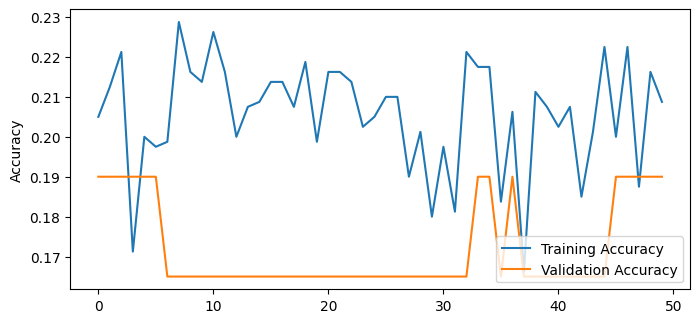

In [ ]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
model.save('../modelh5/model_mfcc.h5')

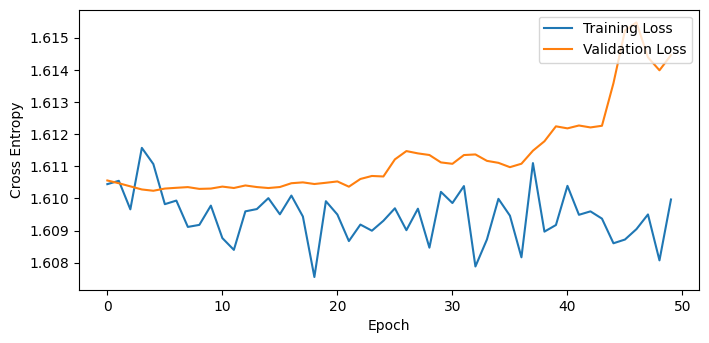

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 1s 49ms/step


array([[ 0,  0, 48,  0,  0],
       [ 0,  0, 33,  0,  0],
       [ 0,  0, 38,  0,  0],
       [ 0,  0, 44,  0,  0],
       [ 0,  0, 37,  0,  0]])

In [ ]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.00      0.00      0.00        33
           2       0.19      1.00      0.32        38
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        37

    accuracy                           0.19       200
   macro avg       0.04      0.20      0.06       200
weighted avg       0.04      0.19      0.06       200



/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Testing

In [ ]:
model_uri = '../modelh5/model_mfcc.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 101, 64)           16896     
                                                                 
 dense (Dense)               (None, 101, 32)           2080      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                5

In [ ]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


In [ ]:
predict('../data/training/MS/New_MS_003.wav')

1/1 [==============================] - 1s 573ms/step
[0.19148074 0.20976369 0.21084198 0.19379728 0.19411625]
2
Predicted class: MS
